# MAUDE DATASET PACEMAKERS EDA

In [2]:
# Importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## RECORD DATASET

In [3]:
df_record = pd.read_csv("Data\SN_MAUDE_pacemaker_20192023_RECORD.csv", delimiter=',')
df_record.head()

C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\519507202.py:1: DtypeWarning: Columns (11,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_record = pd.read_csv("Data\SN_MAUDE_pacemaker_20192023_RECORD.csv", delimiter=',')


MDR_REPORT_KEY  EVENT_KEY       REPORT_NUMBER REPORT_SOURCE_CODE  \
0        10000036        NaN  2649622-2020-08298                  M   
1        10000635        NaN  2124215-2020-09242                  M   
2        10000636        NaN  2124215-2020-09215                  M   
3        10000670        NaN  2124215-2020-09320                  M   
4        10000678        NaN  2124215-2020-09193                  M   

   NUMBER_DEVICES_IN_EVENT  NUMBER_PATIENTS_IN_EVENT DATE_RECEIVED  \
0                      NaN                       NaN    04/27/2020   
1                      NaN                       NaN    04/27/2020   
2                      NaN                       NaN    04/27/2020   
3                      NaN                       NaN    04/27/2020   
4                      NaN                       NaN    04/27/2020   

  ADVERSE_EVENT_FLAG PRODUCT_PROBLEM_FLAG DATE_REPORT  ...  \
0                  Y                    Y  05/11/2020  ...   
1                  N                    Y  04/27/2020  ...   
2                  Y                    Y  07/21/2020  ...   
3                  Y                    Y  04/27/2020  ...   
4                  N                    Y  01/25/2021  ...   

                  BRAND_NAME  \
0  SELECTSECURE MRI SURESCAN   
1                ACCOLADE DR   
2               INGEVITY MRI   
3            ACCOLADE MRI DR   
4         ESSENTIO MRI EL DR   

                                        GENERIC_NAME  \
0  DRUG ELUTING PERMANENT RIGHT VENTRICULAR (RV) ...   
1                                 IMPLANTABLE DEVICE   
2  DRUG ELUTING PERMANENT RIGHT VENTRICULAR OR AT...   
3   IMPLANTABLE PULSE GENERATOR, PACEMAKER (NON-CRT)   
4   IMPLANTABLE PULSE GENERATOR, PACEMAKER (NON-CRT)   

             MANUFACTURER_D_NAME MODEL_NUMBER CATALOG_NUMBER LOT_NUMBER  \
0                           MPRI       383069         383069        NaN   
1  BOSTON SCIENTIFIC CORPORATION         L301           L301     764128   
2  BOSTON SCIENTIFIC CORPORATION         7741           7741    1112025   
3  BOSTON SCIENTIFIC CORPORATION         L311           L311     213585   
4  BOSTON SCIENTIFIC CORPORATION         L131           L131     868731   

  OTHER_ID_NUMBER DEVICE_REPORT_PRODUCT_CODE          UDI-DI      UDI-PUBLIC  
0             NaN                        NVN             NaN             NaN  
1             NaN                        LWP             NaN             NaN  
2             NaN                        NVN  802526523458.0  00802526523458  
3             NaN                        LWP  802526559228.0  00802526559228  
4             NaN                        LWP  802526559006.0  00802526559006  

[5 rows x 46 columns]

In [4]:
df_record.columns

Index(['MDR_REPORT_KEY', 'EVENT_KEY', 'REPORT_NUMBER', 'REPORT_SOURCE_CODE',
       'NUMBER_DEVICES_IN_EVENT', 'NUMBER_PATIENTS_IN_EVENT', 'DATE_RECEIVED',
       'ADVERSE_EVENT_FLAG', 'PRODUCT_PROBLEM_FLAG', 'DATE_REPORT',
       'DATE_OF_EVENT', 'REPORTER_OCCUPATION_CODE', 'REPORT_DATE',
       'REPORT_TO_FDA', 'DATE_REPORT_TO_FDA', 'EVENT_LOCATION',
       'DATE_REPORT_TO_MANUFACTURER', 'MANUFACTURER_G1_NAME',
       'DATE_MANUFACTURER_RECEIVED', 'REMEDIAL_ACTION',
       'REMOVAL_CORRECTION_NUMBER', 'EVENT_TYPE', 'DISTRIBUTOR_NAME',
       'MANUFACTURER_NAME', 'TYPE_OF_REPORT', 'SOURCE_TYPE', 'DATE_ADDED',
       'DATE_CHANGED', 'REPORTER_COUNTRY_CODE', 'PMA_PMN_NUM',
       'EXEMPTION_NUMBER', 'year', 'DEVICE_EVENT_KEY', 'IMPLANT_FLAG',
       'DATE_REMOVED_FLAG', 'DEVICE_SEQUENCE_NO', 'BRAND_NAME', 'GENERIC_NAME',
       'MANUFACTURER_D_NAME', 'MODEL_NUMBER', 'CATALOG_NUMBER', 'LOT_NUMBER',
       'OTHER_ID_NUMBER', 'DEVICE_REPORT_PRODUCT_CODE', 'UDI-DI',
       'UDI-PUBLIC'],
  

In [5]:
# Data cleaning
print(df_record.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307096 entries, 0 to 307095
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MDR_REPORT_KEY               307096 non-null  int64  
 1   EVENT_KEY                    0 non-null       float64
 2   REPORT_NUMBER                307096 non-null  object 
 3   REPORT_SOURCE_CODE           307096 non-null  object 
 4   NUMBER_DEVICES_IN_EVENT      0 non-null       float64
 5   NUMBER_PATIENTS_IN_EVENT     0 non-null       float64
 6   DATE_RECEIVED                307096 non-null  object 
 7   ADVERSE_EVENT_FLAG           306785 non-null  object 
 8   PRODUCT_PROBLEM_FLAG         306878 non-null  object 
 9   DATE_REPORT                  306787 non-null  object 
 10  DATE_OF_EVENT                282491 non-null  object 
 11  REPORTER_OCCUPATION_CODE     265689 non-null  object 
 12  REPORT_DATE                  346 non-null     object 
 13 

In [6]:
empty_columns = df_record.columns[df_record.isna().all()]
print(empty_columns)

df_record.drop(empty_columns, axis=1, inplace=True) # Dropping the empty columns

Index(['EVENT_KEY', 'NUMBER_DEVICES_IN_EVENT', 'NUMBER_PATIENTS_IN_EVENT',
       'DISTRIBUTOR_NAME', 'MANUFACTURER_NAME', 'DEVICE_EVENT_KEY',
       'IMPLANT_FLAG', 'DATE_REMOVED_FLAG', 'OTHER_ID_NUMBER'],
      dtype='object')


In [7]:
df_record.duplicated().sum() # check for duplicates

0

## MAUDE TEXT

In [8]:
df_text = pd.read_csv("Data\SN_MAUDE_pacemaker_20192023_TEXT.csv", delimiter=',')
df_text.head()

MDR_REPORT_KEY  MDR_TEXT_KEY TEXT_TYPE_CODE  \
0         8207742     131761072              N   
1         8207742     131761073              D   
2         8207387     131761076              N   
3         8207387     131761077              D   
4         8207394     131761102              N   

                                            FOI_TEXT  
0  IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...  
1  IT WAS REPORTED THAT RISING AND HIGH IMPEDANCE...  
2  THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...  
3  IT WAS REPORTED THAT THE LEAD WAS IMPLANTED IN...  
4  THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...

In [9]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760544 entries, 0 to 760543
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   MDR_REPORT_KEY  760544 non-null  int64 
 1   MDR_TEXT_KEY    760544 non-null  int64 
 2   TEXT_TYPE_CODE  760544 non-null  object
 3   FOI_TEXT        760543 non-null  object
dtypes: int64(2), object(2)
memory usage: 23.2+ MB


In [10]:
print(df_text.duplicated().sum()) # check for duplicates
# print(df_text[df_text.duplicated()].head(2))

df_text.drop_duplicates(inplace=True) # Dropping the duplicates

155


## IMDRF CODING

In [11]:
imdrf_codes = pd.read_excel("Data/Annex-A-DPC-2023.xlsx")
print(imdrf_codes.shape)

df_imdrf = imdrf_codes.iloc[7:]
df_imdrf.columns = imdrf_codes.iloc[6]
df_imdrf.reset_index(drop=True, inplace=True)
df_imdrf.head()

(489, 11)


6                        Level 1 Term                    Level 2 Term  \
0  Patient Device Interaction Problem                             NaN   
1                                 NaN  Patient-Device Incompatibility   
2                                 NaN                             NaN   
3                                 NaN                             NaN   
4                                 NaN                             NaN   

6                            Level 3 Term FDA Code NCIt Code IMDRF Code  \
0                                     NaN     4001   C133496        A01   
1                                     NaN     2682    C62919      A0101   
2                        Biocompatibility     2886    C63294    A010101   
3     Device Appears to Trigger Rejection     1524    C62853    A010102   
4  Inadequacy of Device Shape and/or Size     1583    C62947    A010103   

6                                         Definition Non-IMDRF Code/Term  \
0  Problem related to the interaction between the...                 NaN   
1  Problem associated with the interaction betwee...                 NaN   
2  Problem associated with undesirable local or s...                 NaN   
3  The device appears to elicit undesired respons...                 NaN   
4  The physical size and/or shape of the device w...                 NaN   

6 Status Status Description      CodeHierarchy  
0    NaN                NaN                A01  
1    NaN                NaN          A01|A0101  
2    NaN                NaN  A01|A0101|A010101  
3    NaN                NaN  A01|A0101|A010102  
4    NaN                NaN  A01|A0101|A010103

In [12]:
df_imdrf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Level 1 Term         27 non-null     object
 1   Level 2 Term         176 non-null    object
 2   Level 3 Term         279 non-null    object
 3   FDA Code             482 non-null    object
 4   NCIt Code            482 non-null    object
 5   IMDRF Code           482 non-null    object
 6   Definition           482 non-null    object
 7   Non-IMDRF Code/Term  0 non-null      object
 8   Status               56 non-null     object
 9   Status Description   56 non-null     object
 10  CodeHierarchy        482 non-null    object
dtypes: object(11)
memory usage: 41.6+ KB


## PROBLEM CODES

In [13]:
df_problem = pd.read_csv("Data\SN_MAUDE_pacemaker_20192023_PROBLEM_CODE.csv", delimiter=',')
df_problem.head()

MDR_REPORT_KEY  PROBLEM_CODE
0         8207387          2923
1         8207389          1440
2         8207394          1559
3         8207394          3266
4         8207405          1036

In [14]:
df_problem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464465 entries, 0 to 464464
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   MDR_REPORT_KEY  464465 non-null  int64
 1   PROBLEM_CODE    464465 non-null  int64
dtypes: int64(2)
memory usage: 7.1 MB


In [15]:
print(df_problem.duplicated().sum()) # check for duplicates

df_problem.drop_duplicates(inplace=True) # Dropping the duplicates

95


In [16]:
df_problem['MDR_REPORT_KEY'].nunique() # check for unique values
# there are non unique keys, that means that there are multiple problems for a single report key

305883

In [17]:
df_problem['IMDRF'] = df_problem['PROBLEM_CODE'].map(df_imdrf.set_index('FDA Code')['IMDRF Code'])
df_problem.head()

MDR_REPORT_KEY  PROBLEM_CODE    IMDRF
0         8207387          2923  A051201
1         8207389          1440  A071205
2         8207394          1559  A070908
3         8207394          3266  A070102
4         8207405          1036  A090801

## PROBLEM CODE DESCRIPTION

In [18]:
pc = pd.read_csv("Data\DEVICE_PROBLEM_CODE.csv", delimiter=',')
pc.head()

PROBLEM_CODE               DESCRIPTION
0             1     Old To Be Deactivated
1          1001   Failure To Run On AC/DC
2          1002                  Abnormal
3          1003                Absorption
4          1005  Measurements, inaccurate

In [19]:
pc.info()
print("\n",pc.duplicated().sum()) # check for duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PROBLEM_CODE  872 non-null    int64 
 1   DESCRIPTION   872 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.8+ KB

 0


## Merging the datasets
The problem description dataset will be left apart for further interpretation.

In [20]:
df_1 = pd.merge(df_record, df_text, on='MDR_REPORT_KEY', how='outer')
df_2 = pd.merge(df_1, df_problem, on='MDR_REPORT_KEY', how='outer')
df_2.columns

Index(['MDR_REPORT_KEY', 'REPORT_NUMBER', 'REPORT_SOURCE_CODE',
       'DATE_RECEIVED', 'ADVERSE_EVENT_FLAG', 'PRODUCT_PROBLEM_FLAG',
       'DATE_REPORT', 'DATE_OF_EVENT', 'REPORTER_OCCUPATION_CODE',
       'REPORT_DATE', 'REPORT_TO_FDA', 'DATE_REPORT_TO_FDA', 'EVENT_LOCATION',
       'DATE_REPORT_TO_MANUFACTURER', 'MANUFACTURER_G1_NAME',
       'DATE_MANUFACTURER_RECEIVED', 'REMEDIAL_ACTION',
       'REMOVAL_CORRECTION_NUMBER', 'EVENT_TYPE', 'TYPE_OF_REPORT',
       'SOURCE_TYPE', 'DATE_ADDED', 'DATE_CHANGED', 'REPORTER_COUNTRY_CODE',
       'PMA_PMN_NUM', 'EXEMPTION_NUMBER', 'year', 'DEVICE_SEQUENCE_NO',
       'BRAND_NAME', 'GENERIC_NAME', 'MANUFACTURER_D_NAME', 'MODEL_NUMBER',
       'CATALOG_NUMBER', 'LOT_NUMBER', 'DEVICE_REPORT_PRODUCT_CODE', 'UDI-DI',
       'UDI-PUBLIC', 'MDR_TEXT_KEY', 'TEXT_TYPE_CODE', 'FOI_TEXT',
       'PROBLEM_CODE', 'IMDRF'],
      dtype='object')

In [21]:
df_2.shape

(1209611, 42)

## Filtering per DEVICE_REPORT_PRODUCT_CODE
To simplify the analysis, only the product codes that refer to pacemakers and the relative electrodes will be considered, while the others will be left apart. 

| **PRODUCT CODE** | **SPECIFICATION** |
| --- | --- |
| DTB | Permanent Pacemaker Electrode |
| NVN | Drug Eluting Permanent Right Ventricular (Rv) Or Right Atrial (Ra) Pacemaker Electrodes |
| LWP | Implantable Pulse Generator, Pacemaker (Non-Crt) |
| OJX | Drug Eluting Permanent Left Ventricular (Lv) Pacemaker Electrode |
| PNJ | Leadless Pacemaker |
| KRG | Programmer, Pacemaker |
| NKE | Pulse Generator, Pacemaker, Implantable, With Cardiac Resynchronization (Crt-P) |
| DXY | Implantable Pacemaker Pulse-Generator |
| DTE | Pulse-Generator, Pacemaker, External |
| DTC | Analyzer, Pacemaker Generator Function |
| OSR | Pacemaker/Icd/Crt Non-Implanted Components |
| LDF | Electrode, Pacemaker, Temporary |
| MFA | Device, Removal, Pacemaker Electrode, Percutaneous |
| DRO | Pacemaker, Cardiac, External Transcutaneous (Non-Invasive) |
| DTD | Pacemaker Lead Adaptor |
| KRE | Analyzer, Pacemaker Generator Function, Indirect |
| JOQ | Generator, Pulse, Pacemaker, External Programmable (For Electrophysiological Studies Only) |
| OVJ | Pulse Generator, External Pacemaker, Dual Chamber |
| DTG | Magnet, Test, Pacemaker |
| DSW | Bag, Polymeric Mesh, Pacemaker |
| NHW | Electrode, Pacing And Cardioversion, Temporary, Epicardial |
| KFJ | Materials, Repair Or Replacement, Pacemaker |
| DTA | Tester, Pacemaker Electrode Function |

In [22]:
df_2["DEVICE_REPORT_PRODUCT_CODE"].value_counts()

DEVICE_REPORT_PRODUCT_CODE
DTB    437903
NVN    348193
LWP    215618
OJX     57356
PNJ     43017
KRG     33514
NKE     22075
DTE     17723
DXY     15278
DTC      8301
OSR      6031
LDF      2845
MFA       768
DRO       409
DTD       408
JOQ        63
KRE        58
OVJ        26
DTG        11
DSW         7
NHW         4
KFJ         2
DTA         1
Name: count, dtype: int64

In [23]:
# Drop all the product codes that are not pacemakers nor electrodes
codes_to_drop = ["DTD", "KRG", "OSR", "KRE", "DTC", "DTG", "DSW", "KFJ", "DTA", "MFA"]

# Saving also the codes of electrodes and pacemakers separately for future use
codes_pacemakers = ["LWP", "PNJ", "NKE", "DXY", "DTE", "DRO", "JOQ", "OVJ"]
codes_electrodes = ["DTB", "NVN", "OJX", "LDF", "NHW"]

df = df_2[~df_2["DEVICE_REPORT_PRODUCT_CODE"].isin(codes_to_drop)]
df["DEVICE_REPORT_PRODUCT_CODE"].value_counts()

DEVICE_REPORT_PRODUCT_CODE
DTB    437903
NVN    348193
LWP    215618
OJX     57356
PNJ     43017
NKE     22075
DTE     17723
DXY     15278
LDF      2845
DRO       409
JOQ        63
OVJ        26
NHW         4
Name: count, dtype: int64

## EDA

### MDR_REPORT_KEY
*Definition*: Unique key for an MDR, assigned by MAUDE. Follow-up reports do not change this key.

In [24]:
print(df.MDR_REPORT_KEY.info())
print(f"Unique MDR report keys in the dataset: {df.MDR_REPORT_KEY.nunique()}")


<class 'pandas.core.series.Series'>
Index: 1160510 entries, 0 to 1209610
Series name: MDR_REPORT_KEY
Non-Null Count    Dtype
--------------    -----
1160510 non-null  int64
dtypes: int64(1)
memory usage: 17.7 MB
None
Unique MDR report keys in the dataset: 296617


In [25]:
df_report_freq = df.groupby('MDR_REPORT_KEY')['MDR_REPORT_KEY'].count().reset_index(name='Frequency')

print("Max number of reports per same key:", df_report_freq['Frequency'].max())
print("Median number of reports:", df_report_freq['Frequency'].median())
print("Min number of reports:", df_report_freq['Frequency'].min())

df["MDR_REPORT_KEY"].value_counts().head(5)

Max number of reports per same key: 180
Median number of reports: 2.0
Min number of reports: 1


MDR_REPORT_KEY
12306086    180
12306082    140
8287323     110
16291292    110
16804322    100
Name: count, dtype: int64

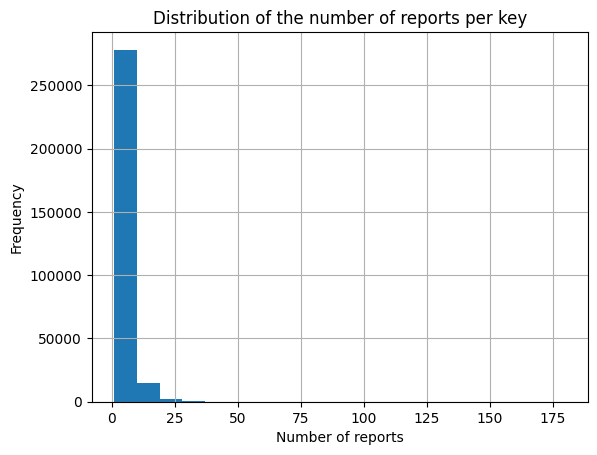

In [26]:
# What is the distribution of the number of reports per key?
df_report_freq['Frequency'].hist(bins=20)
plt.title("Distribution of the number of reports per key")
plt.xlabel("Number of reports")
plt.ylabel("Frequency")
plt.show()

In [27]:
df_report_freq['Frequency'].value_counts().sort_index()

Frequency
1       24472
2      125739
3       34726
4       48575
5        3405
6       23632
7         335
8       12713
9        4676
10       3003
11          8
12       7296
14        355
15       1585
16       1838
18        889
20       1115
21        235
22         10
24        704
25        203
26          1
27         28
28        181
30        275
32        104
33         10
35         81
36        116
39          2
40         70
42         67
44          6
45         20
48         39
49         13
50          7
51          1
54         12
55          2
56         25
60         14
63          5
64          3
65          1
66          1
70          5
72          4
78          1
80          1
88          1
90          1
96          1
100         1
110         2
140         1
180         1
Name: count, dtype: int64

How are the different reports per the same key differentiated?

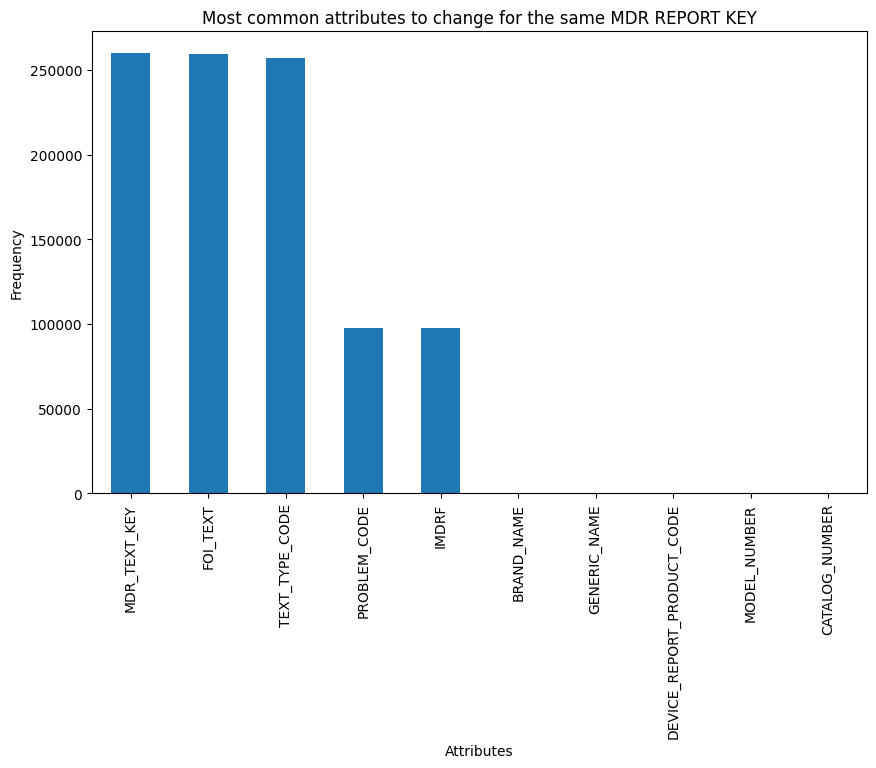

In [28]:
# Find columns with more than one unique value for each group
df_multi = df[df["MDR_REPORT_KEY"].duplicated(keep=False)]
var_col = df_multi.groupby("MDR_REPORT_KEY").nunique() > 1
var_col = var_col.melt(ignore_index=False).reset_index()
var_col = var_col[var_col["value"] == True]["variable"]

# Plot the most common attributes to change for the same MDR REPORT KEY
plt.figure(figsize=(10, 6))
var_col.value_counts().head(10).plot(kind='bar')
plt.title("Most common attributes to change for the same MDR REPORT KEY")
plt.xlabel("Attributes")
plt.ylabel("Frequency")
plt.show()

### REPORT_NUMBER
*Definition*: Report numbers for mandatory reporters (manufacturers, importers, and user facilities) generally consist of three components: a registration or identification number for the submitter, 
the 4-digit calendar year, and a consecutive number for each report filed during the year by the submitter (e.g., 1234567-2016-00001, 1234567-2016-00002). 
Note that user facility identification numbers are redacted. Voluntary reports are identified with an alphanumeric number that begins with "MW" and adds a sequential number. 
Follow-up reports do not change an MDR's report number.

In [29]:
print(df["REPORT_NUMBER"].describe())

count                1160510
unique                296617
top       2649622-2021-16205
freq                     180
Name: REPORT_NUMBER, dtype: object


In [30]:
consistency_check = df.groupby('MDR_REPORT_KEY')['REPORT_NUMBER'].nunique() # checking that each MDR_REPORT_KEY has a unique REPORT_NUMBER (consistency)
inconsistent_values = consistency_check[consistency_check > 1]

if inconsistent_values.empty:
    print("All values of REPORT NUMBER are consistent for each unique value in column MDR REPORT KEY.")
else:
    print("Inconsistencies found in the following groups:")
    print(inconsistent_values)

All values of REPORT NUMBER are consistent for each unique value in column MDR REPORT KEY.


There are 16658 voluntary reports.


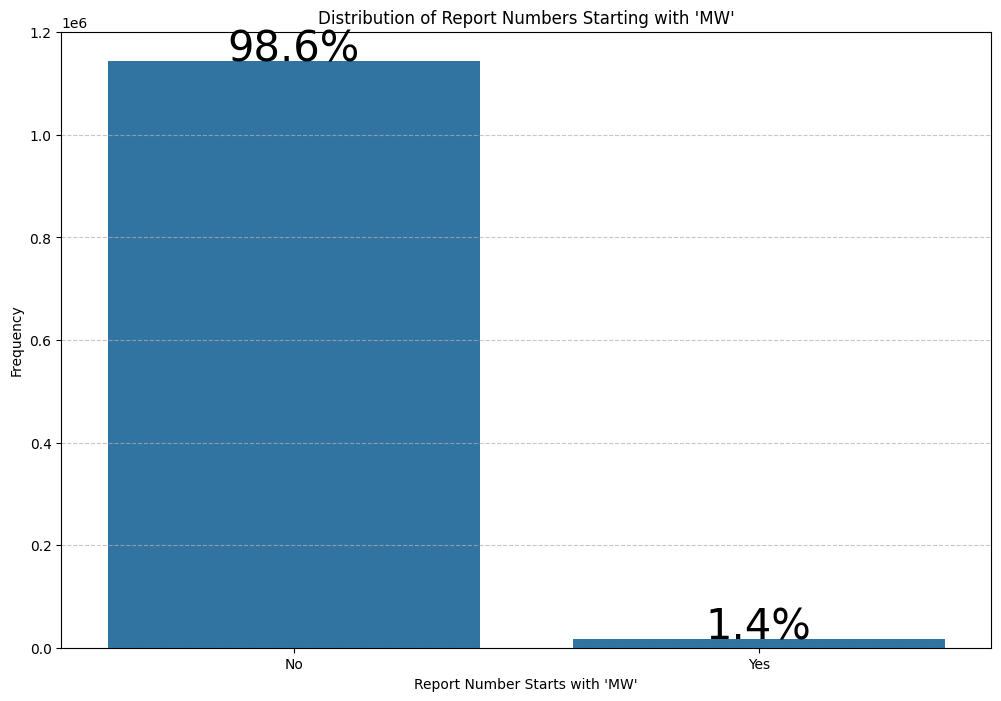

In [31]:
# Voluntary reports
print("There are {} voluntary reports.".format(df["REPORT_NUMBER"].str.startswith("MW").sum())) # Voluntary reports (that should start with "MW")

# Plotting distribution of report number starting with MW versus those not starting with that
plt.figure(figsize=(12, 8))
sns.countplot(x=df["REPORT_NUMBER"].str.startswith("MW"))
plt.title("Distribution of Report Numbers Starting with 'MW'")
plt.xlabel("Report Number Starts with 'MW'")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count number to the countplot
total = len(df["REPORT_NUMBER"].str.startswith("MW"))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 5, f'{height/total:.1%}', ha='center', fontsize=30)

plt.show()

#### REPORT_SOURCE_CODE
*Definition*: Denotes whether this report was submitted by a Manufacturer, Distributor (Importer), User Facility, or Voluntary reporter.

By looking online we can confirm that
| REPORT SOURCE CODE | MEANING |
|---|---|
| P | Voluntary report |
| U | User Facility report |
| D | Distributor report |
| M | Manufacturer report |

it also says that fields "Number devices in event" and "Number of Patients in event" will be empty with P even though here every field is empty

count     1160510
unique          3
top             M
freq      1143551
Name: REPORT_SOURCE_CODE, dtype: object 

REPORT_SOURCE_CODE
M    1143551
P      16658
U        301
Name: count, dtype: int64


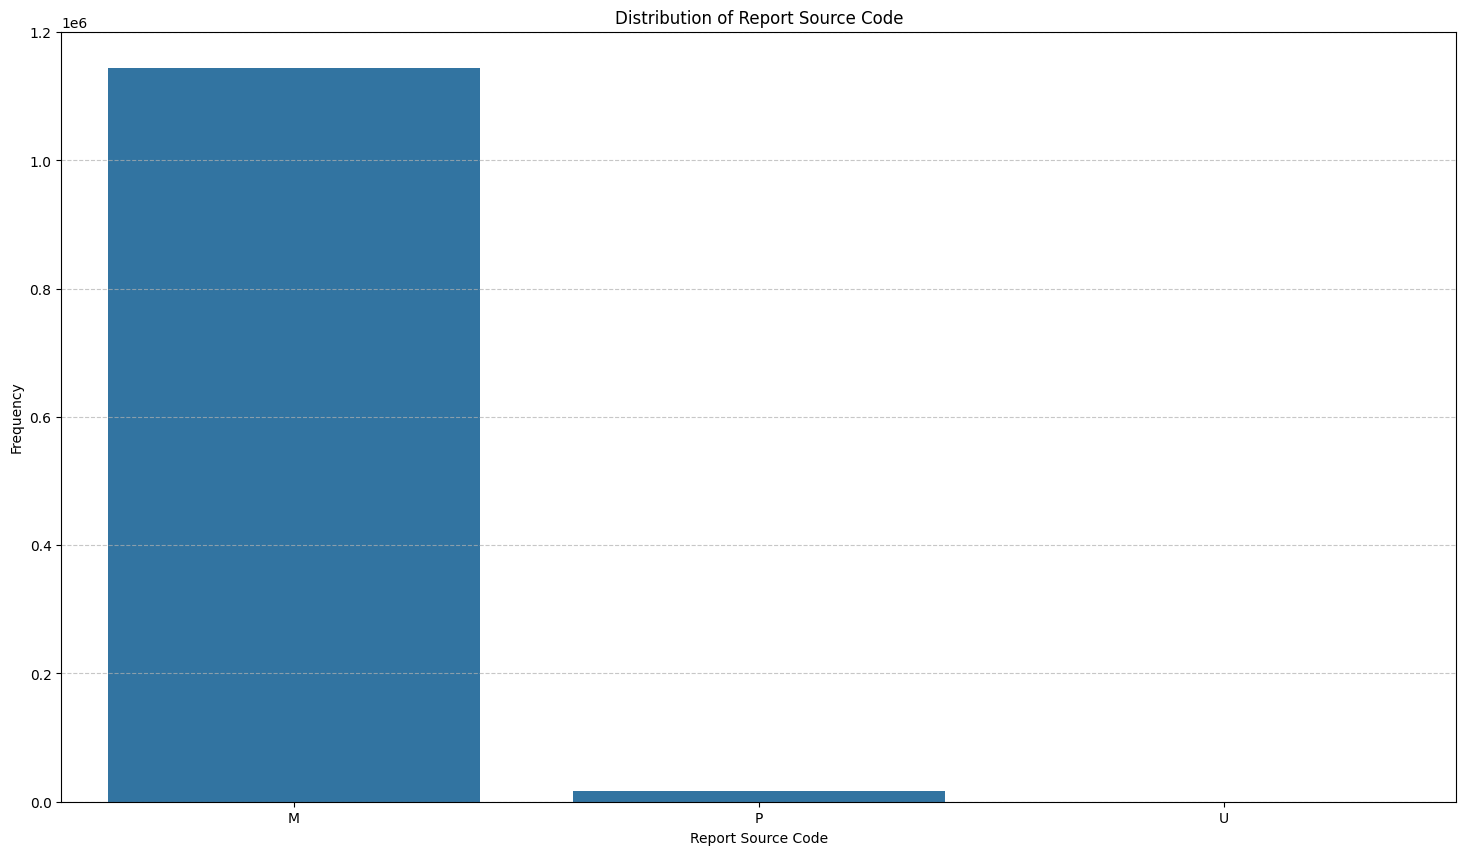

In [32]:
# REPORT_SOURCE_CODE
print(df["REPORT_SOURCE_CODE"].describe(),"\n") # no null, 3 unique values
print(df["REPORT_SOURCE_CODE"].value_counts())

# Plotting distribution of report source code
plt.figure(figsize=(18, 10))
sns.countplot(x=df["REPORT_SOURCE_CODE"])
plt.title("Distribution of Report Source Code")
plt.xlabel("Report Source Code")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [33]:
# Check consistency for voluntary reports
print(df[df["REPORT_NUMBER"].str.startswith("MW")]["REPORT_SOURCE_CODE"].value_counts()) # all voluntary reports are made by the P (voluntary)

REPORT_SOURCE_CODE
P    16658
Name: count, dtype: int64


### DATE_RECEIVED
The attribute used to sort out the MDR reports.


In [34]:
# DATE_RECEIVED: not clear what is the meaning of this column (it should refer to initial date fda received the report)
df["DATE_RECEIVED"] = pd.to_datetime(df["DATE_RECEIVED"], errors='coerce')
print(df["DATE_RECEIVED"].describe())

count                          1160510
mean     2021-08-15 23:22:01.978096128
min                2019-01-01 00:00:00
25%                2020-04-21 00:00:00
50%                2021-08-23 00:00:00
75%                2022-12-13 00:00:00
max                2023-12-31 00:00:00
Name: DATE_RECEIVED, dtype: object


C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\2500443518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DATE_RECEIVED"] = pd.to_datetime(df["DATE_RECEIVED"], errors='coerce')


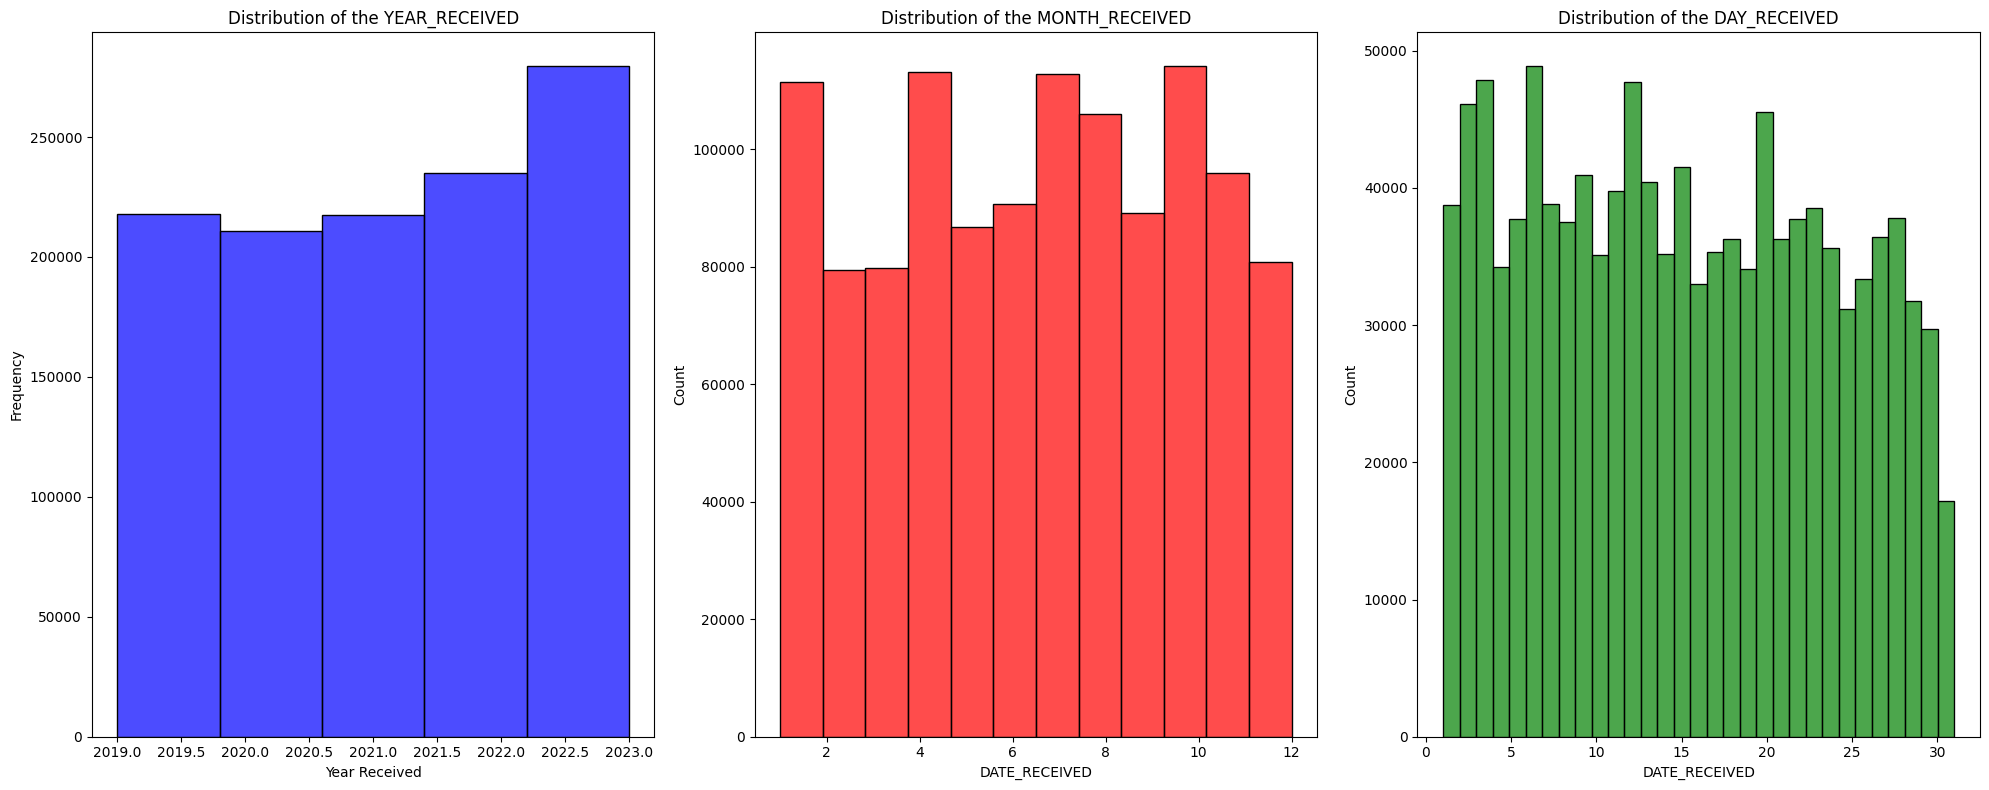

In [35]:
# Plotting the distribution of the DATE_RECEIVED
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
sns.histplot(df["DATE_RECEIVED"].dt.year, bins=5, color='blue', alpha=0.7)
plt.title("Distribution of the YEAR_RECEIVED")
plt.xlabel("Year Received")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
sns.histplot(df["DATE_RECEIVED"].dt.month, bins=12, color='red', alpha=0.7)
plt.title("Distribution of the MONTH_RECEIVED")

plt.subplot(1, 3, 3)
sns.histplot(df["DATE_RECEIVED"].dt.day, bins=31, color='green', alpha=0.7)
plt.title("Distribution of the DAY_RECEIVED")

plt.tight_layout()
plt.show()

In [36]:
print(f"Reports lacking the date received: {df['DATE_RECEIVED'].isna().sum()}")


Reports lacking the date received: 0


In [37]:
# Do the reports with the same report key have the same date received?
date_received_check = df.groupby('MDR_REPORT_KEY')['DATE_RECEIVED'].nunique()
inconsistent_values = date_received_check[date_received_check > 1]

if inconsistent_values.empty:
    print("All values of DATE RECEIVED are consistent for each unique value in column MDR REPORT KEY.")
else:
    print("Inconsistencies found in the following groups:")
    print(inconsistent_values)

All values of DATE RECEIVED are consistent for each unique value in column MDR REPORT KEY.


In [38]:
# Taking one of the most repeated mdr report keys 12306082
df[df["MDR_REPORT_KEY"] == 12306082][["MDR_REPORT_KEY", "DATE_RECEIVED"]]

MDR_REPORT_KEY DATE_RECEIVED
596566        12306082    2021-08-11
596567        12306082    2021-08-11
596568        12306082    2021-08-11
596569        12306082    2021-08-11
596570        12306082    2021-08-11
...                ...           ...
596701        12306082    2021-08-11
596702        12306082    2021-08-11
596703        12306082    2021-08-11
596704        12306082    2021-08-11
596705        12306082    2021-08-11

[140 rows x 2 columns]

### ADVERSE_EVENT_FLAG
*Definition*: Denotes whether the use of a medical device is suspected to have resulted in an adverse outcome in a patient.

count     1159552
unique          2
top             Y
freq       702592
Name: ADVERSE_EVENT_FLAG, dtype: object 

Reports with missing value: 958


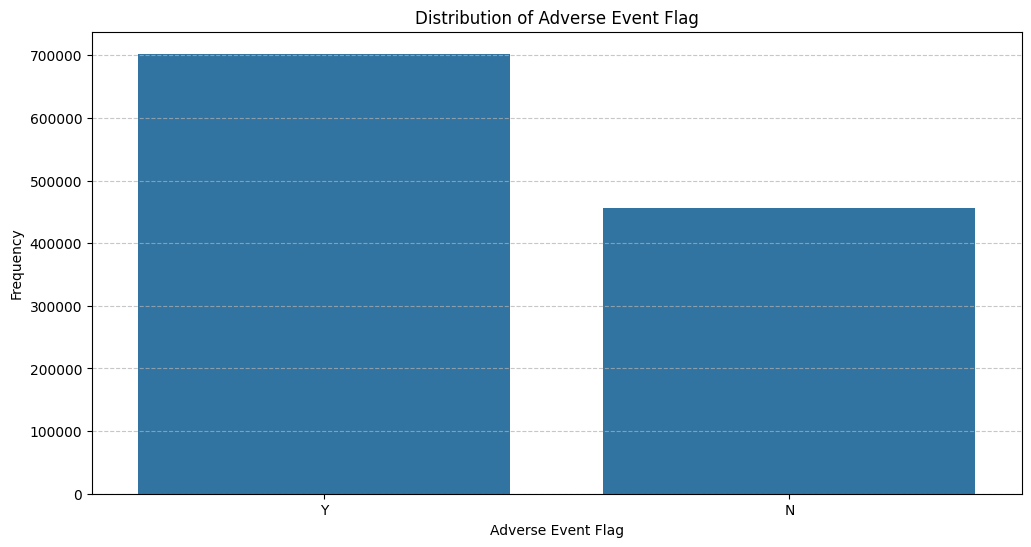

In [39]:
# ADVERSE_EVENT_FLAG
print(df["ADVERSE_EVENT_FLAG"].describe(),"\n")
print(f"Reports with missing value: {df['ADVERSE_EVENT_FLAG'].isna().sum()}")

# Plotting distribution of adverse event flag
plt.figure(figsize=(12, 6))
sns.countplot(x=df["ADVERSE_EVENT_FLAG"])
plt.title("Distribution of Adverse Event Flag")
plt.xlabel("Adverse Event Flag")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### PRODUCT_PROBLEM_FLAG
*Definition*: Denotes device malfunctions.

count     1159986
unique          2
top             Y
freq      1011846
Name: PRODUCT_PROBLEM_FLAG, dtype: object 

Reports with missing value: 524


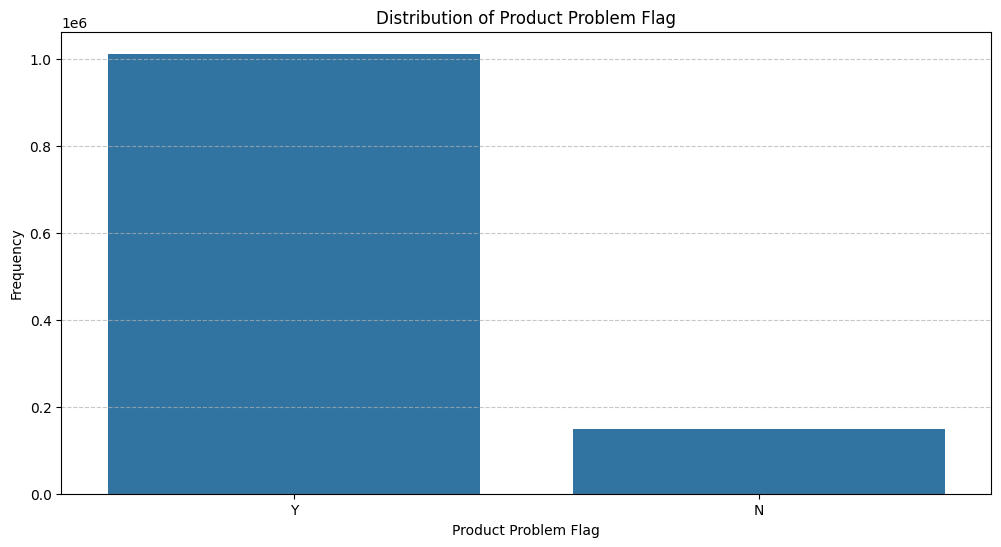

In [40]:
# PRODUCT_PROBLEM_FLAG
print(df["PRODUCT_PROBLEM_FLAG"].describe(),"\n")
print(f"Reports with missing value: {df['PRODUCT_PROBLEM_FLAG'].isna().sum()}")

# Plotting distribution of product problem flag
plt.figure(figsize=(12, 6))
sns.countplot(x=df["PRODUCT_PROBLEM_FLAG"])
plt.title("Distribution of Product Problem Flag")
plt.xlabel("Product Problem Flag")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### ADVERSE_EVENT_FLAG and PRODUCT_PROBLEM_FLAG

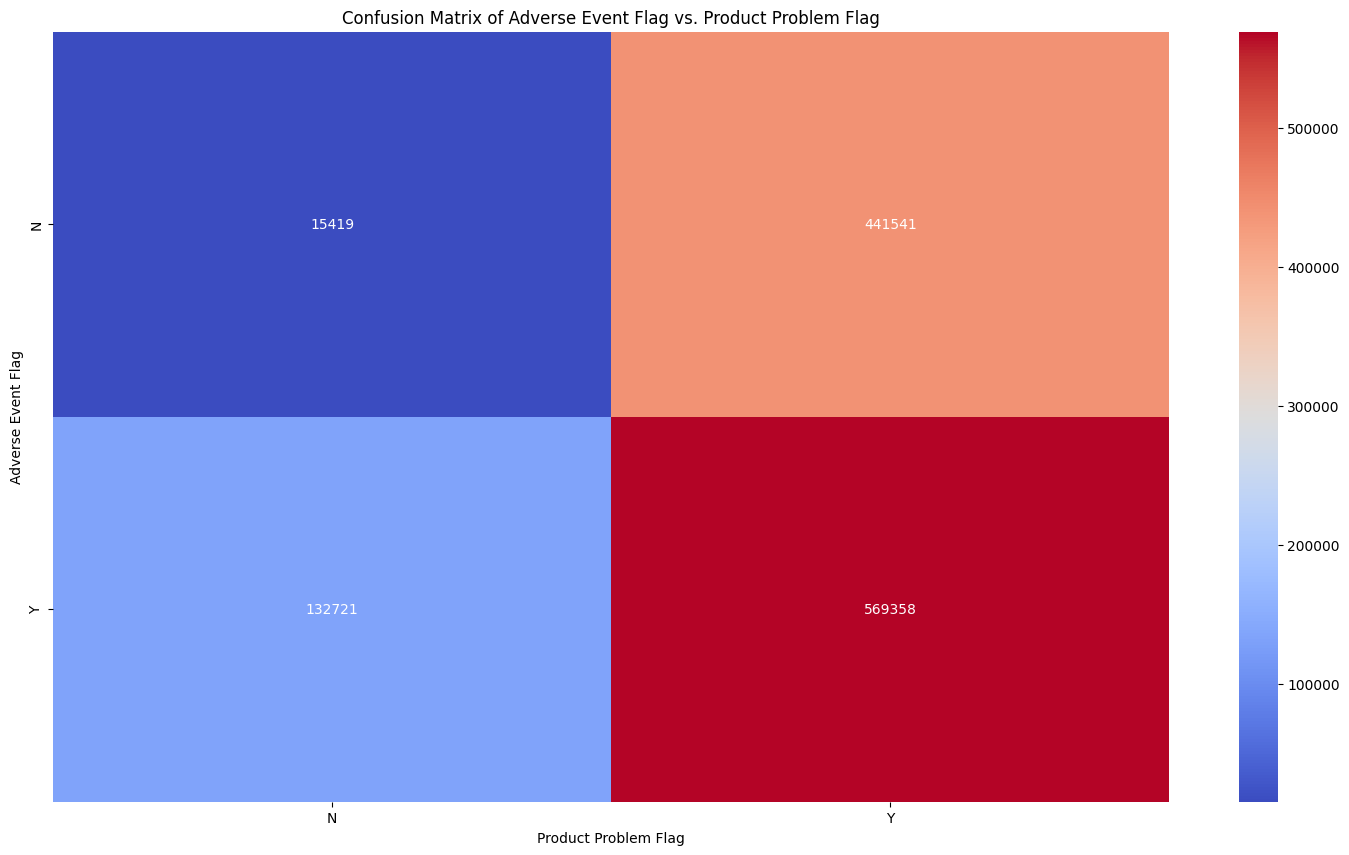

In [41]:
# Confusion matrix: are the adverse event and product problem related
contingency_table = pd.crosstab(df["ADVERSE_EVENT_FLAG"], df["PRODUCT_PROBLEM_FLAG"])
# Plotting confusion matrix
plt.figure(figsize=(18, 10))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix of Adverse Event Flag vs. Product Problem Flag")
plt.xlabel("Product Problem Flag")
plt.ylabel("Adverse Event Flag")
plt.show()

In [42]:
# Both values missing
print("Both values missing:", df[(df["ADVERSE_EVENT_FLAG"].isna()) & (df["PRODUCT_PROBLEM_FLAG"].isna())].shape[0])

Both values missing: 11


### DATE_REPORT and REPORT_DATE
*Definition* : (Report Date) The date the report is submitted to FDA. If a follow-up report has been submitted, this field will display the date the most recent follow-up report was submitted. 

Note that if an initial reporter (e.g., an importer or user facility) also sent a report to FDA, this field may include that date in addition to the date the MDR reporter submitted to FDA.

In [43]:
df_record["DATE_REPORT"].head(2)

0    05/11/2020
1    04/27/2020
Name: DATE_REPORT, dtype: object

In [44]:
df["DATE_REPORT"] = pd.to_datetime(df["DATE_REPORT"], format='%m/%d/%Y', errors='coerce')
print(df["DATE_REPORT"].describe())

count                          1160094
mean     2021-09-27 02:23:38.446436096
min                2010-06-21 00:00:00
25%                2020-06-22 00:00:00
50%                2021-10-28 00:00:00
75%                2023-02-15 00:00:00
max                2024-06-06 00:00:00
Name: DATE_REPORT, dtype: object


C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\3731077872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DATE_REPORT"] = pd.to_datetime(df["DATE_REPORT"], format='%m/%d/%Y', errors='coerce')


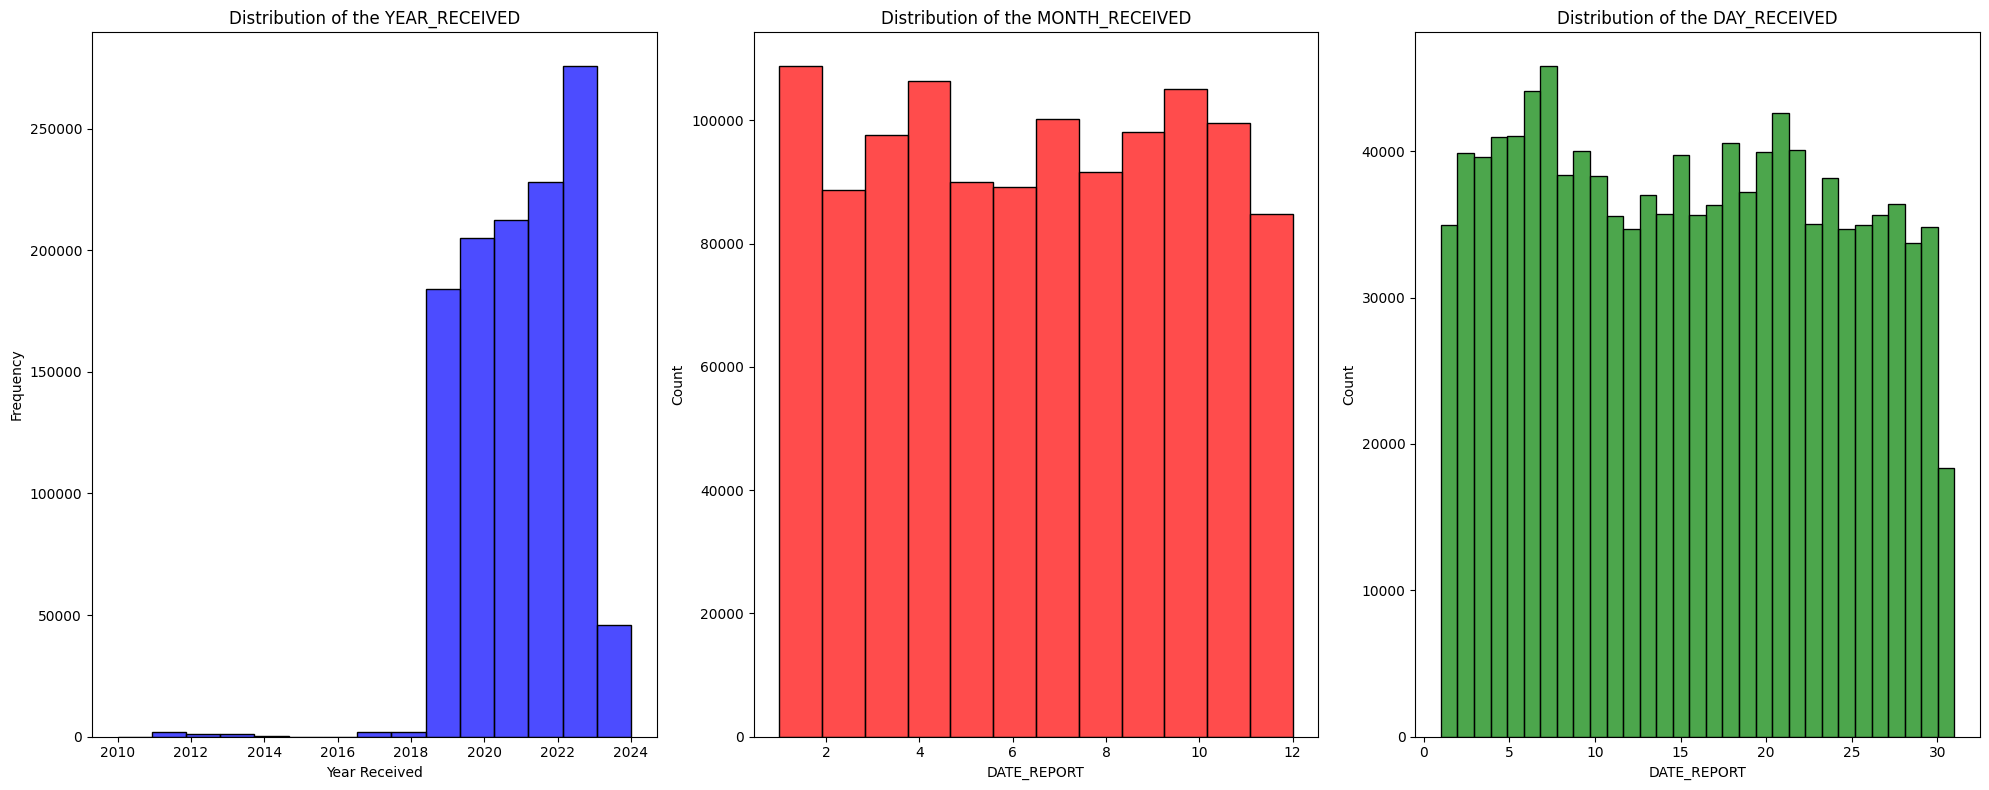

In [45]:
# Plotting the distribution of the DATE_RECEIVED
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
sns.histplot(df["DATE_REPORT"].dt.year, bins=15, color='blue', alpha=0.7)
plt.title("Distribution of the YEAR_RECEIVED")
plt.xlabel("Year Received")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
sns.histplot(df["DATE_REPORT"].dt.month, bins=12, color='red', alpha=0.7)
plt.title("Distribution of the MONTH_RECEIVED")

plt.subplot(1, 3, 3)
sns.histplot(df["DATE_REPORT"].dt.day, bins=31, color='green', alpha=0.7)
plt.title("Distribution of the DAY_RECEIVED")

plt.tight_layout()
plt.show()

In [46]:
df[df['REPORT_DATE'].notna()][['REPORT_DATE']].head(2)

REPORT_DATE
12861  01/22/2019
12862  01/22/2019

C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\3564301899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["REPORT_DATE"] = pd.to_datetime(df["REPORT_DATE"], format='%Y-%m/%d', errors='coerce')


count      0
mean     NaT
min      NaT
25%      NaT
50%      NaT
75%      NaT
max      NaT
Name: REPORT_DATE, dtype: object


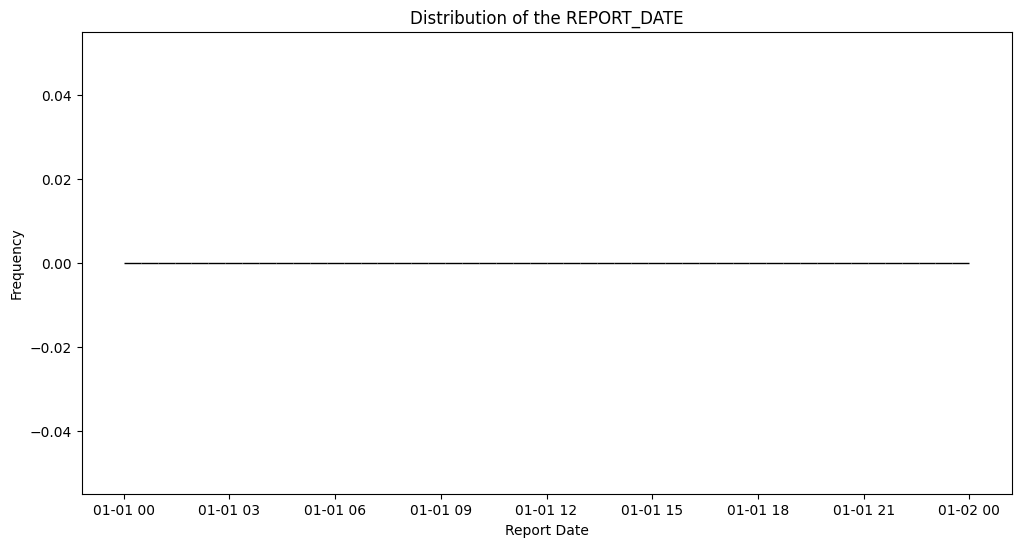

In [47]:
df["REPORT_DATE"] = pd.to_datetime(df["REPORT_DATE"], format='%Y-%m/%d', errors='coerce')
print(df["REPORT_DATE"].describe())

# plot the distribution of the REPORT_DATE
plt.figure(figsize=(12, 6))
sns.histplot(df["REPORT_DATE"], bins=50, color='blue', alpha=0.7)
plt.title("Distribution of the REPORT_DATE")
plt.xlabel("Report Date")
plt.ylabel("Frequency")
plt.show()

In [48]:
df["REPORT_DATE"].dt.year.value_counts() # there are two values coming from 2005

print(df[df["REPORT_DATE"].dt.year == 2005][["MDR_REPORT_KEY","REPORT_NUMBER","DATE_REPORT","REPORT_DATE","DATE_OF_EVENT","DATE_RECEIVED","DATE_REPORT_TO_MANUFACTURER","TEXT_TYPE_CODE","FOI_TEXT"]])

Empty DataFrame
Columns: [MDR_REPORT_KEY, REPORT_NUMBER, DATE_REPORT, REPORT_DATE, DATE_OF_EVENT, DATE_RECEIVED, DATE_REPORT_TO_MANUFACTURER, TEXT_TYPE_CODE, FOI_TEXT]
Index: []


Series([], Name: count, dtype: int64)


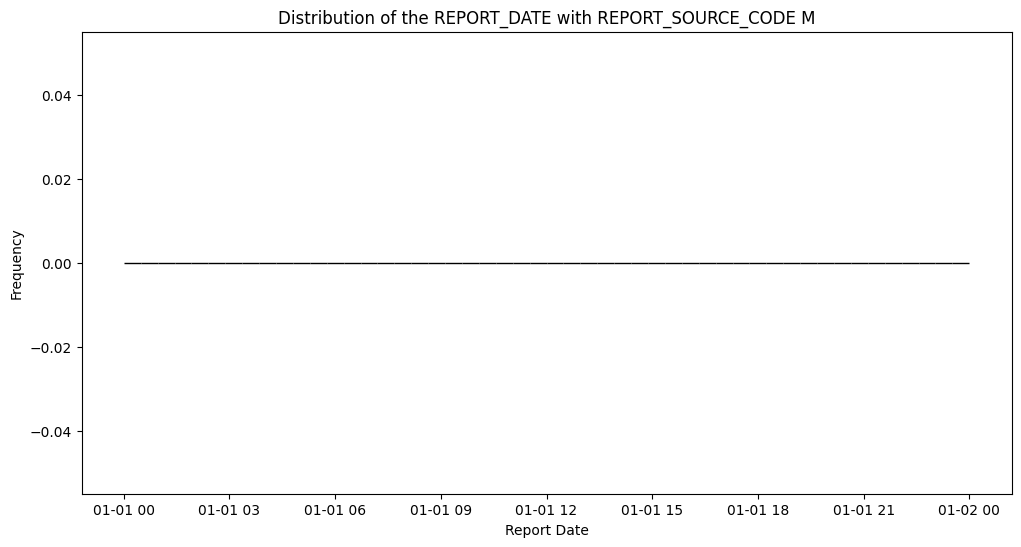

In [49]:
print(df[df["REPORT_DATE"].notna()][["REPORT_SOURCE_CODE"]].value_counts())

plt.figure(figsize=(12, 6))
sns.histplot(df[df["REPORT_SOURCE_CODE"]=="M"]["REPORT_DATE"], bins=50, color='blue', alpha=0.7)
plt.title("Distribution of the REPORT_DATE with REPORT_SOURCE_CODE M")
plt.xlabel("Report Date")
plt.ylabel("Frequency")
plt.show()

C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\3844228510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Difference"] = (df["DATE_RECEIVED"] - df["DATE_REPORT"]).dt.days


count    1.160094e+06
mean    -4.237826e+01
std      3.400162e+02
min     -1.956000e+03
25%     -6.700000e+01
50%     -1.600000e+01
75%      0.000000e+00
max      4.800000e+03
Name: Difference, dtype: float64


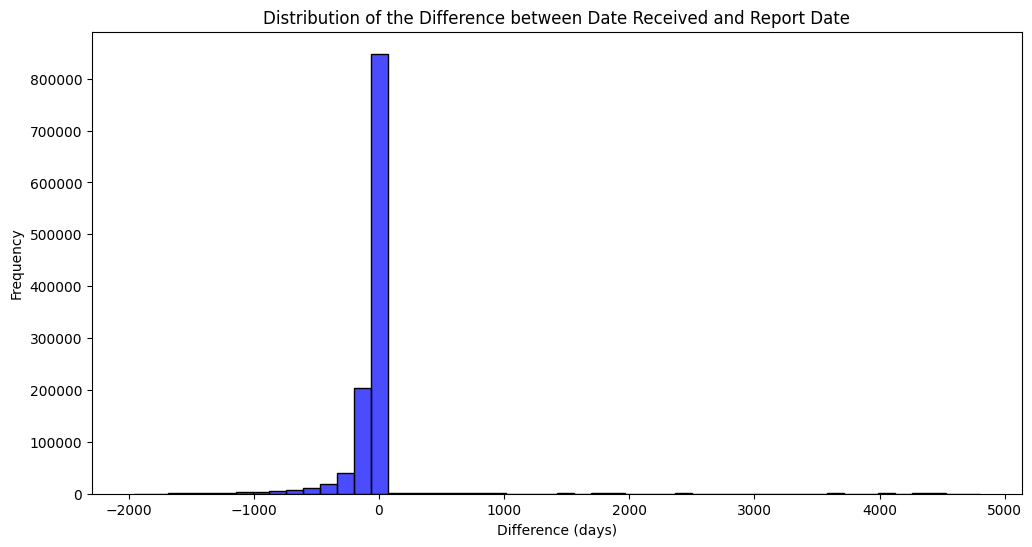

In [50]:
# Calculate the difference
df["Difference"] = (df["DATE_RECEIVED"] - df["DATE_REPORT"]).dt.days
print(df["Difference"].describe())

# plot the distribution of the difference
plt.figure(figsize=(12, 6))
sns.histplot(df["Difference"], bins=50, color='blue', alpha=0.7)
plt.title("Distribution of the Difference between Date Received and Report Date")
plt.xlabel("Difference (days)")
plt.ylabel("Frequency")
plt.show()

In [51]:
df[['DATE_REPORT','DATE_RECEIVED']].head()

DATE_REPORT DATE_RECEIVED
0  2019-01-01    2019-01-01
1  2019-01-01    2019-01-01
2  2019-01-01    2019-01-01
3  2019-01-01    2019-01-01
4  2019-01-18    2019-01-01

### DATE_OF_EVENT
*Definition*: Date of the actual or best estimate of the first onset of the adverse event.

In [52]:
df['DATE_OF_EVENT'].head(2)

0    12/19/2018
1    12/19/2018
Name: DATE_OF_EVENT, dtype: object

In [53]:
df["DATE_OF_EVENT"] = pd.to_datetime(df["DATE_OF_EVENT"], format='%m/%d/%Y', errors='coerce')
print(df["DATE_OF_EVENT"].describe())

count                          1102377
mean     2021-04-28 05:53:13.992254976
min                1900-02-10 00:00:00
25%                2020-01-17 00:00:00
50%                2021-05-25 00:00:00
75%                2022-09-29 00:00:00
max                2024-02-09 00:00:00
Name: DATE_OF_EVENT, dtype: object


C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\2889778853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DATE_OF_EVENT"] = pd.to_datetime(df["DATE_OF_EVENT"], format='%m/%d/%Y', errors='coerce')


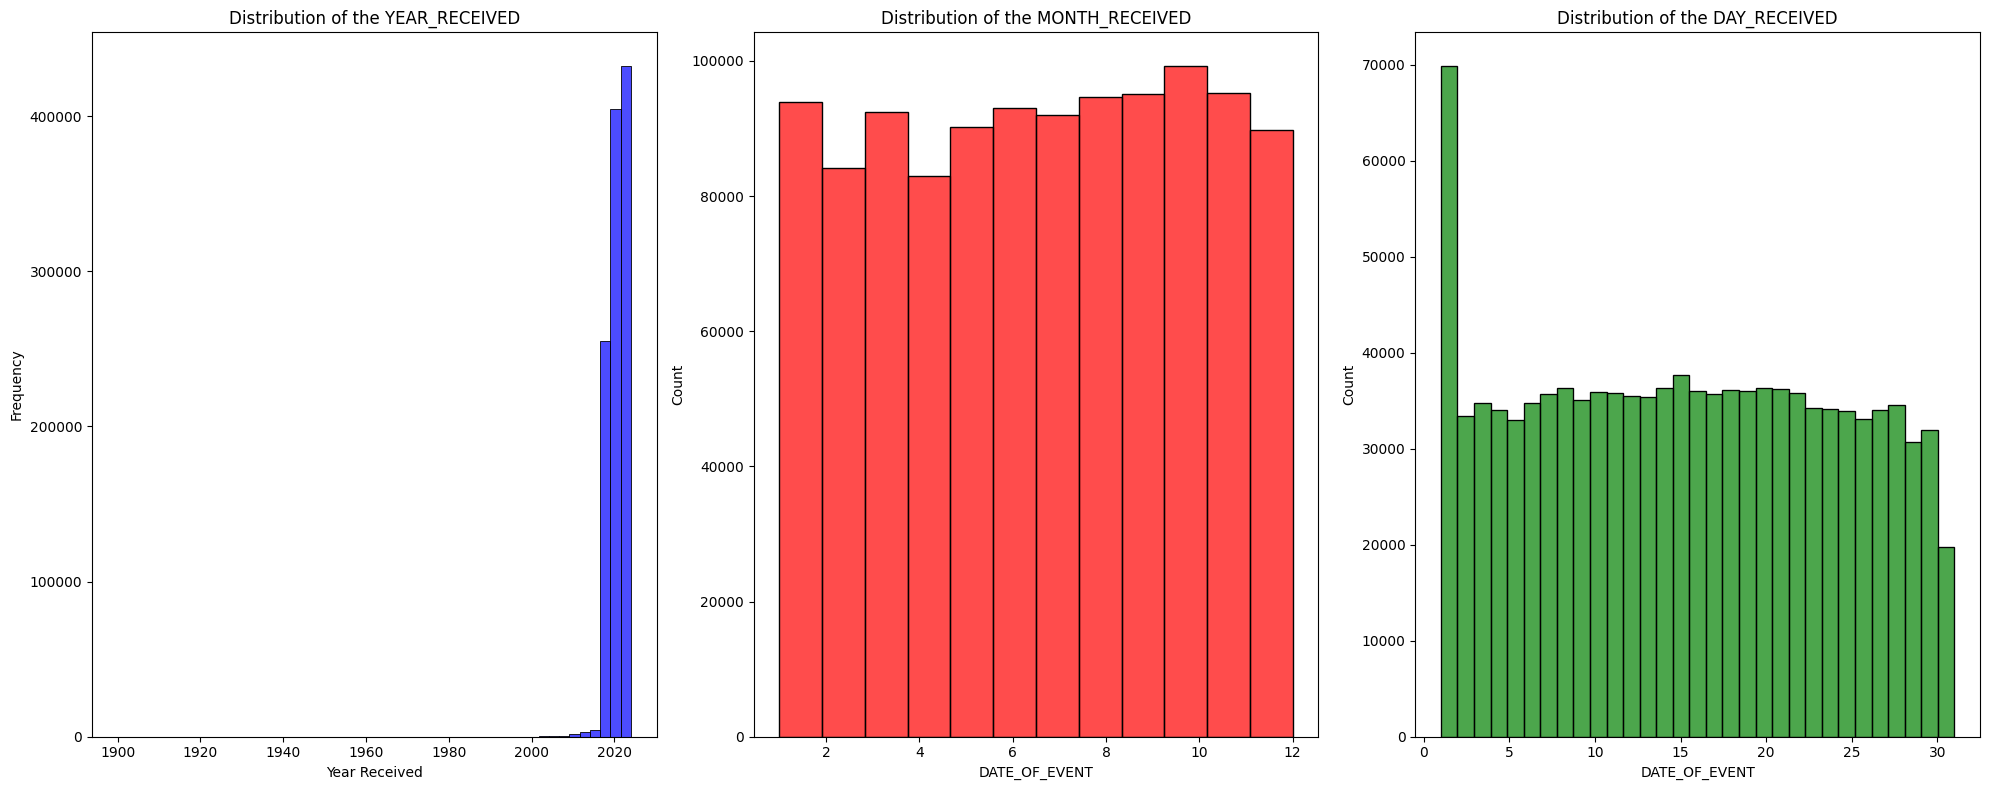

In [54]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
sns.histplot(df["DATE_OF_EVENT"].dt.year, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of the YEAR_RECEIVED")
plt.xlabel("Year Received")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
sns.histplot(df["DATE_OF_EVENT"].dt.month, bins=12, color='red', alpha=0.7)
plt.title("Distribution of the MONTH_RECEIVED")

plt.subplot(1, 3, 3)
sns.histplot(df["DATE_OF_EVENT"].dt.day, bins=31, color='green', alpha=0.7)
plt.title("Distribution of the DAY_RECEIVED")

plt.tight_layout()
plt.show()

In [55]:
print(df["DATE_OF_EVENT"].dt.year.value_counts())

DATE_OF_EVENT
2022.0    216378
2023.0    215938
2019.0    214349
2021.0    204245
2020.0    199993
2018.0     36783
2017.0      4189
2016.0      2677
2015.0      1605
2011.0      1300
2014.0      1032
2013.0      1003
2012.0       943
2010.0       412
2009.0       313
2007.0       199
2008.0       193
2006.0       128
2005.0        91
2004.0        83
1995.0        70
1999.0        69
2003.0        60
2001.0        45
2002.0        43
1998.0        30
1997.0        29
2000.0        29
1984.0        24
1990.0        20
1992.0        18
2024.0        16
1996.0        16
1988.0        14
1987.0        12
1983.0        12
1972.0         4
1991.0         3
1982.0         2
1993.0         2
1989.0         2
1994.0         2
1900.0         1
Name: count, dtype: int64


In [56]:
print(df[df["DATE_OF_EVENT"].dt.year == 1900][["MDR_REPORT_KEY","REPORT_NUMBER","DATE_REPORT","REPORT_DATE","DATE_OF_EVENT","DATE_RECEIVED"]])
print("\n",df[df["DATE_OF_EVENT"].dt.year == 1972][["MDR_REPORT_KEY","REPORT_NUMBER","DATE_REPORT","REPORT_DATE","DATE_OF_EVENT","DATE_RECEIVED"]])

         MDR_REPORT_KEY REPORT_NUMBER DATE_REPORT REPORT_DATE DATE_OF_EVENT  \
1097971        17533561     MW5140465  2021-03-01         NaT    1900-02-10   

        DATE_RECEIVED  
1097971    2023-08-12  

         MDR_REPORT_KEY       REPORT_NUMBER DATE_REPORT REPORT_DATE  \
377173        10563484  2182208-2020-01985  2020-09-21         NaT   
377174        10563484  2182208-2020-01985  2020-09-21         NaT   
377175        10563484  2182208-2020-01985  2020-09-21         NaT   
377176        10563484  2182208-2020-01985  2020-09-21         NaT   

       DATE_OF_EVENT DATE_RECEIVED  
377173    1972-08-30    2020-09-21  
377174    1972-08-30    2020-09-21  
377175    1972-08-30    2020-09-21  
377176    1972-08-30    2020-09-21  


In [57]:
df.loc[df["DATE_OF_EVENT"].dt.year == 1900, "DATE_OF_EVENT"] = pd.NaT # replace 1900 with NaT

### REPORTER_OCCUPATION_CODE
*Definition*: Denotes the initial reporter occupation.

From the website (https://www.fda.gov/medical-devices/medical-device-reporting-mdr-how-report-medical-device-problems/mdr-data-files)

| **REPORTER_OCCUPATION_CODE** | **Meaning** |
| --- | --- |
| 000 | other |
| 001 | Physician |
| 002 | Nurse |
| 003 | non healthcare professional |
| 100 | other healthcare professional |
| 109 | pharmacist |
| 112 | physician assistant |
| 116 | dentist |
| 117 | nurse practictioner |
| 305 | patient |
| 306 | patient family member or friend |
| 401 | biomedical engineer |
| 500 | risk manager |
| 501 | administrator/supervisor |
| 505 | - |
| 999 | unknown |
| NI | no information |


We may assume that lot of these values are badly inserted bringing to different values such as for 1.0 or 001 that we see in the graph as distinct or 100 and 100.0

In [58]:
print(f"There are {df['REPORTER_OCCUPATION_CODE'].isna().sum()} missing values in the column.")

There are 231687 missing values in the column.


In [59]:
# REPORTER_OCCUPATION_CODE
print(df["REPORTER_OCCUPATION_CODE"].describe(),"\n")
print(df["REPORTER_OCCUPATION_CODE"].value_counts())

count     928823.0
unique        32.0
top            1.0
freq      531179.0
Name: REPORTER_OCCUPATION_CODE, dtype: float64 

REPORTER_OCCUPATION_CODE
1.0      531179
100.0    179206
2.0       64313
3.0       60754
0.0       35050
001       29507
100        9553
401.0      4593
002        3472
003        2988
000        1973
117.0      1953
112.0      1887
999.0       720
109.0       674
500.0       317
401         189
305.0       113
501.0        96
112          91
117          64
999          43
109          35
306.0        15
505.0         9
116.0         8
500           7
305           5
NI            3
501           2
116           2
505           2
Name: count, dtype: int64


In [60]:
# Converting the REPORTER_OCCUPATION_CODE to a coherent format 
def pad_integers(value):
    if isinstance(value, int):
        return str(value).zfill(3)
    return value  # Leave string values unchanged

# Find all values with codes expressed as floats and convert them to integers
for i in df["REPORTER_OCCUPATION_CODE"].unique():
    if isinstance(i, float):
        # print(i)
        if not np.isnan(i):
            df["REPORTER_OCCUPATION_CODE"] = df["REPORTER_OCCUPATION_CODE"].replace(i, int(i))

# Transforming single digit codes to 3 cifered codes
df['REPORTER_OCCUPATION_CODE'] = df['REPORTER_OCCUPATION_CODE'].apply(pad_integers)

C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\761521996.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["REPORTER_OCCUPATION_CODE"] = df["REPORTER_OCCUPATION_CODE"].replace(i, int(i))
C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\761521996.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['REPORTER_OCCUPATION_CODE'] = df['REPORTER_OCCUPATION_CODE'].apply(pad_integers)


count     928823
unique        17
top          001
freq      560686
Name: REPORTER_OCCUPATION_CODE, dtype: object 



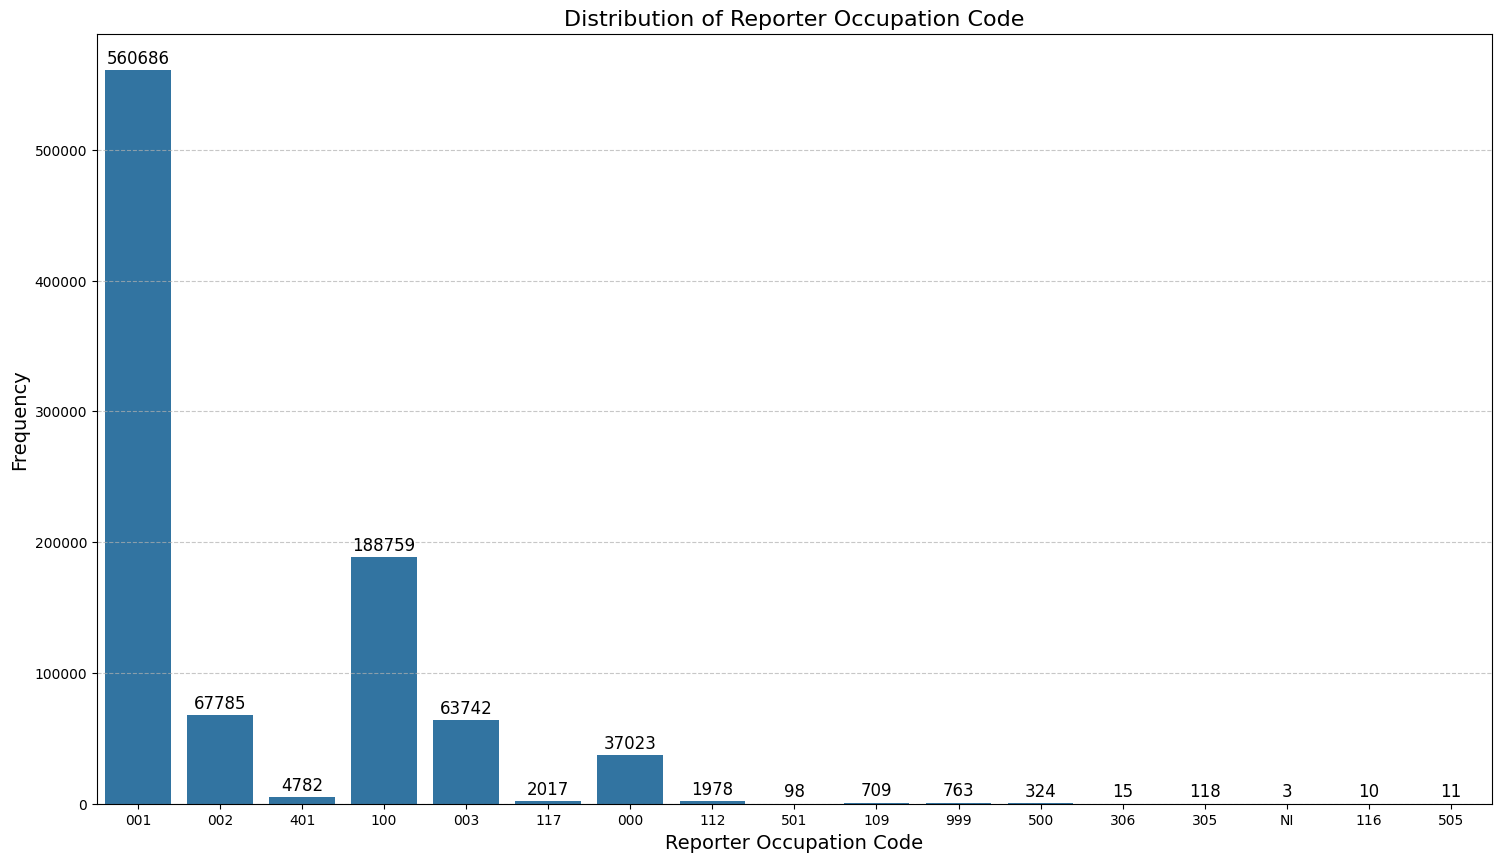

In [61]:
# Plotting distribution of reporter occupation code
print(df["REPORTER_OCCUPATION_CODE"].describe(),"\n")

plt.figure(figsize=(18, 10))
ax = sns.countplot(x=df["REPORTER_OCCUPATION_CODE"])
plt.title("Distribution of Reporter Occupation Code", fontsize=16)
plt.xlabel("Reporter Occupation Code", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

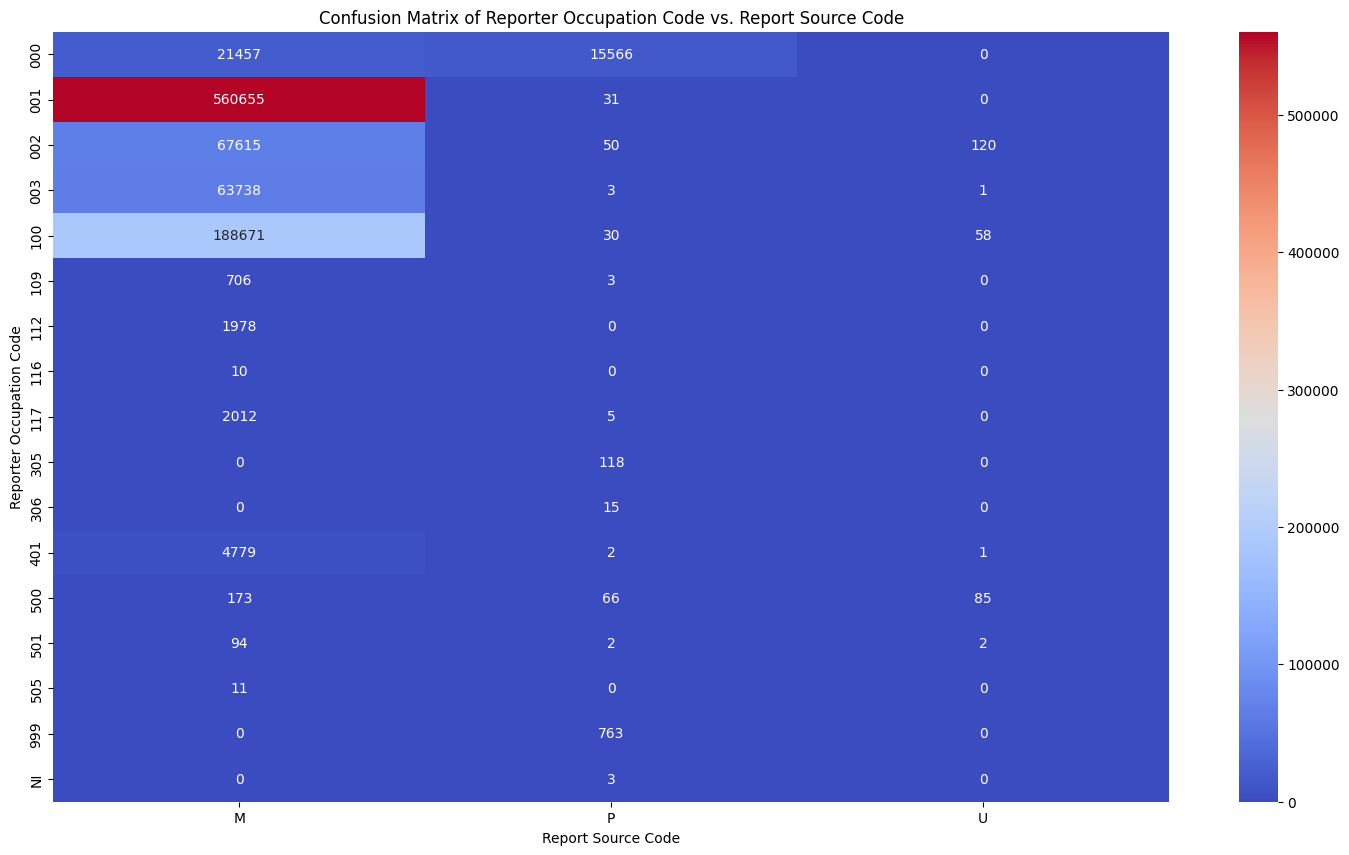

In [62]:
# contingency table of reporter occupation code and report source code
contingency_table = pd.crosstab(df["REPORTER_OCCUPATION_CODE"], df["REPORT_SOURCE_CODE"])
# Plotting confusion matrix
plt.figure(figsize=(18, 10))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix of Reporter Occupation Code vs. Report Source Code")
plt.xlabel("Report Source Code")
plt.ylabel("Reporter Occupation Code")
plt.show()

### REPORT_TO_FDA
*Definition*: Denotes whether a user facility or importer sent a separate report of the same event to FDA.
User facilities are required to send reports of device-related deaths to FDA, and importers are required to send reports of device-associated deaths and serious injuries to FDA.

Resources online explain that 
| Initial Report to FDA | Value |
| --- | --- |
| Y | Yes |
| N | No |
| U | Unknown |
| * | No answer provided |

in our case I may be the substitute to U

In [63]:
print(f"There are {df['REPORT_TO_FDA'].isna().sum()} missing values in the column.")

There are 492078 missing values in the column.


count     668432
unique         4
top            *
freq      444234
Name: REPORT_TO_FDA, dtype: object


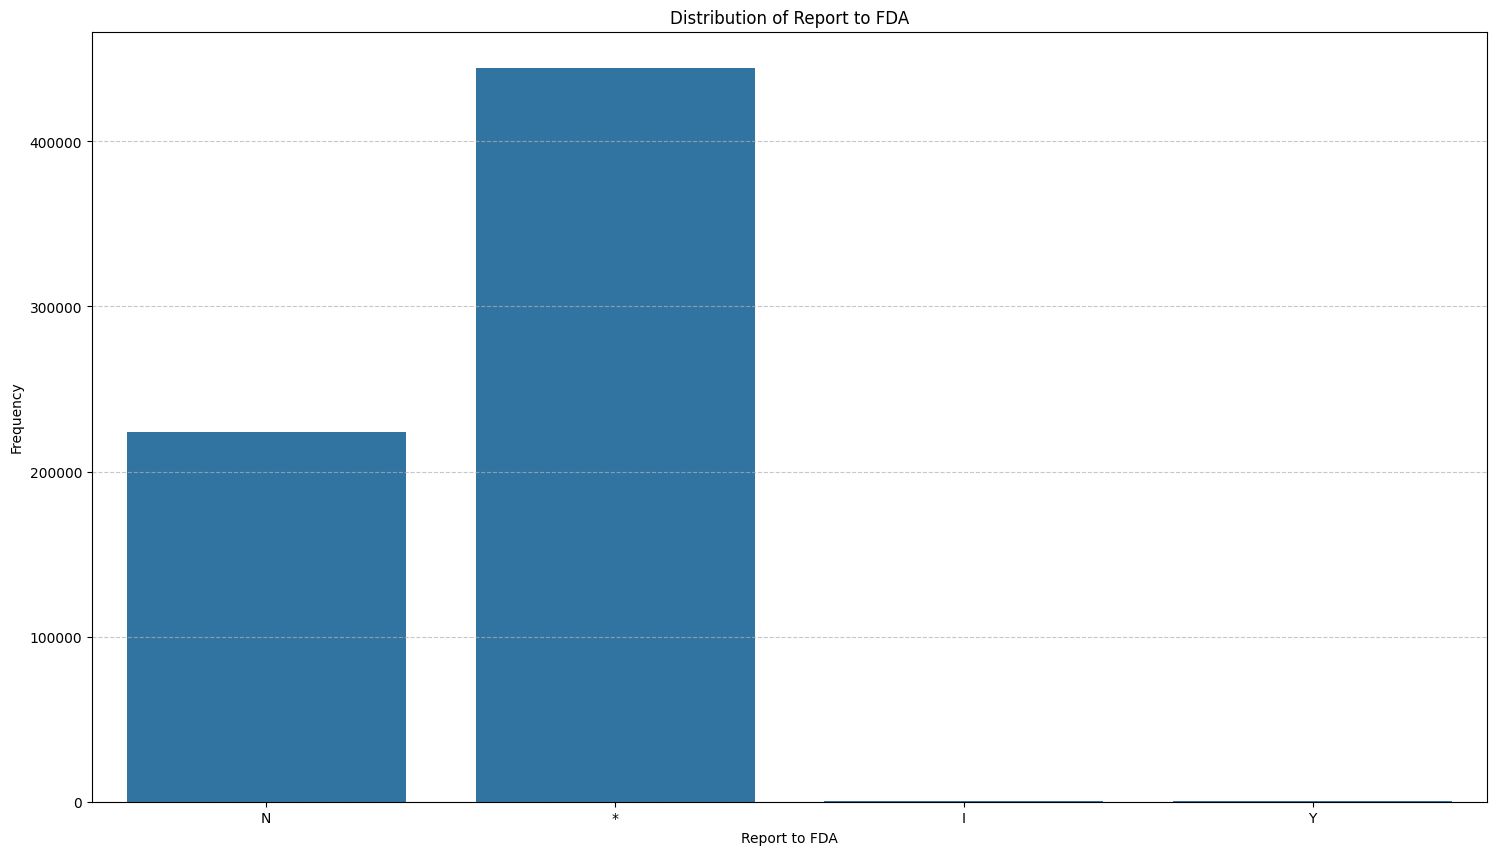

In [64]:
# REPORT_TO_FDA
print(df["REPORT_TO_FDA"].describe())

# Plotting distribution of report to FDA
plt.figure(figsize=(18, 10))
sns.countplot(x=df["REPORT_TO_FDA"])
plt.title("Distribution of Report to FDA")
plt.xlabel("Report to FDA")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

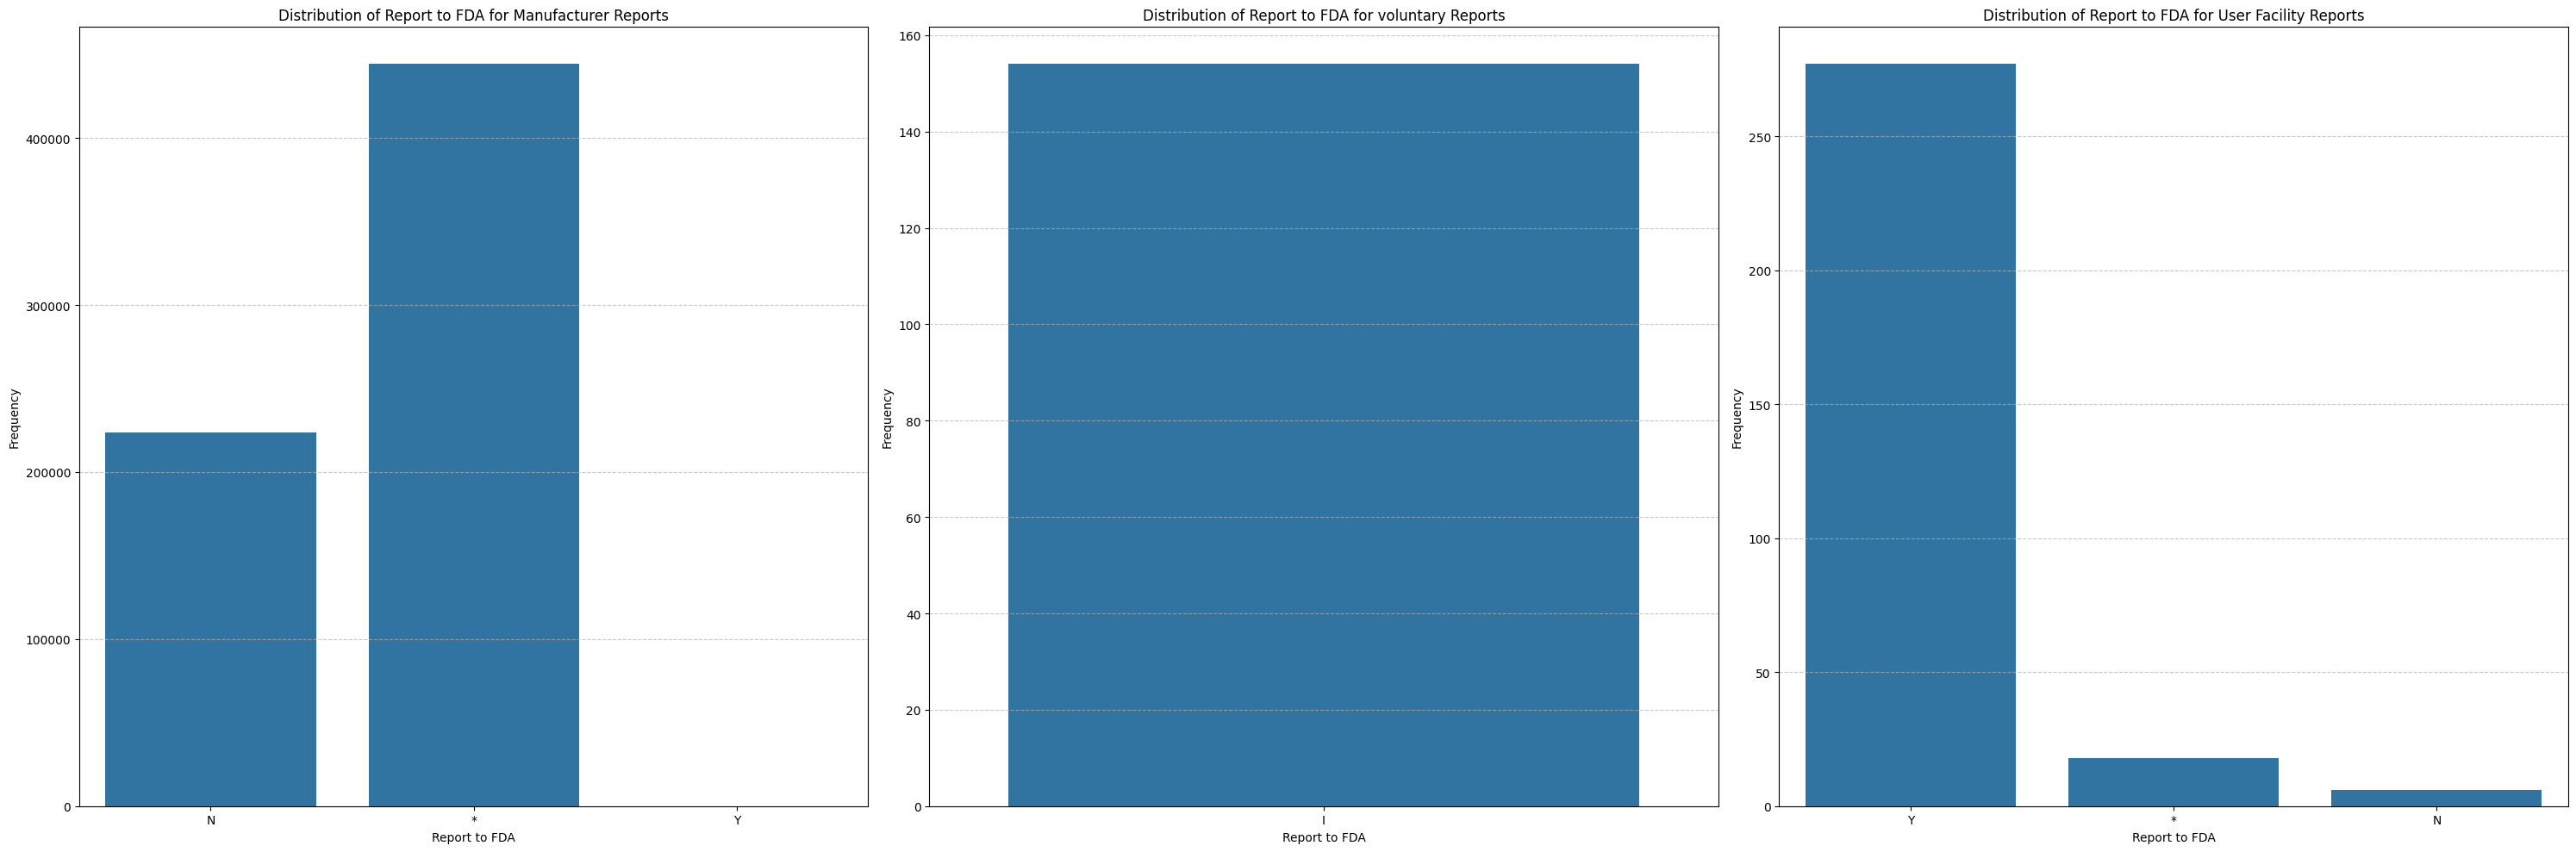

In [65]:
# plotting for the REPORT_TO_FDA and REPORT_SOURCE_CODE
plt.figure(figsize=(30, 10))  # Adjust the figure size

# Subplot 1: Manufacturer Reports
plt.subplot(1, 3, 1)
sns.countplot(x=df[df["REPORT_SOURCE_CODE"] == "M"]["REPORT_TO_FDA"])
plt.title("Distribution of Report to FDA for Manufacturer Reports") # no answer provided or not reported for the great part of the reports
plt.xlabel("Report to FDA")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Voluntary Reports
plt.subplot(1, 3, 2)
sns.countplot(x=df[df["REPORT_SOURCE_CODE"] == "P"]["REPORT_TO_FDA"])
plt.title("Distribution of Report to FDA for voluntary Reports") # unknown for all of them 
plt.xlabel("Report to FDA")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 3: User Facility Reports
plt.subplot(1, 3, 3)
sns.countplot(x=df[df["REPORT_SOURCE_CODE"] == "U"]["REPORT_TO_FDA"])
plt.title("Distribution of Report to FDA for User Facility Reports") # the majority of user facility reports are reported to fda
plt.xlabel("Report to FDA")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust the layout to prevent overlapping

plt.show()
# the code "I" seems the code for the fda report coming from voluntary reports

### DATE_REPORT_TO_FDA

In [66]:
df[df['DATE_REPORT_TO_FDA'].notna()][['DATE_REPORT_TO_FDA']].head(2)

DATE_REPORT_TO_FDA
12861         01/22/2019
12862         01/22/2019

In [67]:
df.loc[:, "DATE_REPORT_TO_FDA"] = pd.to_datetime(df["DATE_REPORT_TO_FDA"], format='%m/%d/%Y', errors='coerce')
print(df["DATE_REPORT_TO_FDA"].describe())

count                     315
unique                    146
top       2020-04-17 00:00:00
freq                       20
Name: DATE_REPORT_TO_FDA, dtype: object


C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\1776302965.py:2: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(df["DATE_REPORT_TO_FDA"].describe())


In [68]:
df.loc[df["DATE_REPORT_TO_FDA"] == df["DATE_REPORT"], "DATE_REPORT_TO_FDA"] = pd.NaT
df.loc[df["DATE_REPORT_TO_FDA"] == df["REPORT_DATE"], "DATE_REPORT_TO_FDA"] = pd.NaT

df.loc[df["DATE_REPORT"] == df["REPORT_DATE"], "REPORT_DATE"] = df.loc[df["DATE_REPORT"] == df["REPORT_DATE"], "DATE_REPORT_TO_FDA"]
df.loc[df["DATE_REPORT"] == df["REPORT_DATE"], "DATE_REPORT_TO_FDA"] = pd.NaT

In [69]:
print(df["DATE_REPORT_TO_FDA"].describe())

df_record.drop(columns=["DATE_REPORT_TO_FDA"], inplace=True) # dropping the column since no information is present after the transformation

count                     136
unique                     49
top       2020-04-17 00:00:00
freq                       20
Name: DATE_REPORT_TO_FDA, dtype: object


C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\3437120067.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print(df["DATE_REPORT_TO_FDA"].describe())


In [70]:
print(df[df['DATE_REPORT_TO_FDA'].notna()][['DATE_REPORT_TO_FDA','DATE_REPORT','REPORT_DATE']])   

          DATE_REPORT_TO_FDA DATE_REPORT REPORT_DATE
31396    2019-02-11 00:00:00  2019-02-07         NaT
31397    2019-02-11 00:00:00  2019-02-07         NaT
31398    2019-02-11 00:00:00  2019-02-07         NaT
31399    2019-02-11 00:00:00  2019-02-07         NaT
100118   2019-05-09 00:00:00  2019-05-03         NaT
...                      ...         ...         ...
1077413  2023-06-16 00:00:00  2023-06-07         NaT
1149581  2023-09-13 00:00:00  2023-09-12         NaT
1149589  2023-09-13 00:00:00  2023-09-12         NaT
1149590  2023-09-13 00:00:00  2023-09-12         NaT
1149600  2023-09-13 00:00:00  2023-09-12         NaT

[136 rows x 3 columns]


### EVENT_LOCATION
*Definition*: The location of actual occurrence of the event.

| **LOCATION CODE** | **MEANING** |
| --- | --- |
| I | ? (maybe no info or invalid data) |
| NI | No information |
| 000 | Other |
| 001 | Hospital |
| 002 | Home |
| 003 | Nursing home |
| 004 | Outpatient treatment facility |
| 005 | Outpatient diagnostic facility |

count     573347
unique         7
top            I
freq      570917
Name: EVENT_LOCATION, dtype: object 

EVENT_LOCATION
I      570917
001      1901
000       184
002       154
NI        154
004        35
005         2
Name: count, dtype: int64


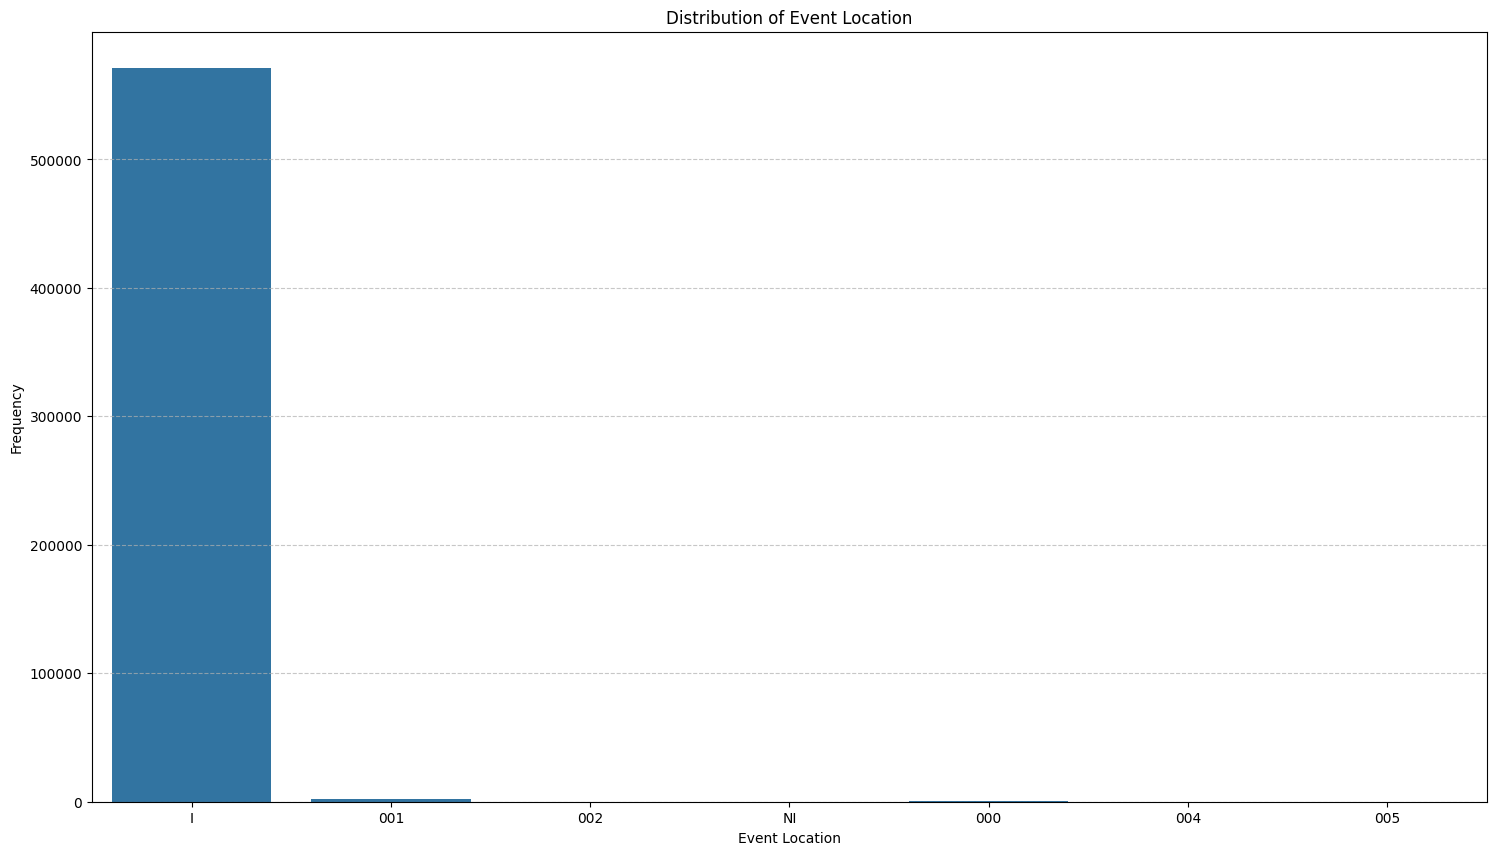

In [71]:
# EVENT_LOCATION
print(df["EVENT_LOCATION"].describe(),"\n")
df["EVENT_LOCATION"].astype('category')

print(df["EVENT_LOCATION"].value_counts())

# Plotting distribution of event location
plt.figure(figsize=(18, 10))
sns.countplot(x=df["EVENT_LOCATION"])
plt.title("Distribution of Event Location")
plt.xlabel("Event Location")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# it may have a code similar to the reporter occupation code

### DATE_REPORT_TO_MANUFACTURER
*Definition*: Indicates date report was sent to manufacturer from a user facility or importer. User facilities are required to send reports of device-related deaths and serious injuries to manufacturers, and importers are required to send reports of device-associated deaths, serious injuries and malfunctions to manufacturers.

In [72]:
df[df['DATE_REPORT_TO_MANUFACTURER'].notna()][['DATE_REPORT_TO_MANUFACTURER']].head(2)

DATE_REPORT_TO_MANUFACTURER
12861                  01/24/2019
12862                  01/24/2019

C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\3080197290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DATE_REPORT_TO_MANUFACTURER"] = pd.to_datetime(df["DATE_REPORT_TO_MANUFACTURER"], format='%m/%d/%Y', errors='coerce')


count                    330
mean     2021-04-01 22:24:00
min      2005-01-10 00:00:00
25%      2020-01-27 00:00:00
50%      2021-05-18 00:00:00
75%      2022-09-19 18:00:00
max      2023-12-29 00:00:00
Name: DATE_REPORT_TO_MANUFACTURER, dtype: object


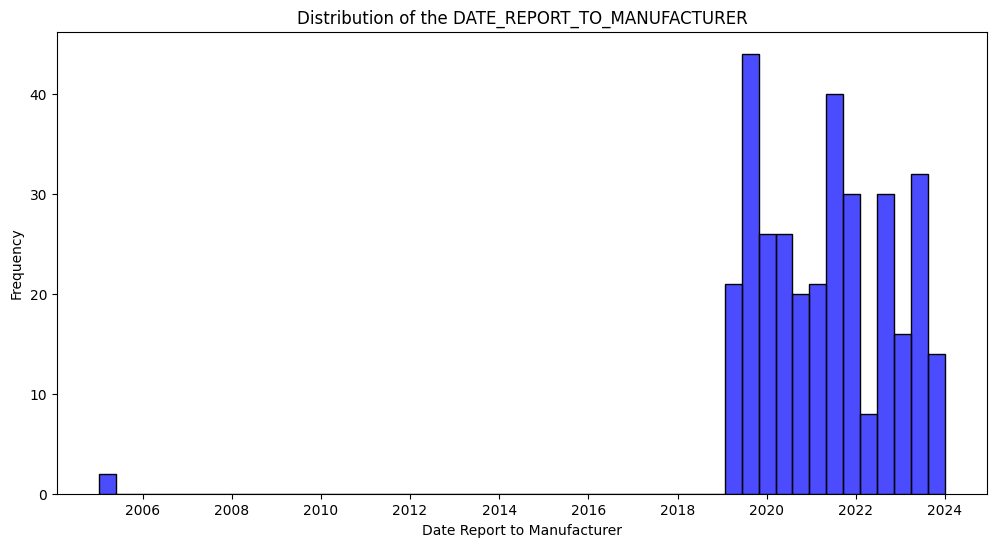

In [73]:
df["DATE_REPORT_TO_MANUFACTURER"] = pd.to_datetime(df["DATE_REPORT_TO_MANUFACTURER"], format='%m/%d/%Y', errors='coerce')
print(df["DATE_REPORT_TO_MANUFACTURER"].describe())

# plot the distribution of the DATE_REPORT_TO_MANUFACTURER
plt.figure(figsize=(12, 6))
sns.histplot(df["DATE_REPORT_TO_MANUFACTURER"], bins=50, color='blue', alpha=0.7)
plt.title("Distribution of the DATE_REPORT_TO_MANUFACTURER")
plt.xlabel("Date Report to Manufacturer")
plt.ylabel("Frequency")
plt.show()

In [74]:
df["DATE_REPORT_TO_MANUFACTURER"].dt.year.value_counts()

DATE_REPORT_TO_MANUFACTURER
2019.0    74
2021.0    69
2022.0    64
2020.0    63
2023.0    58
2005.0     2
Name: count, dtype: int64

In [75]:
print(df[df["DATE_REPORT_TO_MANUFACTURER"].dt.year==2005][["DATE_REPORT","REPORT_DATE","DATE_REPORT_TO_MANUFACTURER","REPORT_NUMBER"]])

       DATE_REPORT REPORT_DATE DATE_REPORT_TO_MANUFACTURER       REPORT_NUMBER
238849  2019-12-16         NaT                  2005-01-10  1625425-2020-00047
238850  2019-12-16         NaT                  2005-01-10  1625425-2020-00047


In [76]:
# check consistency for report source code
print(df[df['DATE_REPORT_TO_MANUFACTURER'].notna()]["REPORT_SOURCE_CODE"].value_counts())

REPORT_SOURCE_CODE
U    279
M     51
Name: count, dtype: int64


### MANUFACTURER_G1_NAME
*Definition*: Full name and address of the manufacturer site.

In [77]:
print(f"There are {df['MANUFACTURER_G1_NAME'].isna().sum()} missing values in the column ({df['MANUFACTURER_G1_NAME'].isna().sum()/df.shape[0]*100}%).")

There are 268934 missing values in the column (23.17377704629861%).


In [78]:
# MANUFACTURER_G1_NAME
print(df["MANUFACTURER_G1_NAME"].describe(),"\n")
print(df["MANUFACTURER_G1_NAME"].value_counts().head(5))

# as we can see some of them have different names but are the same manufacturer (e.g. Medtronic Inc. and Medtronic Singapore Operations)

count     891576
unique       163
top         MPRI
freq      370883
Name: MANUFACTURER_G1_NAME, dtype: object 

MANUFACTURER_G1_NAME
MPRI                                  370883
BOSTON SCIENTIFIC CORPORATION         179173
ST. JUDE MEDICAL, INC.(CRM-SYLMAR)    127374
MEDTRONIC SINGAPORE OPERATIONS         53381
MEDTRONIC IRELAND                      33529
Name: count, dtype: int64


### DATE_MANUFACTURER_RECEIVED
*Description*: This field represents the date when a manufacturer received information that a reportable event occurred.

For supplement or follow-up reports, manufacturers are asked to provide the date that the follow-up information was received. MAUDE will display the date the manufacturer provided in this field for each supplement or follow-up report received. This field lists the dates for each follow-up received in order of receipt. If a date is not provided by the manufacturer, MAUDE will display “Not provided” in place of a date.

In [79]:
df['DATE_MANUFACTURER_RECEIVED'].head(2)

0    12/19/2018
1    12/19/2018
Name: DATE_MANUFACTURER_RECEIVED, dtype: object

C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\1906343128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DATE_MANUFACTURER_RECEIVED"] = pd.to_datetime(df["DATE_MANUFACTURER_RECEIVED"], format='%m/%d/%Y', errors='coerce')


count                          1136523
mean     2021-07-07 02:15:04.710947584
min                2001-02-01 00:00:00
25%                2020-03-16 00:00:00
50%                2021-07-09 00:00:00
75%                2022-11-03 00:00:00
max                2023-12-28 00:00:00
Name: DATE_MANUFACTURER_RECEIVED, dtype: object


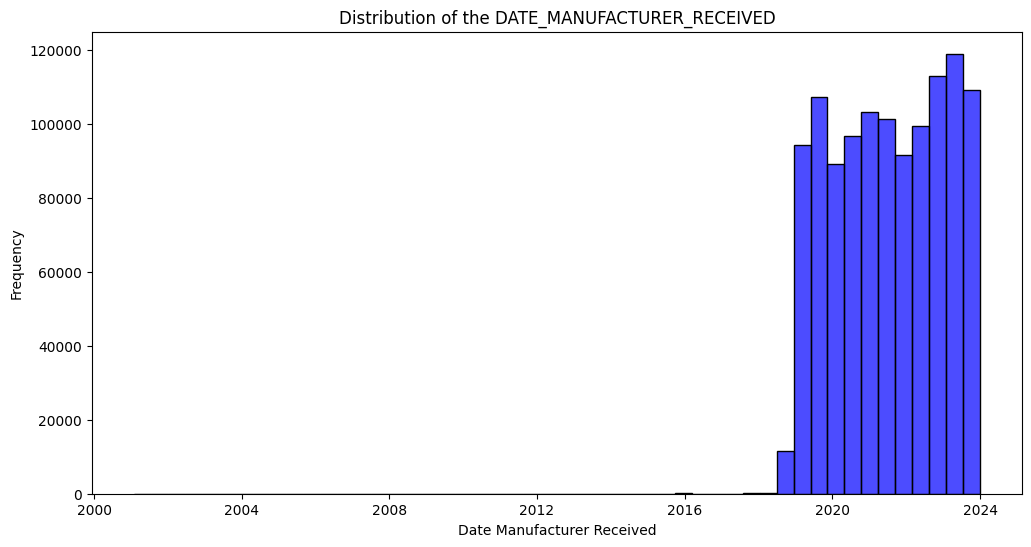

DATE_MANUFACTURER_RECEIVED
2001.0         5
2003.0         6
2005.0         2
2008.0         9
2009.0         3
2010.0         2
2011.0         2
2012.0        21
2013.0         8
2014.0        24
2015.0        59
2016.0        56
2017.0        98
2018.0     19004
2019.0    221248
2020.0    207616
2021.0    215472
2022.0    226940
2023.0    245948
Name: count, dtype: int64


In [80]:
df["DATE_MANUFACTURER_RECEIVED"] = pd.to_datetime(df["DATE_MANUFACTURER_RECEIVED"], format='%m/%d/%Y', errors='coerce')
print(df["DATE_MANUFACTURER_RECEIVED"].describe())

# plot the distribution of the DATE_MANUFACTURER_RECEIVED
plt.figure(figsize=(12, 6))
sns.histplot(df["DATE_MANUFACTURER_RECEIVED"], bins=50, color='blue', alpha=0.7)
plt.title("Distribution of the DATE_MANUFACTURER_RECEIVED")
plt.xlabel("Date Manufacturer Received")
plt.ylabel("Frequency")
plt.show()

print(df["DATE_MANUFACTURER_RECEIVED"].dt.year.value_counts().sort_index())

In [81]:
print(df[df["DATE_MANUFACTURER_RECEIVED"].dt.year==2001][["DATE_REPORT","REPORT_DATE","DATE_REPORT_TO_MANUFACTURER","DATE_MANUFACTURER_RECEIVED","REPORT_NUMBER"]])

       DATE_REPORT REPORT_DATE DATE_REPORT_TO_MANUFACTURER  \
665829  2022-02-21         NaT                         NaT   
665830  2022-02-21         NaT                         NaT   
665831  2022-02-21         NaT                         NaT   
665832  2022-02-21         NaT                         NaT   
665833  2022-02-21         NaT                         NaT   

       DATE_MANUFACTURER_RECEIVED       REPORT_NUMBER  
665829                 2001-02-01  2649622-2021-24741  
665830                 2001-02-01  2649622-2021-24741  
665831                 2001-02-01  2649622-2021-24741  
665832                 2001-02-01  2649622-2021-24741  
665833                 2001-02-01  2649622-2021-24741  


### REMEDIAL_ACTION
*Definition*: Denotes whether a remedial action (e.g., a recall) was initiated.

Resources online explain that 
| Remedial Action | Description |
| --- | --- |
| RC | Recall |
| NO | Notification |
| MA | Modification/Adjustment |
| RL | Replace |
| OT | Other |
| IN | Inspection |
| PM | Patient Monitoring |
| RP | Repair |
| RB | Relabeling |

count     33249
unique        9
top          RC
freq      13328
Name: REMEDIAL_ACTION, dtype: object 

REMEDIAL_ACTION
RC    13328
NO    11946
OT     4030
RL     3303
MA      378
PM      176
IN       62
RP       21
RB        5
Name: count, dtype: int64


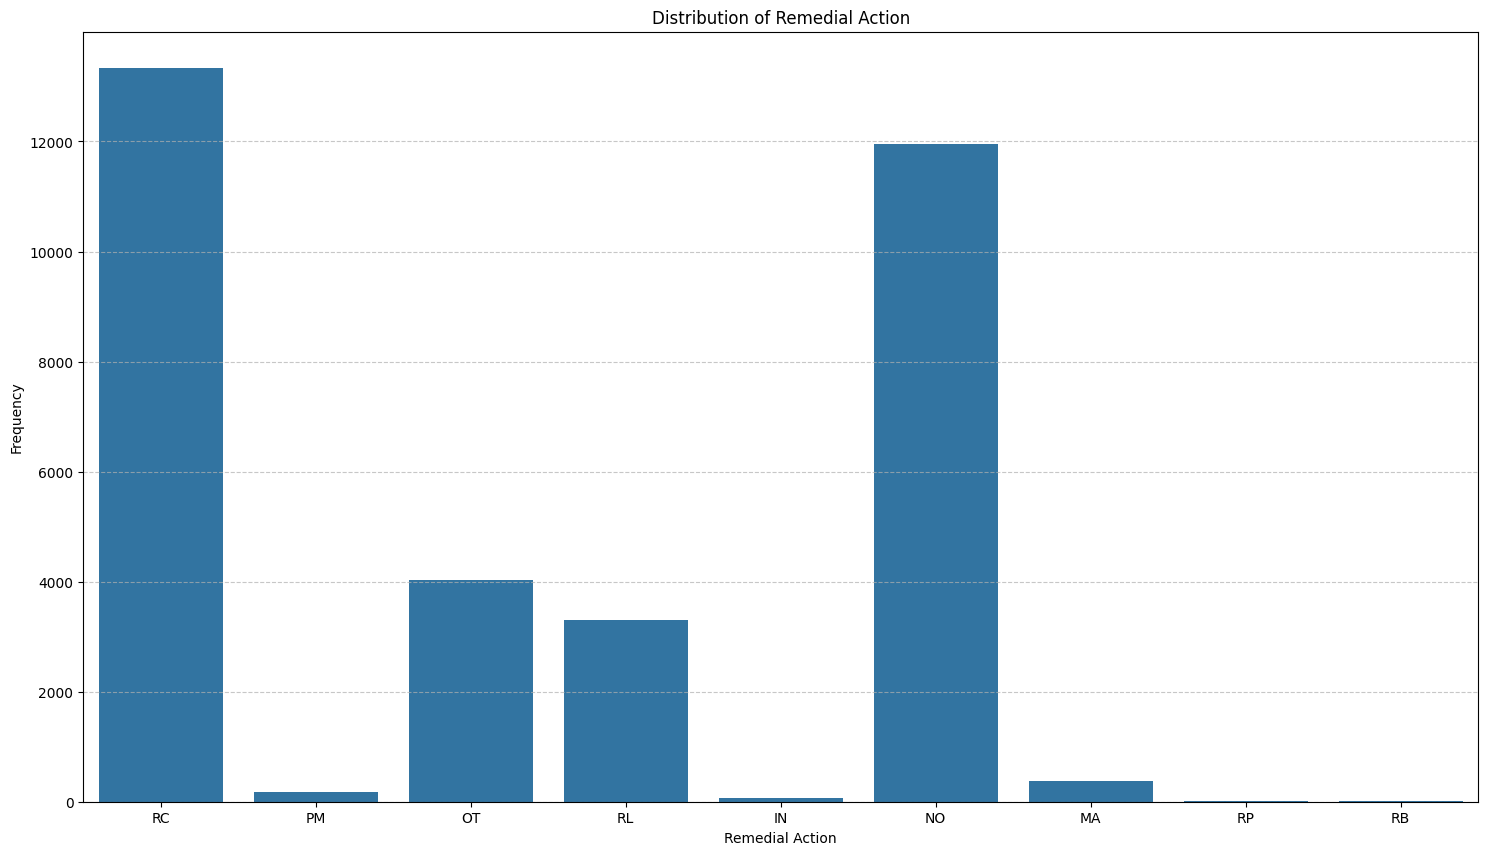

In [82]:
# REMEDIAL_ACTION
print(df["REMEDIAL_ACTION"].describe(),"\n")
df["REMEDIAL_ACTION"].astype('category')
print(df["REMEDIAL_ACTION"].value_counts())

# Plotting distribution of remedial action
plt.figure(figsize=(18, 10))
sns.countplot(x=df["REMEDIAL_ACTION"])
plt.title("Distribution of Remedial Action")
plt.xlabel("Remedial Action")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### REMOVAL_CORRECTION_NUMBER
*Definition*: The correction or removal number following the format directed by 21 CFR Part 806.

In [83]:
# REMOVAL_CORRECTION_NUMBER
print(df["REMOVAL_CORRECTION_NUMBER"].describe(),"\n")
print(df["REMOVAL_CORRECTION_NUMBER"].value_counts().head(5))

count           11010
unique            126
top       Z-1530-2021
freq             2018
Name: REMOVAL_CORRECTION_NUMBER, dtype: object 

REMOVAL_CORRECTION_NUMBER
Z-1530-2021         2018
Z-2000-2021          931
FA-Q121-CRM-1        576
Z-0087-2015          432
Z-3255/3259-2018     424
Name: count, dtype: int64


### EVENT_TYPE
*Definition*: Type of reportable event, e.g., death, injury, or malfunction.


| Event type | Description |
| --- | --- |
| IN | Injury |
| M | Malfunction |
| D | Death |
| O | Other |
| * | No answer provided

count     1160510
unique          5
top            IN
freq       682200
Name: EVENT_TYPE, dtype: object 

EVENT_TYPE
IN    682200
M     463877
D      14393
O         28
*         12
Name: count, dtype: int64


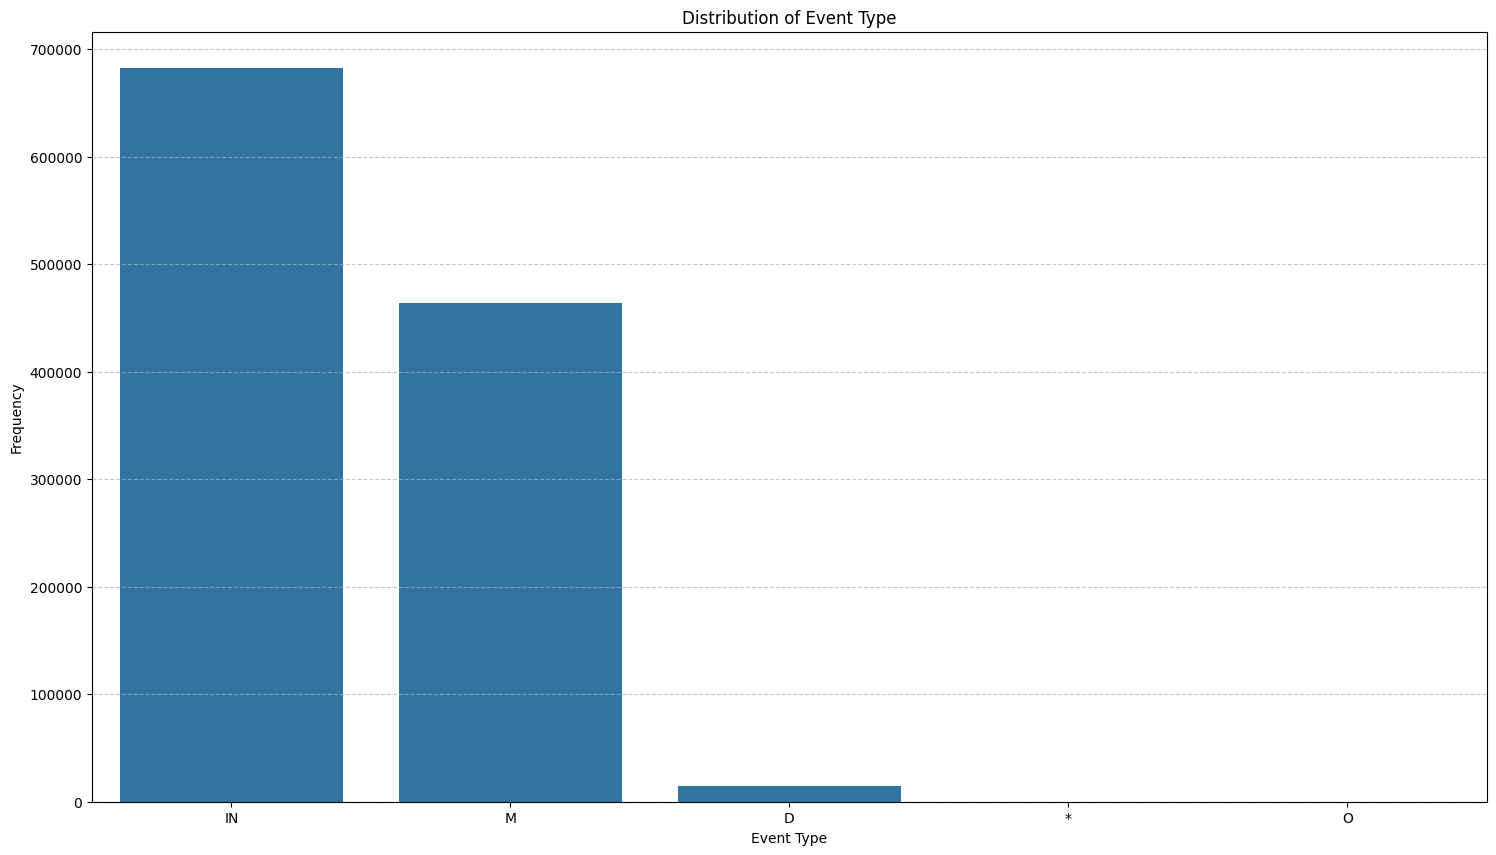

In [84]:
# EVENT_TYPE
print(df["EVENT_TYPE"].describe(),"\n")
print(df["EVENT_TYPE"].value_counts())

# Plotting distribution of event type
plt.figure(figsize=(18, 10))
sns.countplot(x=df["EVENT_TYPE"])
plt.title("Distribution of Event Type")
plt.xlabel("Event Type")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [85]:
# Are death cases reported to FDA as expected?
print(pd.crosstab(df["EVENT_TYPE"], df["REPORT_TO_FDA"])) # less than expected
print("\n")

# See if user facility reports reported to fda are mostly death cases
print(pd.crosstab(df[df["REPORT_SOURCE_CODE"] != "M"]["EVENT_TYPE"], df[df["REPORT_SOURCE_CODE"] != "M"]["REPORT_TO_FDA"])) # yes all of the death cases are reported as expected

REPORT_TO_FDA       *    I       N    Y
EVENT_TYPE                             
*                   0   11       0    1
D                4182   16    3893   11
IN             276678  103  129207   25
M              163374   24   90651  256


REPORT_TO_FDA   *    I  N    Y
EVENT_TYPE                    
*               0   11  0    1
D               0   16  0   11
IN             18  103  6   15
M               0   24  0  250


### TYPE_OF_REPORT
*Definition*: Denotes whether the report is an initial report or a follow-up report. 
Note this field adds follow-up reports, also called supplement reports, as they are received, # so readers can discern how many follow-up reports have been submitted. 

For example, a report with two follow-up reports will be denoted as "Initial, Follow-up, Follow-up."

In [86]:
# TYPE_OF_REPORT
print(df["TYPE_OF_REPORT"].describe(),"\n")
print(df["TYPE_OF_REPORT"].value_counts())

# May be possible that those with only 'F' values have forgotten the I in front of the string

count     1160266
unique          8
top           I,F
freq       481324
Name: TYPE_OF_REPORT, dtype: object 

TYPE_OF_REPORT
I,F          481324
I            435270
I,F,F        173833
I,F,F,F       49080
I,F,F,F,F     20292
F               224
F,F             200
F,F,F            43
Name: count, dtype: int64


TYPE_OF_REPORT
I,F          481548
I            435270
I,F,F        174033
I,F,F,F       49123
I,F,F,F,F     20292
Name: count, dtype: int64


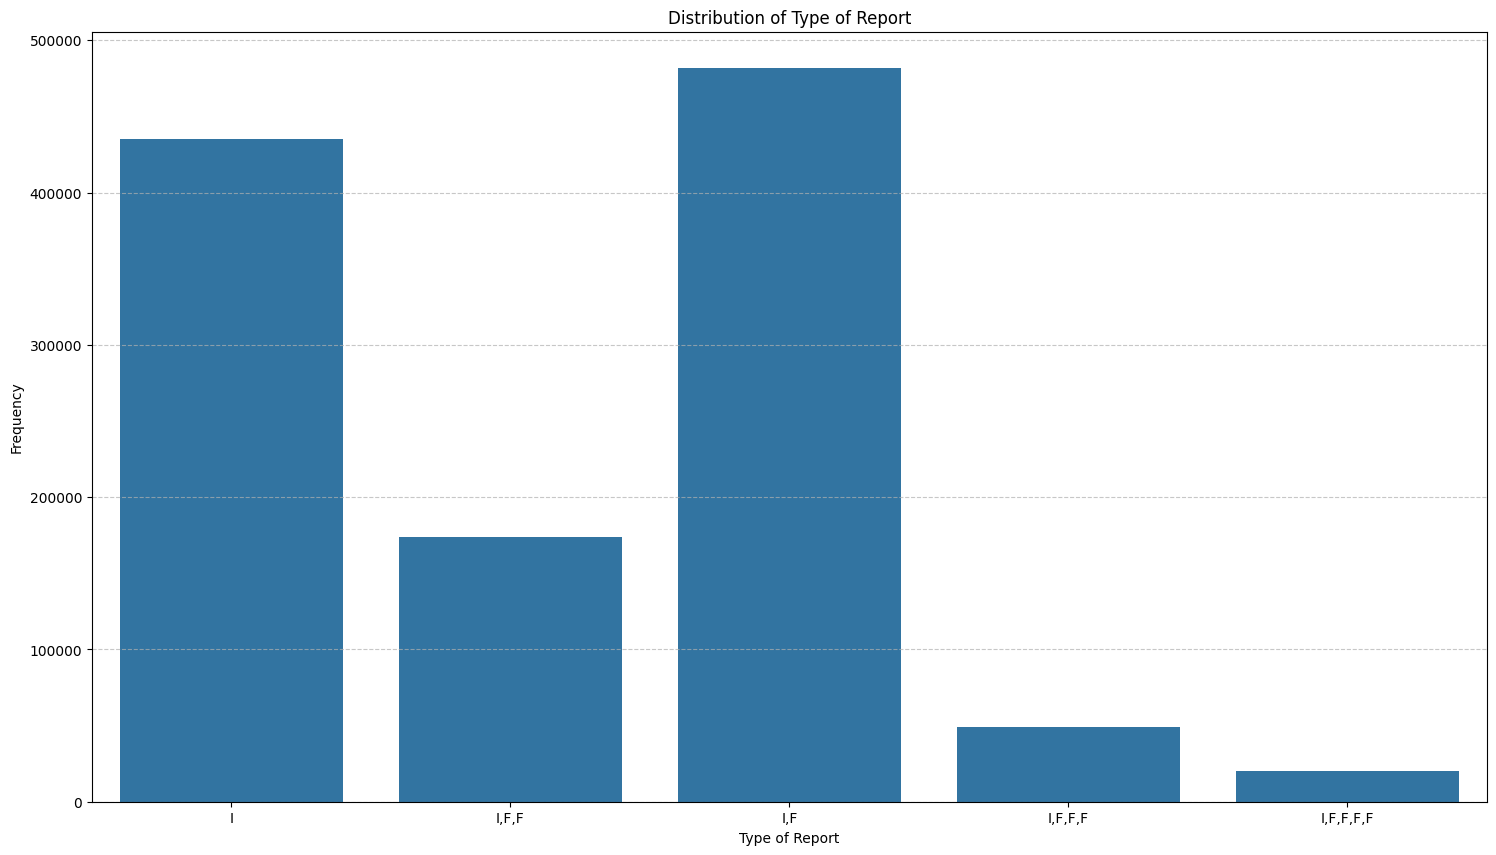

In [87]:
df.loc[df["TYPE_OF_REPORT"] == 'F', "TYPE_OF_REPORT"] = 'I,F'
df.loc[df["TYPE_OF_REPORT"] == 'F,F', "TYPE_OF_REPORT"] = 'I,F,F'
df.loc[df["TYPE_OF_REPORT"] == 'F,F,F', "TYPE_OF_REPORT"] = 'I,F,F,F'

# Plotting distribution of type of report
print(df["TYPE_OF_REPORT"].value_counts())

plt.figure(figsize=(18, 10))
sns.countplot(x=df["TYPE_OF_REPORT"])
plt.title("Distribution of Type of Report")
plt.xlabel("Type of Report")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### SOURCE_TYPE
*Definition*: The source through which the manufacturer became aware of the reported adverse event.

In [88]:
# SOURCE_TYPE
print(df["SOURCE_TYPE"].describe(),"\n")
print(df["SOURCE_TYPE"].value_counts().head(10))
# as we can see we have mixed values both coded and not coded. We may want to code them all

count                           1142619
unique                              172
top       COMPANY REPRESENTATIVE,HEALTH
freq                             237585
Name: SOURCE_TYPE, dtype: object 

SOURCE_TYPE
COMPANY REPRESENTATIVE,HEALTH    237585
05                               149130
COMPANY REPRESENTATIVE,FOREIG    130708
05,07                            120825
01,05,07                          85886
HEALTH PROFESSIONAL               79732
COMPANY REPRESENTATIVE            75272
07                                52749
05,06,07                          38757
01,05,06,07                       20791
Name: count, dtype: int64


In [89]:
description_to_code = {
    'OTHER': '00',
    'FOREIGN': '01',
    'STUDY': '02',
    'LITERATURE': '03',
    'CONSUMER': '04',
    'HEALTH PROFESSIONAL': '05',
    'USER FACILITY': '06',
    'COMPANY REPRESENTATIVE': '07',
    'DISTRIBUTOR': '08',
    'UNKNOWN': '99'
}

import difflib

def replace_with_codes(mixed_string, description_to_code):
    if pd.isna(mixed_string):  # Check if the value is NaN or None
        return ''  # Or return some placeholder like 'UNKNOWN'
    
    tokens = mixed_string.split(',')
    result = []
    
    for token in tokens:
        if token in description_to_code.values():  # It's already a code
            result.append(token)
        else:  # Use difflib to find the closest match for the description
            closest_match = difflib.get_close_matches(token, description_to_code.keys(), n=1)
            if closest_match:
                result.append(description_to_code[closest_match[0]])
    
    return ','.join(result)

df.loc[:, 'SOURCE_TYPE'] = df['SOURCE_TYPE'].apply(lambda x: replace_with_codes(x, description_to_code))

In [90]:
print(df['SOURCE_TYPE'].value_counts())

SOURCE_TYPE
07                365606
05                228862
07,01             130708
05,07             120825
01,05,07           85886
                   ...  
00,01,04,06,07         2
04,01,06               2
05,00,02               2
03,02                  2
01,04,06,07            2
Name: count, Length: 143, dtype: int64


In [91]:
# Checking that no string is present in the SOURCE_TYPE column after the conversion
import re

# Modello regex per identificare stringhe che contengono caratteri diversi da numeri e virgole
pattern = re.compile(r'[^0-9,]')
complessi = []

for value in df['SOURCE_TYPE'].unique():
    if value is not np.nan and pattern.search(value):
        print(f"Valore contenente caratteri diversi da numeri e virgole: {value}")
        complessi.append(value)

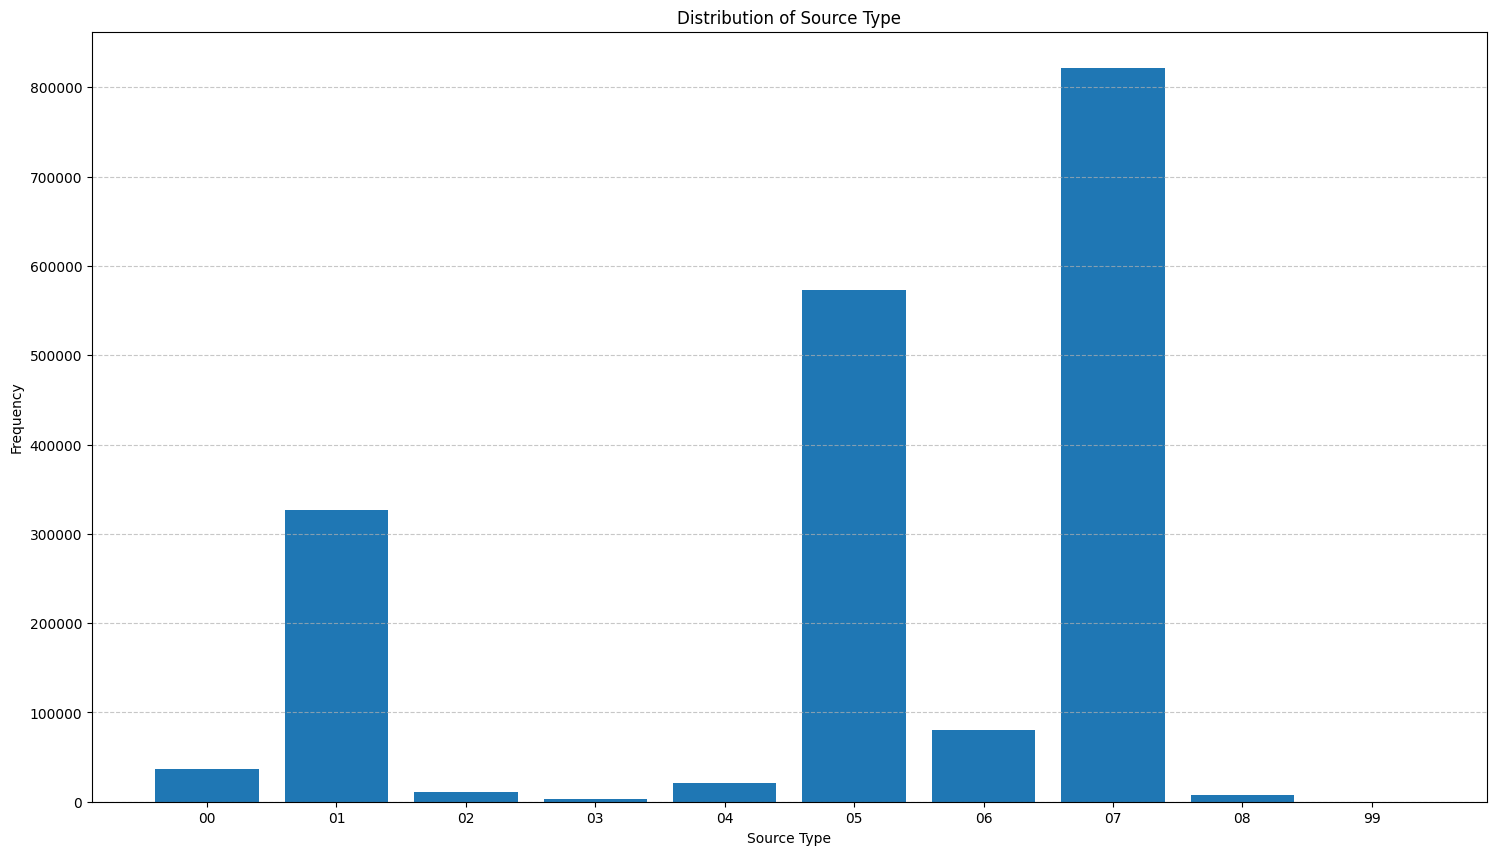

In [92]:
# SOURCE_TYPE PLOT
# Plotting distribution of source type
codes = [ '00', '01', '02', '03', '04', '05', '06', '07', '08', '99']
count = [0] * len(codes)

for value in df["SOURCE_TYPE"]:
    if pd.isna(value):  # Skip NaN values
        continue
    else:
        for i in codes: 
            if i in value: 
                count[codes.index(i)] += 1 
            
plt.figure(figsize=(18, 10))
plt.bar(codes, count)
plt.title("Distribution of Source Type")
plt.xlabel("Source Type")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() # the majority of the reports come from health professionals along with company representatives and foreign sources

### DATE_ADDED
*Definition*: Date that the initial report was received in eMDR by FDA. This date marks when FDA first became aware of the reported event and does not change when a follow-up or supplement report is received.

In [93]:
df["DATE_ADDED"] = pd.to_datetime(df["DATE_ADDED"], errors='coerce')
print(df["DATE_ADDED"].describe())

count                          1158208
mean     2021-08-16 10:26:02.778361344
min                2019-01-01 00:00:00
25%                2020-04-21 00:00:00
50%                2021-08-25 00:00:00
75%                2022-12-14 00:00:00
max                2024-02-15 00:00:00
Name: DATE_ADDED, dtype: object


C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\3853249190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DATE_ADDED"] = pd.to_datetime(df["DATE_ADDED"], errors='coerce')


In [94]:
print(df["DATE_ADDED"].dt.year.value_counts())
print(df[df["DATE_ADDED"].notna()][["DATE_ADDED","REPORT_NUMBER"]].head())

DATE_ADDED
2023.0    279702
2022.0    234817
2019.0    217864
2021.0    215049
2020.0    210771
2024.0         5
Name: count, dtype: int64
  DATE_ADDED       REPORT_NUMBER
0 2019-01-01  2938836-2019-00001
1 2019-01-01  2938836-2019-00001
2 2019-01-01  2938836-2019-00002
3 2019-01-01  2938836-2019-00002
4 2019-01-01  2938836-2019-00003


### DATE_CHANGED
Seems to be the last update of the page

In [95]:
df["DATE_CHANGED"] = pd.to_datetime(df["DATE_CHANGED"], format='%m/%d/%Y', errors='coerce')
print(df["DATE_CHANGED"].describe())

count                          1160510
mean     2022-09-07 23:57:08.988290304
min                2019-01-03 00:00:00
25%                2021-04-02 00:00:00
50%                2023-08-08 00:00:00
75%                2023-12-21 00:00:00
max                2024-06-06 00:00:00
Name: DATE_CHANGED, dtype: object


C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\1468911981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DATE_CHANGED"] = pd.to_datetime(df["DATE_CHANGED"], format='%m/%d/%Y', errors='coerce')


### REPORTER_COUNTRY_CODE
*Definition*: Denotes the country of the initial reporter (e.g., the user, caregiver, etc.).

count     905308
unique       128
top           US
freq      633428
Name: REPORTER_COUNTRY_CODE, dtype: object 

REPORTER_COUNTRY_CODE
US    633428
JA     49541
AS     37964
CH     26501
UK     24389
FR     17889
CA     15794
IT     15052
GM     14812
SP      8595
Name: count, dtype: int64


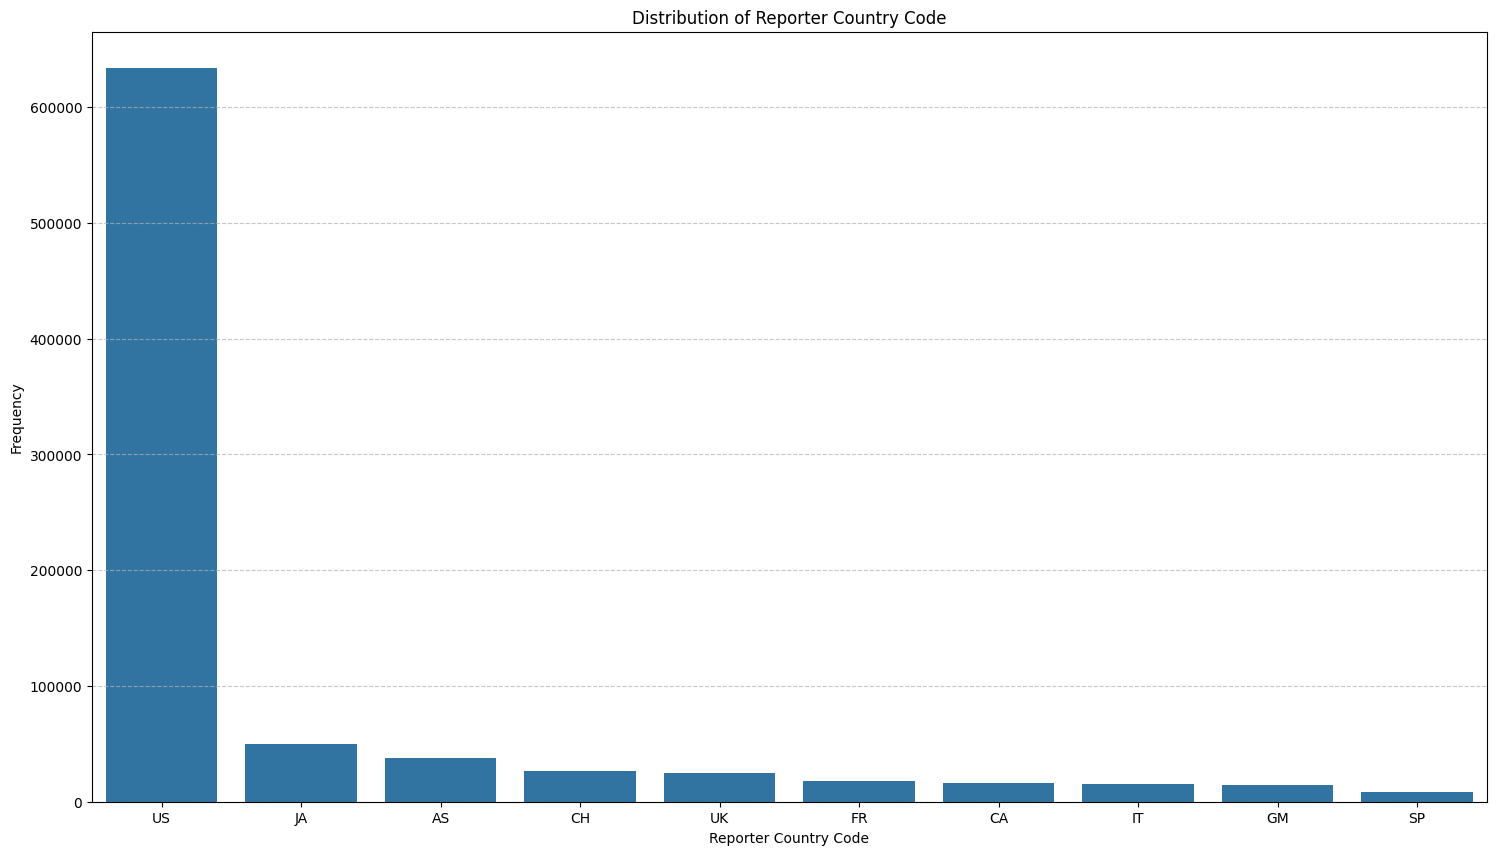

In [96]:
# REPORTER_COUNTRY_CODE
print(df["REPORTER_COUNTRY_CODE"].describe(),"\n")

# Printing top 10 most frequent reporter country codes
print(df["REPORTER_COUNTRY_CODE"].value_counts().head(10))

# Plotting distribution of reporter country code top 10
plt.figure(figsize=(18, 10))
sns.countplot(x=df["REPORTER_COUNTRY_CODE"], order=df["REPORTER_COUNTRY_CODE"].value_counts().head(10).index)
plt.title("Distribution of Reporter Country Code")
plt.xlabel("Reporter Country Code")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### PMA_PMN_NUMBER
*Definition*: Approved PMA or cleared 510(k), or premarket notification (PMN) number for the suspect device.
premarket approval or 510 as premarket submission to demonstrate that the device to be marketed is safe and effective, PMN is a premarket notification submission to FDA to demonstrate that the device to be marketed is substantially equivalent to a legally marketed device


In [97]:
#PMA_PMN_NUMBER
print(df["PMA_PMN_NUM"].describe(),"\n")
print(df["PMA_PMN_NUM"].head(3))

count     1101910
unique        230
top       P930039
freq       332260
Name: PMA_PMN_NUM, dtype: object 

0    P030054
1    P030054
2    P880086
Name: PMA_PMN_NUM, dtype: object


### EXEMPTION_NUMBER
*Definition*: Exemption/Variance Number used to identify MDR reports that are being submitted under the conditions of an exemption or variance granted by FDA under 21 CFR 803.19.

In [98]:
print(df["EXEMPTION_NUMBER"].info(),"\n")
print(df[df["EXEMPTION_NUMBER"].notna()][["EXEMPTION_NUMBER"]].head(3))

<class 'pandas.core.series.Series'>
Index: 1160510 entries, 0 to 1209610
Series name: EXEMPTION_NUMBER
Non-Null Count  Dtype  
--------------  -----  
16 non-null     float64
dtypes: float64(1)
memory usage: 17.7 MB
None 

        EXEMPTION_NUMBER
680237        30397758.0
680238        30397758.0
680239        30397758.0


### year

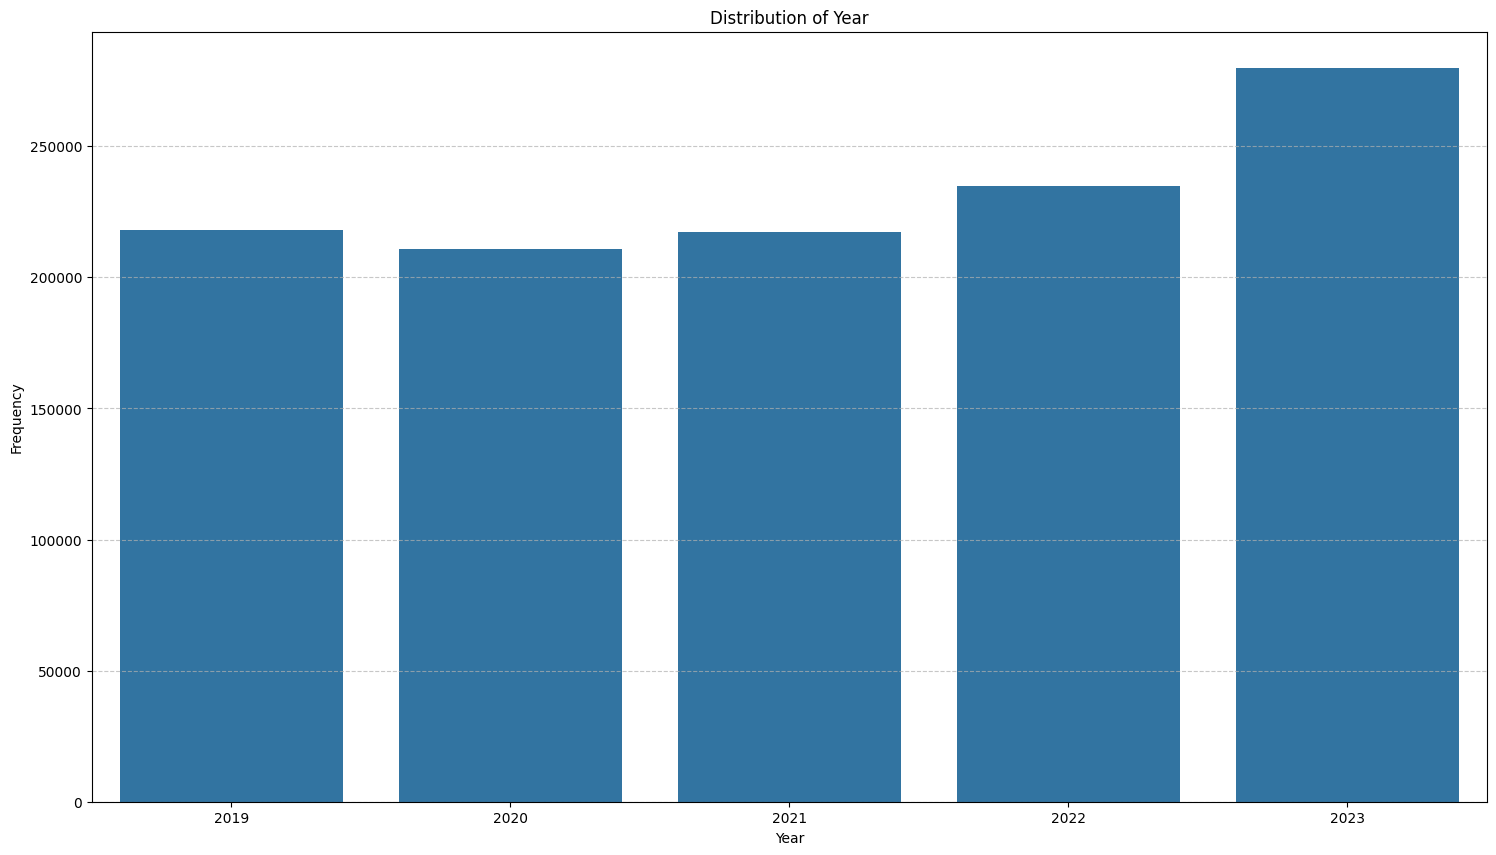

In [99]:
# year
df["year"].value_counts()

# Plotting distribution of year
plt.figure(figsize=(18, 10))
sns.countplot(x=df["year"])
plt.title("Distribution of Year")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

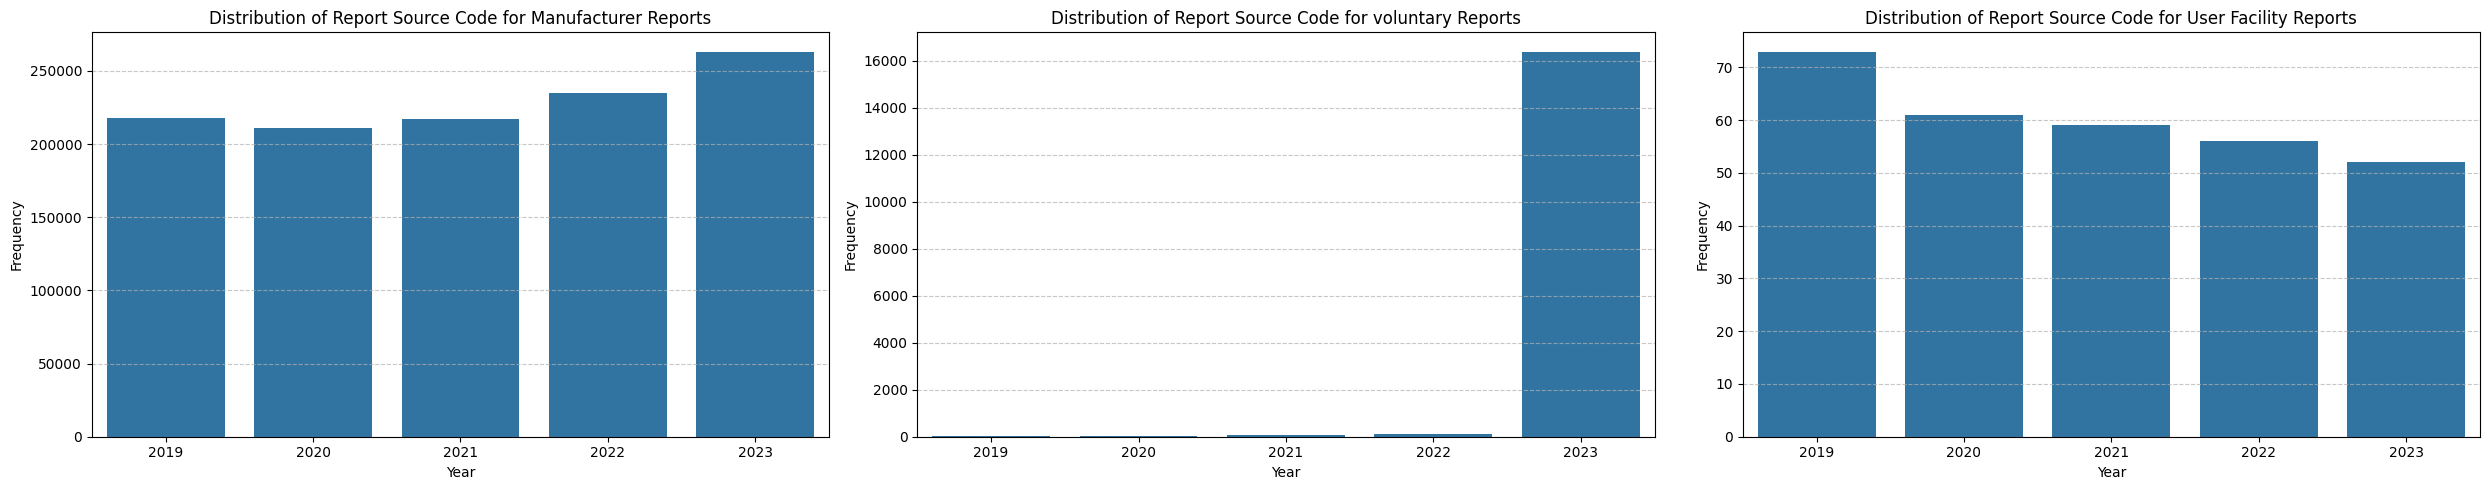

In [100]:
# report source code per year distribution
plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
sns.countplot(x=df[df["REPORT_SOURCE_CODE"] == "M"]["year"])
plt.title("Distribution of Report Source Code for Manufacturer Reports")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 3, 2)
sns.countplot(x=df[df["REPORT_SOURCE_CODE"] == "P"]["year"])
plt.title("Distribution of Report Source Code for voluntary Reports")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 3, 3)
sns.countplot(x=df[df["REPORT_SOURCE_CODE"] == "U"]["year"])
plt.title("Distribution of Report Source Code for User Facility Reports")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

# the voluntary reports seem to be more present in the last year (2023) while the others are almost evenly distributed.
# Manufacturer reports has its peak in 2023 too with a trend of increasing reports over the years while user facility reports are oscillating

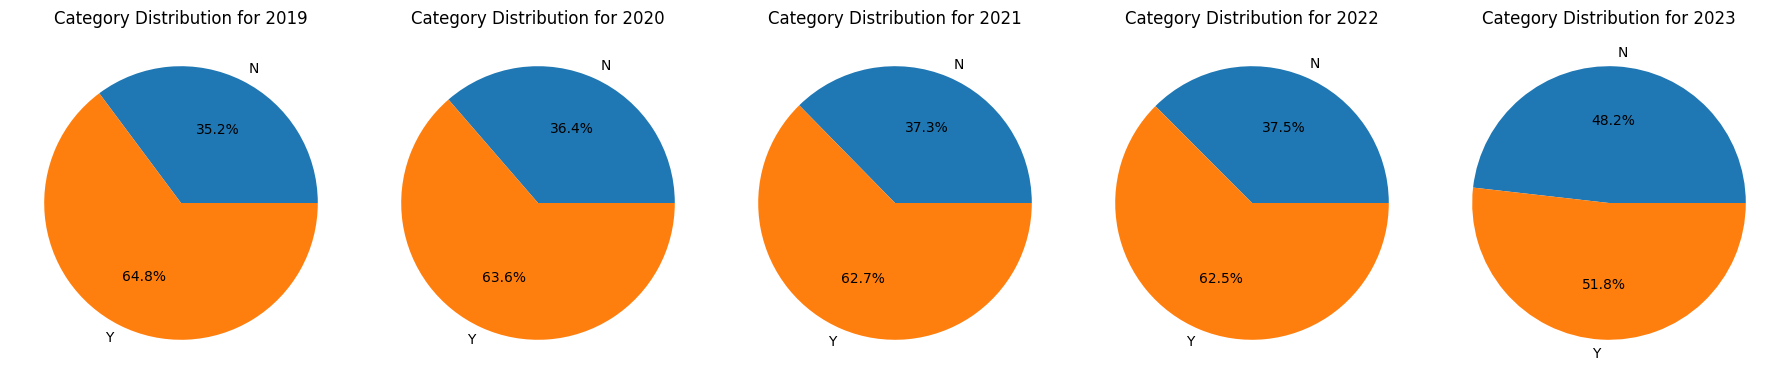

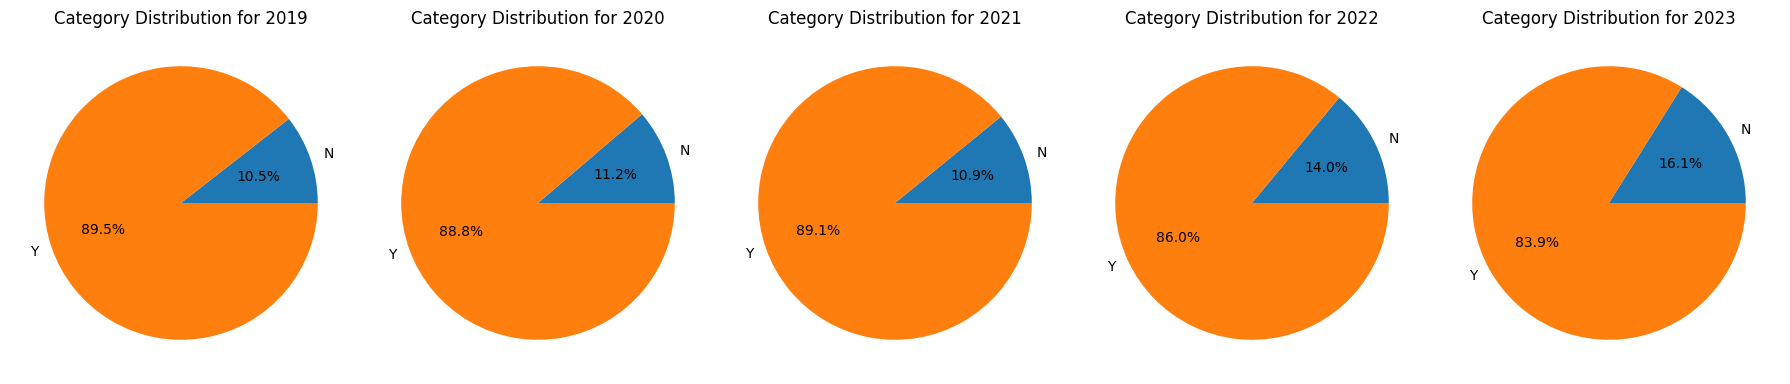

In [101]:
# Adverse events per year distribution and product problem flag
# Group the data by Year and Category, then calculate the count
grouped_data = df.groupby(['year', 'ADVERSE_EVENT_FLAG']).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, len(grouped_data.index), figsize=(18, 6))

# Plot pie charts in each subplot
for i, year in enumerate(grouped_data.index):
    axes[i].pie(grouped_data.loc[year], labels=grouped_data.columns, autopct='%1.1f%%')
    axes[i].set_title(f'Category Distribution for {year}')

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show() # adverse events were always the majority except for 2023. 

# Product problem flag per year distribution
# Group the data by Year and Category, then calculate the count
grouped_data = df.groupby(['year', 'PRODUCT_PROBLEM_FLAG']).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, len(grouped_data.index), figsize=(18, 6))

# Plot pie charts in each subplot
for i, year in enumerate(grouped_data.index):
    axes[i].pie(grouped_data.loc[year], labels=grouped_data.columns, autopct='%1.1f%%')
    axes[i].set_title(f'Category Distribution for {year}')

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show() # product problems were always the majority and reduced slightly for 2023.

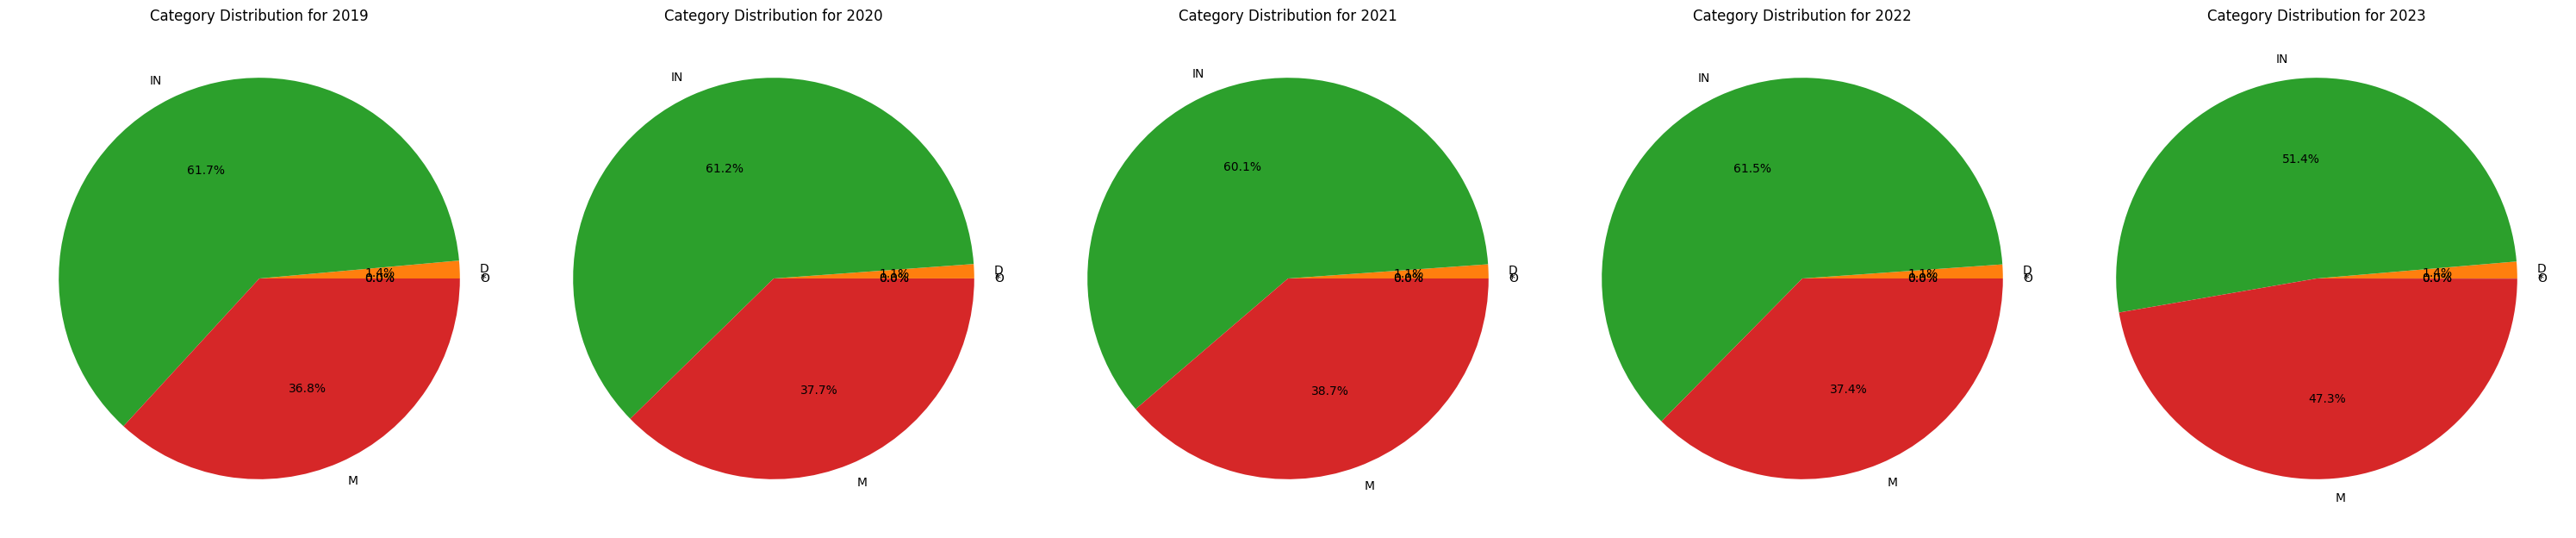

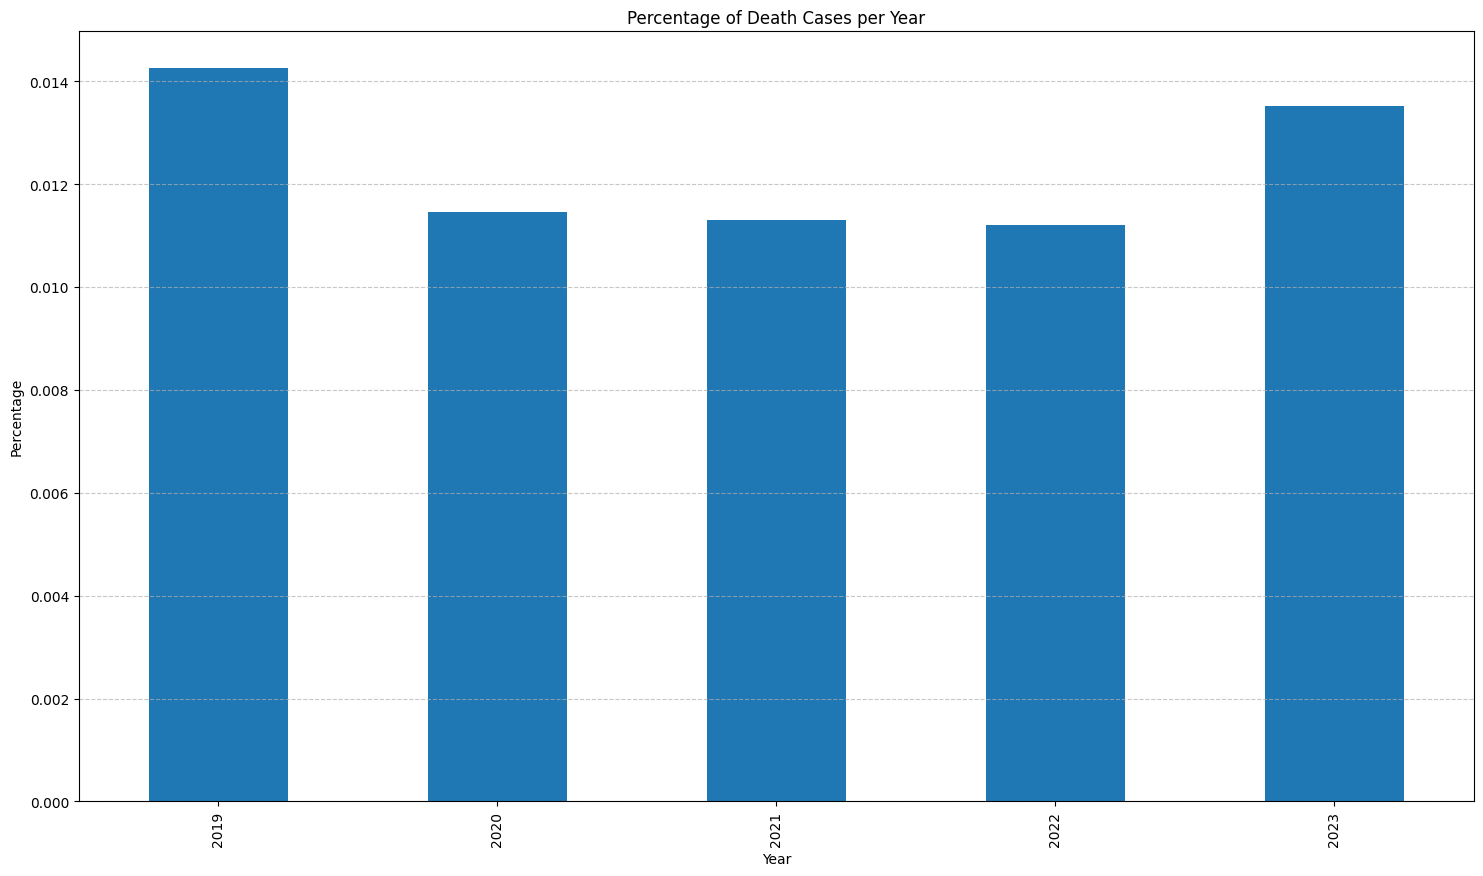

In [102]:
# EVENT_TYPE per year
# Group the data by Year and Category, then calculate the count
grouped_data = df.groupby(['year', 'EVENT_TYPE']).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, len(grouped_data.index), figsize=(30, 18))

# Plot pie charts in each subplot
for i, year in enumerate(grouped_data.index):
    axes[i].pie(grouped_data.loc[year], labels=grouped_data.columns, autopct='%1.1f%%')
    axes[i].set_title(f'Category Distribution for {year}')

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show() # product problems were always the majority and reduced slightly for 2023.

# death per year
# Computing the percentage of death cases per year
perc_death = df[df["EVENT_TYPE"] == "D"].groupby("year").size() / df.groupby("year").size()

# Plotting the percentage of death cases per year
plt.figure(figsize=(18, 10))
perc_death.plot(kind='bar')
plt.title("Percentage of Death Cases per Year")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

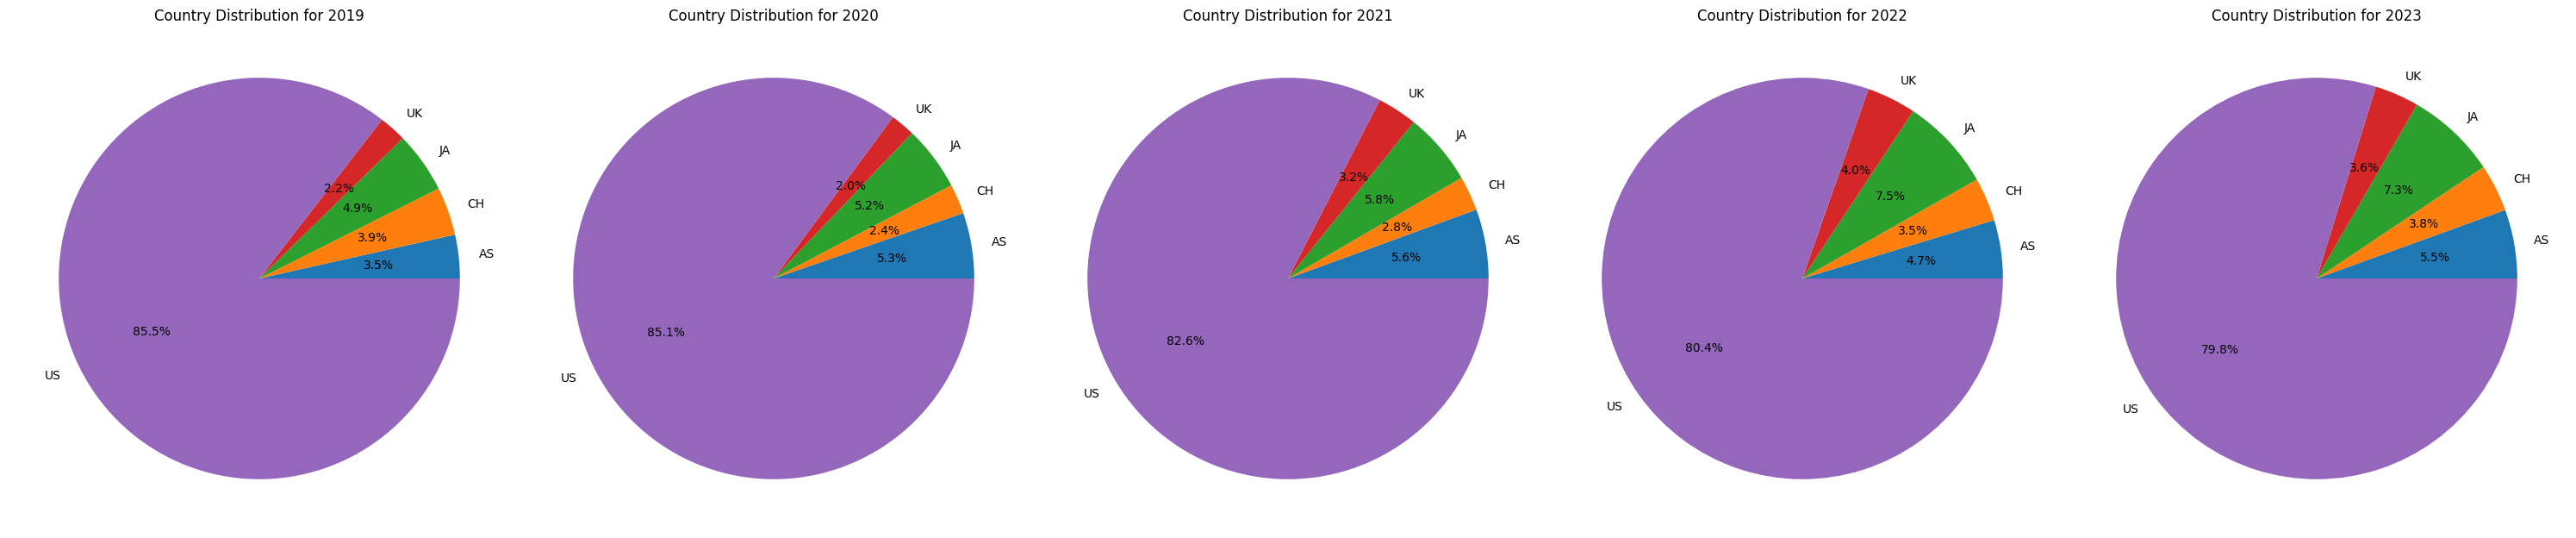

In [103]:
# REPORTER_COUNTRY_CODE per year
# Group the data by Year 
top_5_per_year = df[df["REPORTER_COUNTRY_CODE"].isin(df["REPORTER_COUNTRY_CODE"].value_counts().head(5).index)].groupby(['year', 'REPORTER_COUNTRY_CODE']).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, len(top_5_per_year.index), figsize=(30, 18))

# Plot pie charts in each subplot
for i, year in enumerate(top_5_per_year.index):
    axes[i].pie(top_5_per_year.loc[year], labels=top_5_per_year.columns, autopct='%1.1f%%')
    axes[i].set_title(f'Country Distribution for {year}')

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show() # the majority of the reports come from the US with a slight increase in the last year

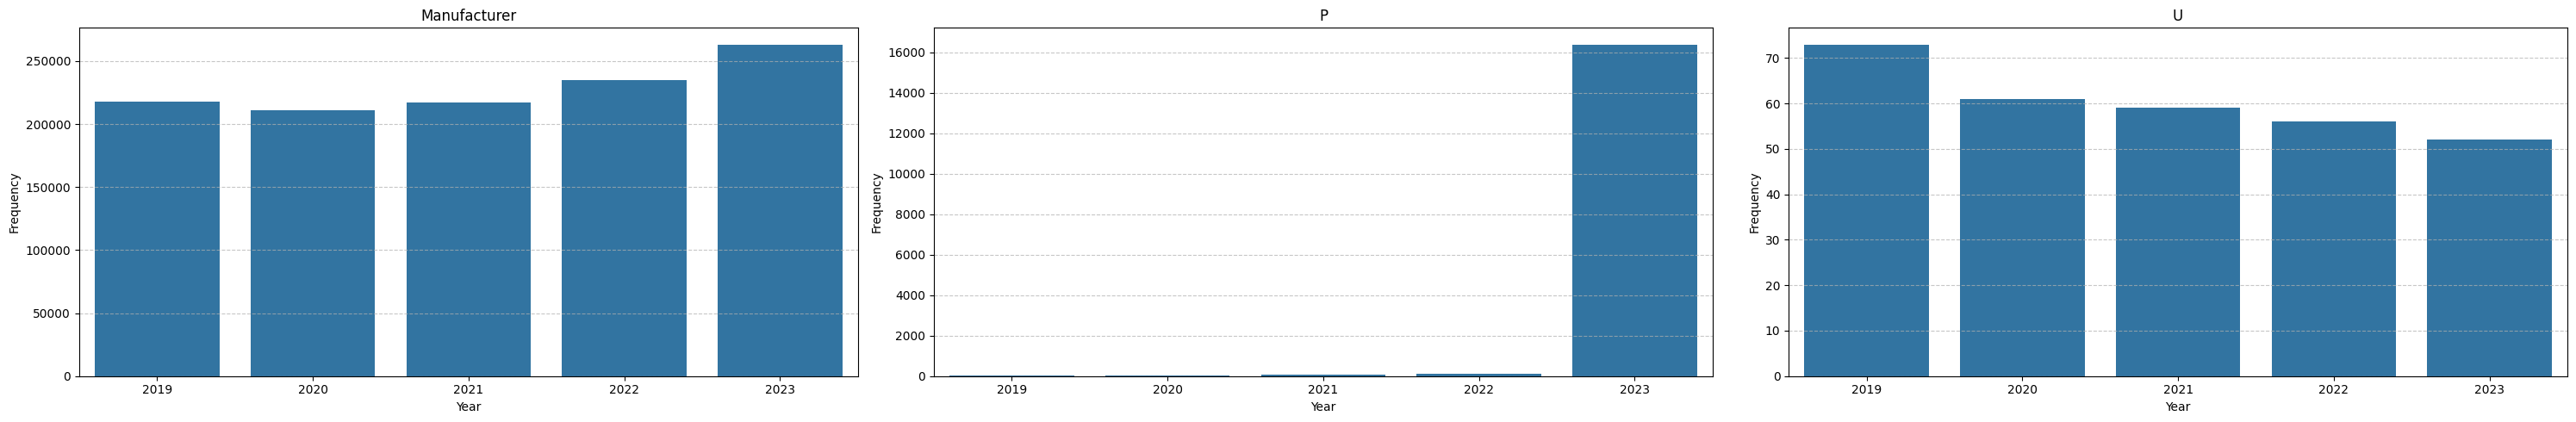

In [104]:
# bivariate analysis with year and report source code
# Plotting the number of reports per year and report source code
plt.figure(figsize=(30, 5))  # Adjust the figure size

# Subplot 1: Manufacturer Reports
plt.subplot(1, 3, 1)
sns.countplot(x=df[df["REPORT_SOURCE_CODE"] == "M"]["year"])
plt.title("Manufacturer")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Importer Reports
plt.subplot(1, 3, 2)
sns.countplot(x=df[df["REPORT_SOURCE_CODE"] == "P"]["year"])
plt.title("P")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 3: User Facility Reports
plt.subplot(1, 3, 3)
sns.countplot(x=df[df["REPORT_SOURCE_CODE"] == "U"]["year"])
plt.title("U")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

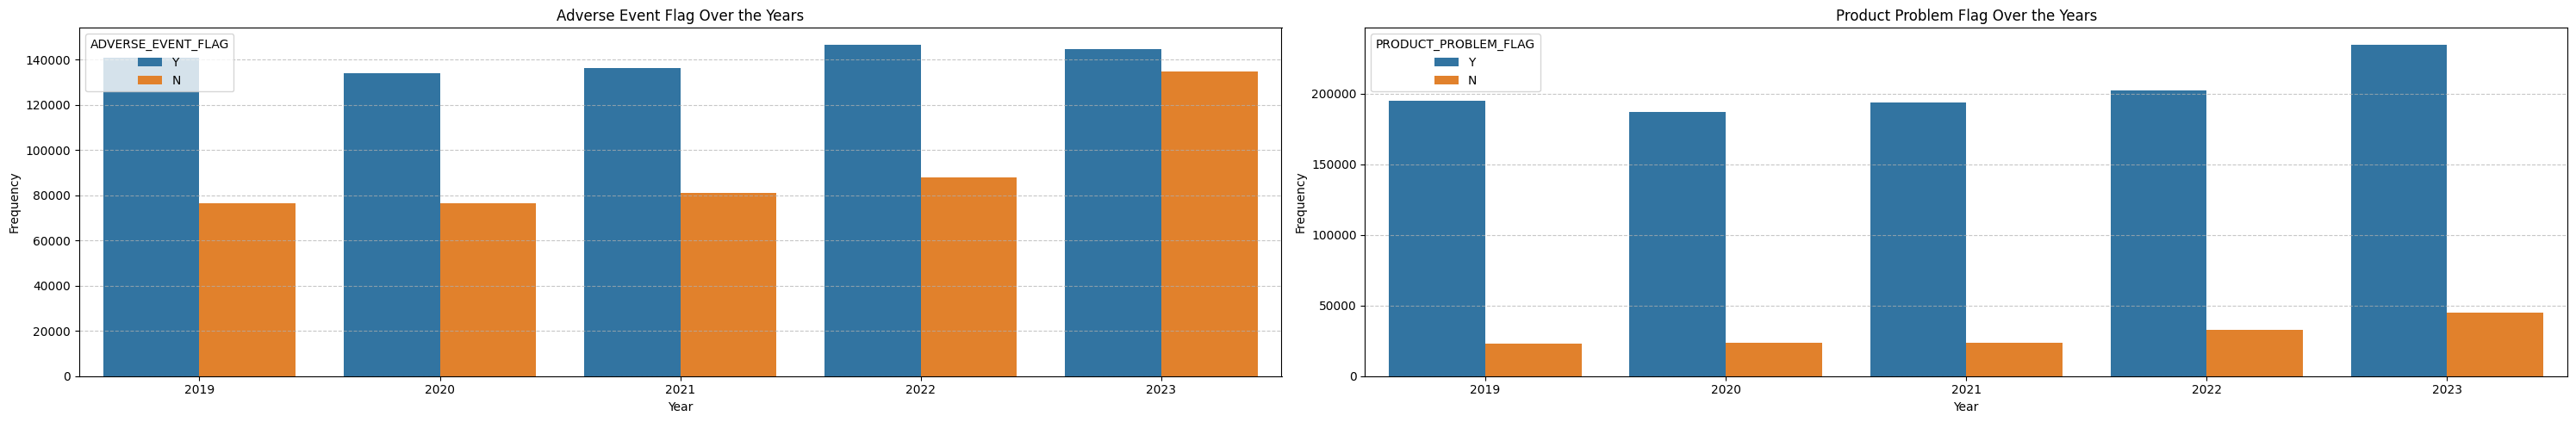

In [105]:
# Plotting the behavior of ADVERSE_EVENT_FLAG and PRODUCT_PROBLEM_FLAG over the years
# Subplotting ADVERSE_EVENT_FLAG and PRODUCT_PROBLEM_FLAG over the years

plt.figure(figsize=(30, 5))  # Adjust the figure size

# Subplot 1: Adverse Event Flag
plt.subplot(1, 2, 1)
sns.countplot(x=df["year"], hue=df["ADVERSE_EVENT_FLAG"])
plt.title("Adverse Event Flag Over the Years")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Product Problem Flag
plt.subplot(1, 2, 2)
sns.countplot(x=df["year"], hue=df["PRODUCT_PROBLEM_FLAG"])
plt.title("Product Problem Flag Over the Years")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

### DEVICE_SEQUENCE_NO
*Definition*: For reports with more than one device, this number differentiates between each device, as each device is displayed separately in the MAUDE search results.

In [106]:
df["DEVICE_SEQUENCE_NO"].describe()
df["DEVICE_SEQUENCE_NO"].value_counts() # the majority of reports have only one device involved

DEVICE_SEQUENCE_NO
1    1160450
2         31
3         19
0          8
4          2
Name: count, dtype: int64

### BRAND_NAME and GENERIC NAME
*Definition*: Trade or proprietary name of the suspect medical device as used in product labeling or in the catalogue.

In [107]:
print(df["BRAND_NAME"].describe(),"\n")
print(df["BRAND_NAME"].value_counts().head(10),"\n")

count                                1153582
unique                                  1525
top       CAPSUREFIX NOVUS LEAD MRI SURESCAN
freq                                  265906
Name: BRAND_NAME, dtype: object 

BRAND_NAME
CAPSUREFIX NOVUS LEAD MRI SURESCAN    265906
TENDRIL STS                            93879
INGEVITY MRI                           56199
SELECTSECURE MRI SURESCAN              44272
CAPSUREFIX NOVUS MRI SURESCAN          40837
ASSURITY MRI                           30826
INGEVITY+                              30521
CAPSURE SENSE LEAD MRI SURESCAN        23871
MICRA                                  22152
TENDRIL ST                             20583
Name: count, dtype: int64 



In [108]:
print(df["GENERIC_NAME"].describe(),"\n")
print(df["GENERIC_NAME"].value_counts().head(10),"\n")

count                           1160240
unique                              407
top       PERMANENT PACEMAKER ELECTRODE
freq                             426810
Name: GENERIC_NAME, dtype: object 

GENERIC_NAME
PERMANENT PACEMAKER ELECTRODE                                                       426810
ELECTRODE, PACEMAKER, PERMANENT                                                     152580
IMPLANTABLE PULSE GENERATOR, PACEMAKER (NON-CRT)                                    107160
IMPLANTABLE LEAD                                                                     58074
DRUG ELUTING PERMANENT RIGHT VENTRICULAR (RV)                                        44845
LEADLESS PACEMAKER                                                                   42607
DRUG ELUTING PERMANENT RIGHT VENTRICULAR OR ATRIAL PACEMAKER ELECTRODES              42344
IMPLANTABLE PACEMAKER PULSE GENERATOR                                                40579
DRUG ELUTING PERMANENT RIGHT VENTRICULAR (RV) OR RIGHT ATRIAL (

### MANUFACTURER_D_NAME
*Definition*: Full name and address of the manufacturer of the suspect medical device.

In [109]:
# MANUFACTURER_D_NAME
print(df["MANUFACTURER_D_NAME"].describe(),"\n")
print(df["MANUFACTURER_D_NAME"].value_counts().head(10))

count     1159879
unique        310
top          MPRI
freq       438527
Name: MANUFACTURER_D_NAME, dtype: object 

MANUFACTURER_D_NAME
MPRI                                     438527
BOSTON SCIENTIFIC CORPORATION            289579
ST. JUDE MEDICAL, INC.(CRM-SYLMAR)       153071
MEDTRONIC SINGAPORE OPERATIONS            64939
MEDTRONIC IRELAND                         40816
ABBOTT                                    35346
BIOTRONIK SE & CO. KG                     33483
MEDTRONIC, INC.                           28865
ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)     25650
MEDTRONIC                                  7900
Name: count, dtype: int64


### MODEL_NUMBER
*Definition*: Model number found on the device label or accompanying packaging (same as above).

In [110]:
# MODEL_NUMBER
print(df["MODEL_NUMBER"].describe(),"\n")
print(df["MODEL_NUMBER"].head(5))

count     1158602
unique       2851
top       5076-52
freq       141785
Name: MODEL_NUMBER, dtype: object 

0    1457Q/86
1    1457Q/86
2      PM2112
3      PM2112
4    1226T/58
Name: MODEL_NUMBER, dtype: object


### CATALOG_NUMBER
*Definition*: Catalogue number found in the manufacturer's catalogue, device labeling, or accompanying packaging.

In [111]:
# CATALOG_NUMBER
print(df["CATALOG_NUMBER"].describe(),"\n")
print(df["CATALOG_NUMBER"].head(3))

count     1060149
unique       1258
top       5076-52
freq       141772
Name: CATALOG_NUMBER, dtype: object 

0    NaN
1    NaN
2    NaN
Name: CATALOG_NUMBER, dtype: object


In [112]:
# does it coincide with the model number?
print((df["CATALOG_NUMBER"] != df["MODEL_NUMBER"]).sum())
print(df[df["CATALOG_NUMBER"] != df["MODEL_NUMBER"]][["CATALOG_NUMBER","MODEL_NUMBER"]].head(5))
# they pretty much carry the same information

235891
  CATALOG_NUMBER MODEL_NUMBER
0            NaN     1457Q/86
1            NaN     1457Q/86
2            NaN       PM2112
3            NaN       PM2112
4            NaN     1226T/58


### LOT_NUMBER
*Definition*: Lot number found on the label or packaging material.

In [113]:
# LOT NUMBER
print(df["LOT_NUMBER"].describe(),"\n")
print(df[df["LOT_NUMBER"].notna()][["LOT_NUMBER"]].head(10))

count      495863
unique      96413
top       UNKNOWN
freq          183
Name: LOT_NUMBER, dtype: object 

    LOT_NUMBER
0   S000022528
1   S000022528
2      3825167
3      3825167
10     2774882
11     2774882
12     2774882
13     2774882
14     2774882
15     2774882


### PRODUCT_CODE
*Definition*: Product Code of the suspected medical device (refer to the Product Classification Database search webpage for more information).

count     1160510
unique         13
top           DTB
freq       437903
Name: DEVICE_REPORT_PRODUCT_CODE, dtype: object


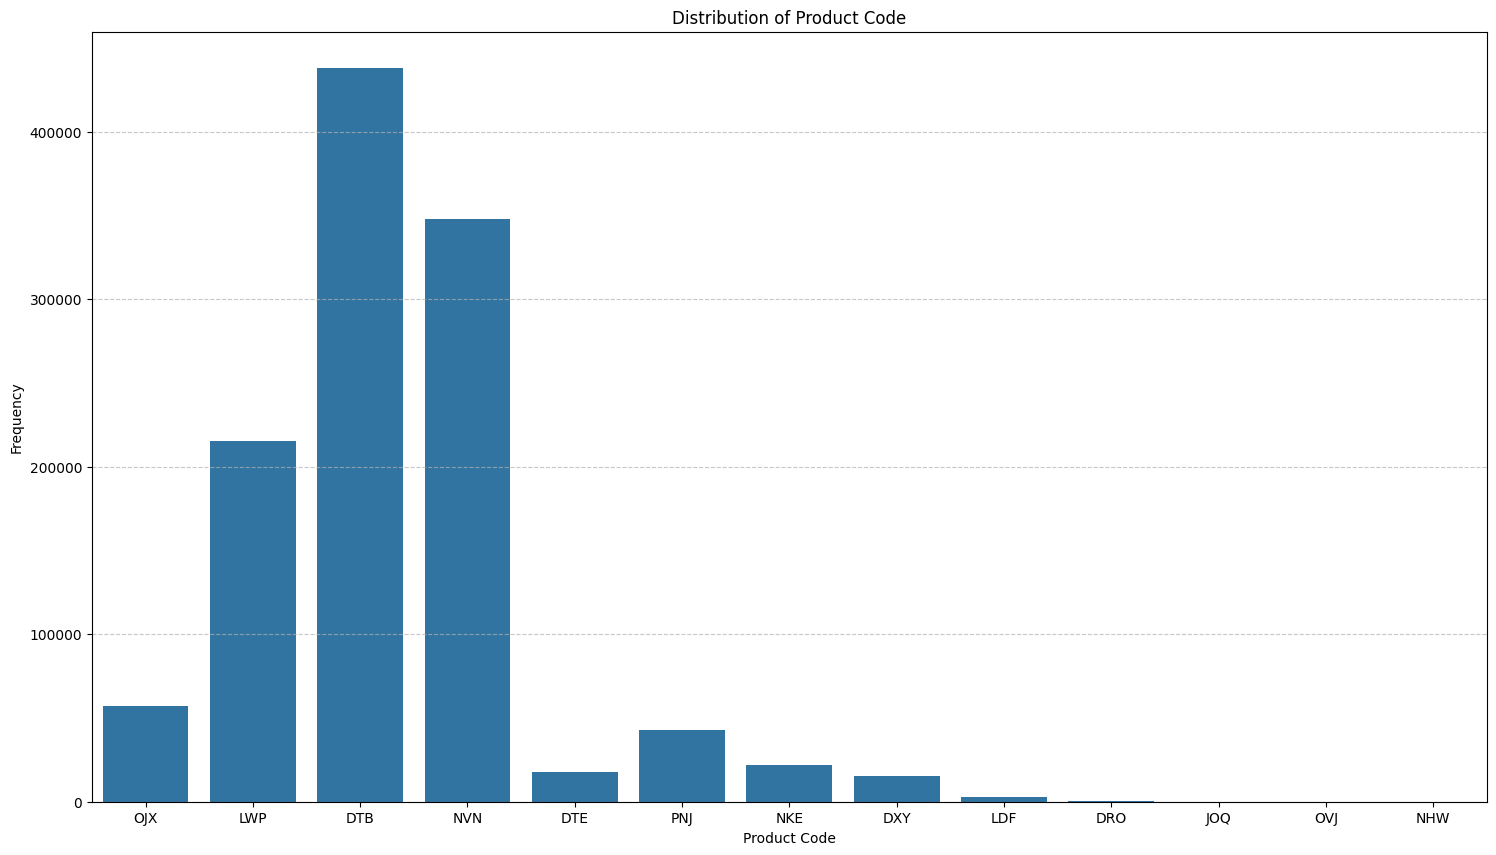

In [114]:
# PRODUCT_CODE
print(df["DEVICE_REPORT_PRODUCT_CODE"].describe())

# Plotting distribution of product code
plt.figure(figsize=(18, 10))
sns.countplot(x=df["DEVICE_REPORT_PRODUCT_CODE"])
plt.title("Distribution of Product Code")
plt.xlabel("Product Code")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### UDI-DI and UDI-PUBLIC
*Definitions*:
- DI: The Device Identifier (DI) portion of the medical device's full Unique Device Identifier (UDI) (see FDA's UDI webpage for more information).
- PUBLIC: Full UDI value with non-releasable Product Identifier (PI) values (such as serial numbers) redacted.

The two rows carry out the same type of information in different format.

In [115]:
# UDI-DI
print(df["UDI-DI"].info(),"\n")
print(df[df["UDI-DI"].notna()][["UDI-DI"]].head(3),"\n")

# UDI-PUBLIC
print(df["UDI-DI"].info(),"\n")
print(df[df["UDI-PUBLIC"].notna()][["UDI-PUBLIC"]].head(3))

<class 'pandas.core.series.Series'>
Index: 1160510 entries, 0 to 1209610
Series name: UDI-DI
Non-Null Count   Dtype 
--------------   ----- 
815396 non-null  object
dtypes: object(1)
memory usage: 17.7+ MB
None 

             UDI-DI
0   5414734510189.0
1   5414734510189.0
10  5414734501705.0 

<class 'pandas.core.series.Series'>
Index: 1160510 entries, 0 to 1209610
Series name: UDI-DI
Non-Null Count   Dtype 
--------------   ----- 
815396 non-null  object
dtypes: object(1)
memory usage: 17.7+ MB
None 

        UDI-PUBLIC
0   05414734510189
1   05414734510189
10  05414734501705


In [116]:
if (df["UDI-DI"].isna() == df["UDI-PUBLIC"].isna()).all(): # are they present in the same rows?
    print("The NaN values are present in the same rows for both columns.")

The NaN values are present in the same rows for both columns.


## PROBLEM CODE

In [117]:
df['PROBLEM_CODE'].info()

<class 'pandas.core.series.Series'>
Index: 1160510 entries, 0 to 1209610
Series name: PROBLEM_CODE
Non-Null Count    Dtype  
--------------    -----  
1159354 non-null  float64
dtypes: float64(1)
memory usage: 17.7 MB


In [118]:
pc.columns

Index(['PROBLEM_CODE', 'DESCRIPTION'], dtype='object')

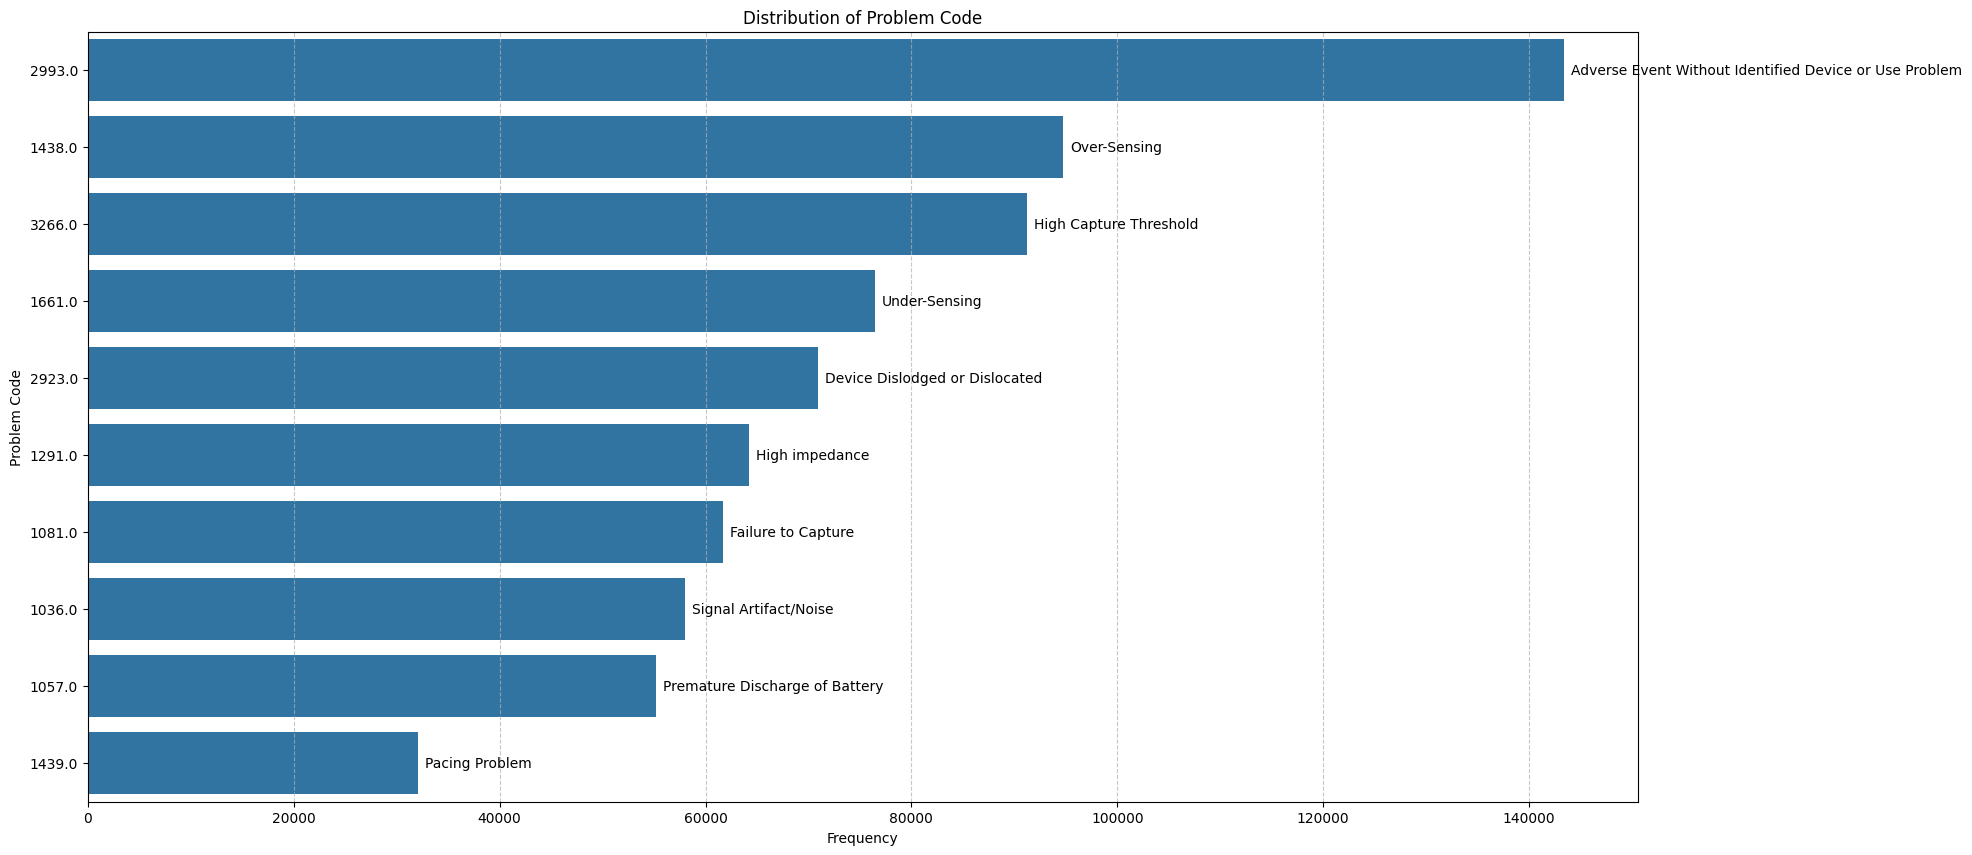

In [119]:
# Get the top 10 problem codes
top10 = df["PROBLEM_CODE"].value_counts().head(10)

plt.figure(figsize=(20, 10))

# Create a countplot for the top 10 problem codes
ax = sns.countplot(y=df["PROBLEM_CODE"], order=top10.index)

# Add plot title and labels
plt.title("Distribution of Problem Code")
plt.xlabel("Frequency")
plt.ylabel("Problem Code")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Assuming pc is a DataFrame containing PROBLEM_CODE and DESCRIPTION
# Add descriptions to the bars
for i, p in enumerate(ax.patches):
    # Get the corresponding problem code from top10.index
    problem_code = top10.index[i]
    
    # Fetch the corresponding description
    description = pc[pc["PROBLEM_CODE"] == problem_code]["DESCRIPTION"].values[0]
    
    # Annotate the description on the bar
    ax.annotate(description, (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.show()

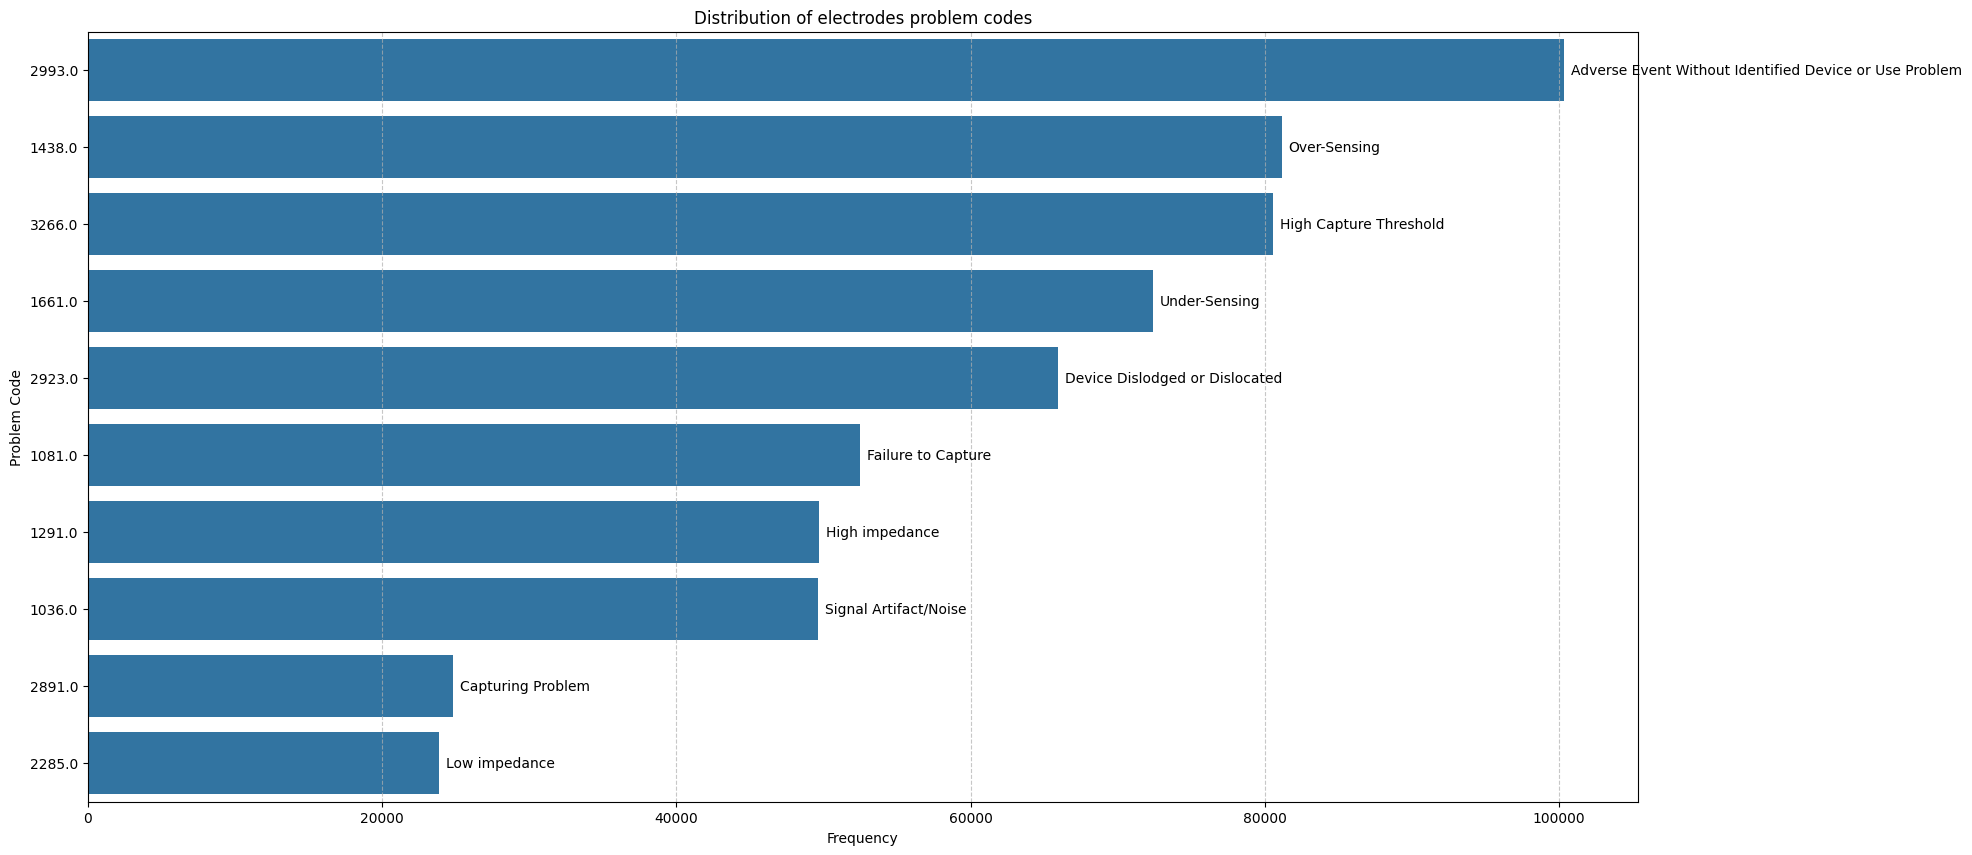

In [120]:
# Get the top 10 problem codes for electrodes
top10_ele = df[df['DEVICE_REPORT_PRODUCT_CODE'].isin(codes_electrodes)]["PROBLEM_CODE"].value_counts().head(10)

plt.figure(figsize=(20, 10))

# Create a countplot for the top 10 problem codes
ax = sns.countplot(y=df[df['DEVICE_REPORT_PRODUCT_CODE'].isin(codes_electrodes)]["PROBLEM_CODE"], order=top10_ele.index)

# Add plot title and labels
plt.title("Distribution of electrodes problem codes")
plt.xlabel("Frequency")
plt.ylabel("Problem Code")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Assuming pc is a DataFrame containing PROBLEM_CODE and DESCRIPTION
# Add descriptions to the bars
for i, p in enumerate(ax.patches):
    # Get the corresponding problem code from top10.index
    problem_code = top10_ele.index[i]
    
    # Fetch the corresponding description
    description = pc[pc["PROBLEM_CODE"] == problem_code]["DESCRIPTION"].values[0]
    
    # Annotate the description on the bar
    ax.annotate(description, (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.show()

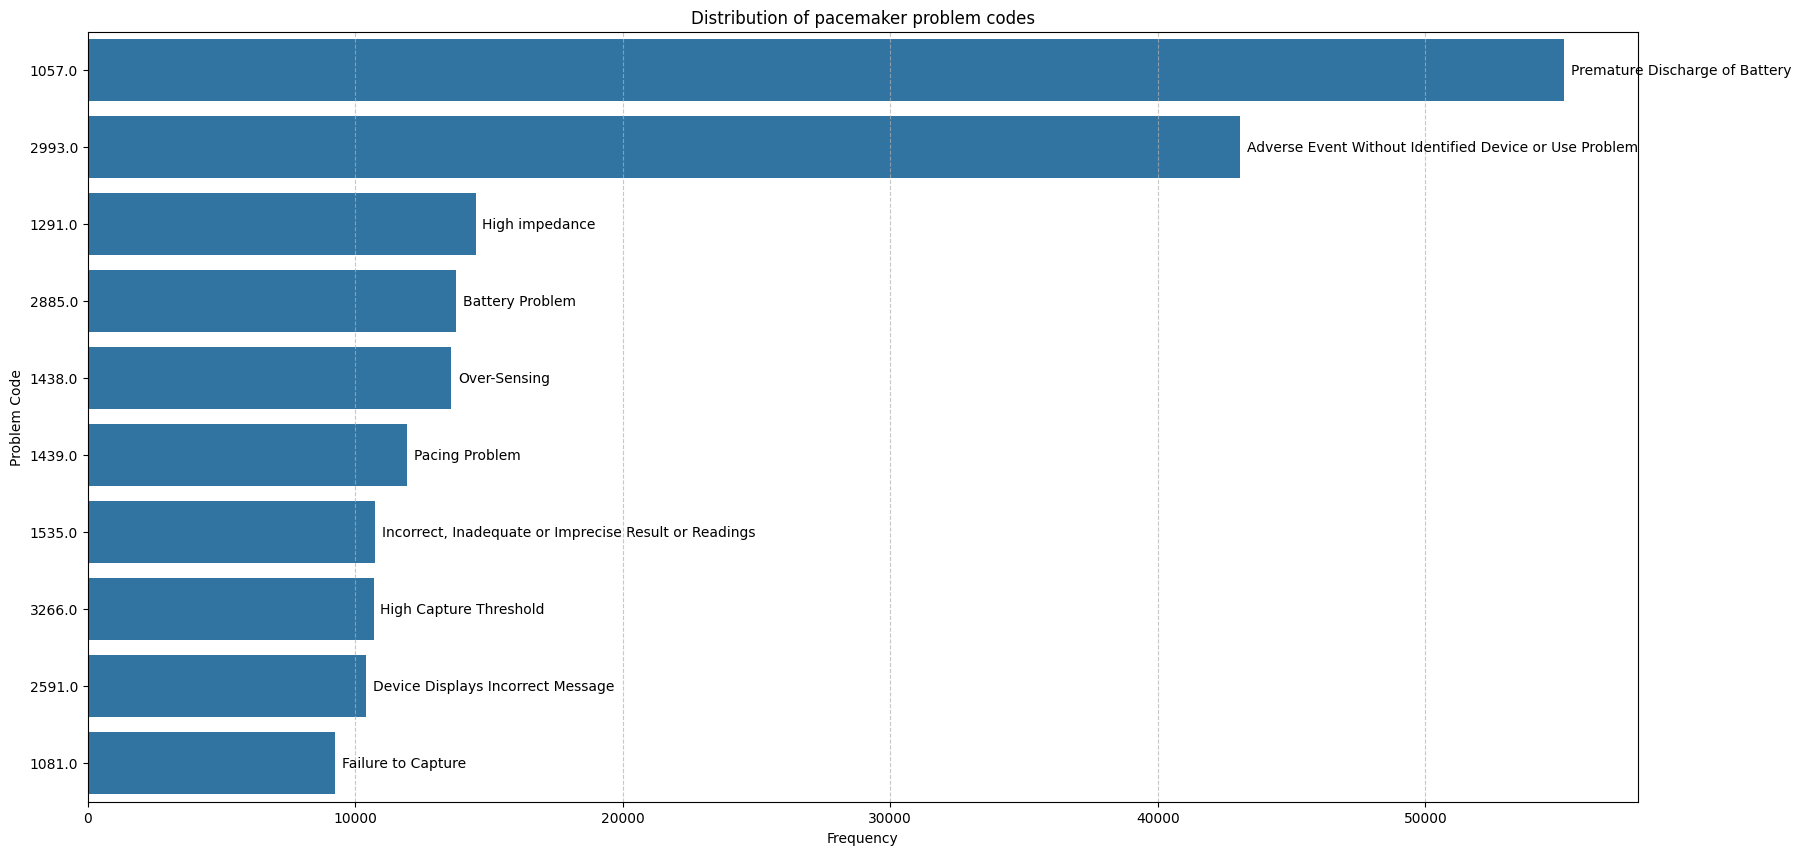

In [121]:
# Get the top 10 problem codes
top10_pac = df[df['DEVICE_REPORT_PRODUCT_CODE'].isin(codes_pacemakers)]["PROBLEM_CODE"].value_counts().head(10)

plt.figure(figsize=(20, 10))

# Create a countplot for the top 10 problem codes
ax = sns.countplot(y=df[df['DEVICE_REPORT_PRODUCT_CODE'].isin(codes_pacemakers)]["PROBLEM_CODE"], order=top10_pac.index)

# Add plot title and labels
plt.title("Distribution of pacemaker problem codes")
plt.xlabel("Frequency")
plt.ylabel("Problem Code")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Assuming pc is a DataFrame containing PROBLEM_CODE and DESCRIPTION
# Add descriptions to the bars
for i, p in enumerate(ax.patches):
    # Get the corresponding problem code from top10.index
    problem_code = top10_pac.index[i]
    
    # Fetch the corresponding description
    description = pc[pc["PROBLEM_CODE"] == problem_code]["DESCRIPTION"].values[0]
    
    # Annotate the description on the bar
    ax.annotate(description, (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.show()

## IMDRF

In [122]:
df['IMDRF'].info()

<class 'pandas.core.series.Series'>
Index: 1160510 entries, 0 to 1209610
Series name: IMDRF
Non-Null Count    Dtype 
--------------    ----- 
1159353 non-null  object
dtypes: object(1)
memory usage: 17.7+ MB


In [123]:
# Creating the first hierarchical level of IMDRF
def first_category(x):
    if pd.isna(x):
        return None
    else: 
        for category in [f'A{str(i).zfill(2)}' for i in range(1, 28)]:
            if x.startswith(category):
                return category

df['Cat1IMDRF'] = df['IMDRF'].apply(first_category)
print(df['Cat1IMDRF'].value_counts())

Cat1IMDRF
A07    656171
A24    143401
A05     92000
A09     90582
A04     63601
A15     37523
A02     16259
A27     11060
A12     10048
A23      8497
A26      5815
A13      4804
A25      3756
A19      3268
A16      3185
A01      2059
A11      1905
A18      1596
A08      1520
A17       832
A22       495
A14       411
A21       315
A03       217
A20        16
A10        15
A06         2
Name: count, dtype: int64


C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\1458800304.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cat1IMDRF'] = df['IMDRF'].apply(first_category)


In [124]:
def extract_categories(code):
    if isinstance(code, str) and len(code) >= 4:
        second_category = code[0:5]  # Characters at index 2 and 3 for second category
        return second_category
    else:
        return None

# Apply the function to the DataFrame
df['Cat2IMDRF'] = df['IMDRF'].apply(extract_categories)
df['Cat2IMDRF'].value_counts()

C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\3742256904.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cat2IMDRF'] = df['IMDRF'].apply(extract_categories)


Cat2IMDRF
A0709    209553
A0701    197087
A0722    114757
A0908     71571
A0512     70951
          ...  
A1412         1
A1403         1
A2102         1
A1602         1
A0103         1
Name: count, Length: 127, dtype: int64

In [125]:
imdrf_dict = df_imdrf.set_index('IMDRF Code')['Definition'].to_dict()

In [126]:
imdrf_with_desc = pd.DataFrame(df['Cat1IMDRF'].value_counts()).reset_index()
imdrf_with_desc['Description'] = imdrf_with_desc['Cat1IMDRF'].map(imdrf_dict)

imdrf_with_desc

Cat1IMDRF   count                                        Description
0        A07  656171  Problem associated with the function of the el...
1        A24  143401  An adverse event (e.g. patient harm) appears t...
2        A05   92000  Problems associated with mechanical actions or...
3        A09   90582  Problem associated with any deviation from the...
4        A04   63601  Problem associated with any deviations from th...
5        A15   37523  Problem associated with any deviations from th...
6        A02   16259  Problem associated with any deviations from th...
7        A27   11060  The device problem is not adequately described...
8        A12   10048  Problem associated with linking of the device ...
9        A23    8497  Problem associated with failure to process, se...
10       A26    5815  An adverse event appears to have occurred but ...
11       A13    4804  Problem associated with the device sending or ...
12       A25    3756  A report has been received but the description...
13       A19    3268  Problem associated with the surrounding condit...
14       A16    3185  Problem associated with any deviations from th...
15       A01    2059  Problem related to the interaction between the...
16       A11    1905  Problem associated with written programs, code...
17       A18    1596  Problem associated with the presence of any un...
18       A08    1520  Problem associated with the operation of the d...
19       A17     832  Problem associated with compatibility between ...
20       A22     495  Problem associated with an act or omission of ...
21       A14     411  Problem associated with the device failing to ...
22       A21     315  Problem associated with device markings/labell...
23       A03     217  Problem associated with any from the documente...
24       A20      16  Problem associated with unsatisfactory install...
25       A10      15  Problem associated with the device producing u...
26       A06       2  Problem associated with transmission of visibl...

In [127]:
imdrf_with_desc = pd.DataFrame(df['Cat2IMDRF'].value_counts()).reset_index()
imdrf_with_desc['Description'] = imdrf_with_desc['Cat2IMDRF'].map(imdrf_dict)

imdrf_with_desc

Cat2IMDRF   count                                        Description
0       A0709  209553  Problem associated with the device feature tha...
1       A0701  197087  Problem associated with the inability of the d...
2       A0722  114757  Problem associated with electrical impedance l...
3       A0908   71571  Problem associated with a nonconforming end re...
4       A0512   70951  Problem associated with an undesired movement ...
..        ...     ...                                                ...
122     A1412       1  Problem associated with pump performance devia...
123     A1403       1  Problem associated with the method or amount o...
124     A2102       1  Problem associated with user facility not rece...
125     A1602       1  Problem associated with the feature that preve...
126     A0103       1  Problem associated with the loss of direct anc...

[127 rows x 3 columns]

In [128]:
group = df.groupby(['Cat1IMDRF', 'Cat2IMDRF', 'IMDRF']).size().unstack(fill_value=0)
group

IMDRF                A0101  A010101  A010103  A0103  A0104  A010401  A010402  \
Cat1IMDRF Cat2IMDRF                                                            
A01       A0101        652       19       19      0      0        0        0   
          A0103          0        0        0      1      0        0        0   
          A0104          0        0        0      0    370       15      895   
A02       A0201          0        0        0      0      0        0        0   
          A0202          0        0        0      0      0        0        0   
...                    ...      ...      ...    ...    ...      ...      ...   
A23       A2301          0        0        0      0      0        0        0   
          A2302          0        0        0      0      0        0        0   
          A2303          0        0        0      0      0        0        0   
          A2304          0        0        0      0      0        0        0   
          A2305          0        0        0      0      0        0        0   

IMDRF                A0201  A020102  A0202  ...  A2105  A2201  A2202  A2204  \
Cat1IMDRF Cat2IMDRF                         ...                               
A01       A0101          0        0      0  ...      0      0      0      0   
          A0103          0        0      0  ...      0      0      0      0   
          A0104          0        0      0  ...      0      0      0      0   
A02       A0201        286       85      0  ...      0      0      0      0   
          A0202          0        0    183  ...      0      0      0      0   
...                    ...      ...    ...  ...    ...    ...    ...    ...   
A23       A2301          0        0      0  ...      0      0      0      0   
          A2302          0        0      0  ...      0      0      0      0   
          A2303          0        0      0  ...      0      0      0      0   
          A2304          0        0      0  ...      0      0      0      0   
          A2305          0        0      0  ...      0      0      0      0   

IMDRF                A2301  A2302  A2303  A2304  A2305  A230501  
Cat1IMDRF Cat2IMDRF                                              
A01       A0101          0      0      0      0      0        0  
          A0103          0      0      0      0      0        0  
          A0104          0      0      0      0      0        0  
A02       A0201          0      0      0      0      0        0  
          A0202          0      0      0      0      0        0  
...                    ...    ...    ...    ...    ...      ...  
A23       A2301        267      0      0      0      0        0  
          A2302          0     16      0      0      0        0  
          A2303          0      0    181      0      0        0  
          A2304          0      0      0   1686      0        0  
          A2305          0      0      0      0     70        9  

[127 rows x 285 columns]

In [129]:
import plotly.express as px

# Sunburst plot for IMDRF categories
#fig = px.sunburst(group.reset_index(), path=['Cat1IMDRF', 'Cat2IMDRF', 'IMDRF'], values='A01')
#fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
#fig.show()

## TEXT

### MDR_TEXT_KEY
*Definition*: Unique key for the first narrative entered for this report, assigned by MAUDE.

In [130]:
print(df["MDR_TEXT_KEY"].info())
print(df["MDR_TEXT_KEY"].head(2))

<class 'pandas.core.series.Series'>
Index: 1160510 entries, 0 to 1209610
Series name: MDR_TEXT_KEY
Non-Null Count    Dtype  
--------------    -----  
1160490 non-null  float64
dtypes: float64(1)
memory usage: 17.7 MB
None
0    131761076.0
1    131761077.0
Name: MDR_TEXT_KEY, dtype: float64


It appears to be a 9-digit code, assigned uniquely to different text instances.

In [131]:
# Check if every MDR_REPORT_KEY has at least one MDR_TEXT_KEY

grouped_data = df.groupby('MDR_REPORT_KEY')['MDR_TEXT_KEY'].count()
print("Number of MDR_REPORT_KEY with no MDR_TEXT_KEY:", (grouped_data == 0).sum())

# print the MDR_REPORT_KEY with no MDR_TEXT_KEY
print("\n")
print(grouped_data[grouped_data == 0].index)
print(df[df["MDR_REPORT_KEY"].isin(grouped_data[grouped_data == 0].index)][["MDR_REPORT_KEY","REPORT_NUMBER","DATE_OF_EVENT","REPORT_SOURCE_CODE","MANUFACTURER_G1_NAME","PROBLEM_CODE", "FOI_TEXT"]])

Number of MDR_REPORT_KEY with no MDR_TEXT_KEY: 14


Index([12715198, 12715632, 12715690, 12715914, 12716787, 12719259, 12719261,
       12719441, 12720676, 12720696, 17087814, 17262970, 17521400, 17534978],
      dtype='int64', name='MDR_REPORT_KEY')
         MDR_REPORT_KEY       REPORT_NUMBER DATE_OF_EVENT REPORT_SOURCE_CODE  \
642575         12715198  2017865-2021-35396    2018-02-08                  M   
642627         12715632  2124215-2021-23486    2021-08-03                  M   
642671         12715690  2124215-2021-24257    2021-08-03                  M   
642672         12715690  2124215-2021-24257    2021-08-03                  M   
642673         12715690  2124215-2021-24257    2021-08-03                  M   
642674         12715690  2124215-2021-24257    2021-08-03                  M   
642702         12715914  2649622-2021-21553    2021-05-19                  M   
643024         12716787  2124215-2021-33125    2021-09-27                  M   
643406         12719259  2649

14 rows don't have the mdr text key and neither a valid textual description in the column FOI_TEXT, they will be excluded for the further processings.

### TEXT_TYPE_CODE
*Definition*: 
- D corresponds to **Event Description**: **Description of reported event in narrative form**. This information is redacted in accordance with 21 CFR 803.9. Any additional information provided in follow-up reports is added to previously provided manufacturer narratives.
- N corresponds to **Manufacturer Narrative**: For manufacturer reports. Manufacturers enter **any additional information, evaluation, or clarification** of data presented in previous sections, in **narrative form**. This information is redacted in accordance with 21 CFR 803.9. Any additional information provided in follow-up reports is added to previously provided manufacturer narratives.

TEXT_TYPE_CODE
D    584285
N    576205
Name: count, dtype: int64


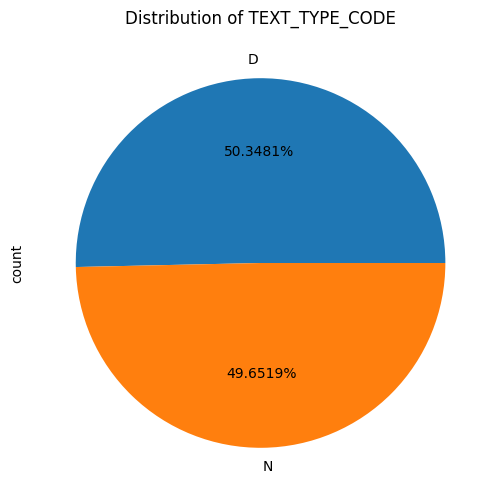

In [132]:
# TEXT_TYPE_CODE
print(df["TEXT_TYPE_CODE"].value_counts())

# plotting the pie chart for the percentual distribution of the TEXT_TYPE_CODE
plt.figure(figsize=(6, 6))
df["TEXT_TYPE_CODE"].value_counts().plot(kind='pie', autopct='%1.4f%%') # very close to half and half
plt.title("Distribution of TEXT_TYPE_CODE")
plt.show()

In [133]:
# What is the most present TEXT_TYPE_CODE for those reports with a single MDR REPORT KEY occurrence (therefore a single text type code)?
single_text = df["MDR_REPORT_KEY"].value_counts().loc[lambda x: x == 1].index
single_text_df = df[df["MDR_REPORT_KEY"].isin(single_text)]

print(single_text_df["TEXT_TYPE_CODE"].value_counts())

TEXT_TYPE_CODE
D    24454
N        8
Name: count, dtype: int64


In [134]:
print(df[df['TEXT_TYPE_CODE']=='N']['FOI_TEXT'].iloc[0])
print(df[df['TEXT_TYPE_CODE']=='D']['FOI_TEXT'].iloc[1])

THE RESULTS OF THE INVESTIGATION ARE INCONCLUSIVE SINCE THE DEVICE WAS NOT RETURNED FOR ANALYSIS. BASED ON THE INFORMATION RECEIVED, THE CAUSE OF THE REPORTED INCIDENT COULD NOT BE CONCLUSIVELY DETERMINED.
IT WAS REPORTED THAT DURING FOLLOW-UP VISIT, DEVICE WAS FOUND TO BE IN BACKUP VVI MODE. DEVICE DOWNLOAD WAS PERFORMED SUCCESSFULLY. PATIENT WAS STABLE THROUGHOUT THE EVENT.


As we can see the 'M' text type code should give additional information that often don't help our analysis. For this reason we will only keep into account the Event Description.

### FOI_TEXT

In [135]:
print(df["FOI_TEXT"].describe())

# how many MDR_REPORT_KEY don't have a FOI_TEXT
grouped_data = df.groupby('MDR_REPORT_KEY')['FOI_TEXT'].count()
print("Number of MDR_REPORT_KEY with no FOI_TEXT:", (grouped_data == 0).sum()) # the same that don't have no text key.

count                                               1160490
unique                                               368158
top       IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...
freq                                                 116680
Name: FOI_TEXT, dtype: object
Number of MDR_REPORT_KEY with no FOI_TEXT: 14


In [136]:
# Checking for other null values in foi text
print(df[(df["FOI_TEXT"].isna()) | (df["FOI_TEXT"] == '')])

         MDR_REPORT_KEY       REPORT_NUMBER REPORT_SOURCE_CODE DATE_RECEIVED  \
642575         12715198  2017865-2021-35396                  M    2021-10-28   
642627         12715632  2124215-2021-23486                  M    2021-10-28   
642671         12715690  2124215-2021-24257                  M    2021-10-28   
642672         12715690  2124215-2021-24257                  M    2021-10-28   
642673         12715690  2124215-2021-24257                  M    2021-10-28   
642674         12715690  2124215-2021-24257                  M    2021-10-28   
642702         12715914  2649622-2021-21553                  M    2021-10-28   
643024         12716787  2124215-2021-33125                  M    2021-10-28   
643406         12719259  2649622-2021-21593                  M    2021-10-29   
643407         12719259  2649622-2021-21593                  M    2021-10-29   
643408         12719261  2649622-2021-21594                  M    2021-10-29   
643429         12719441  2649622-2021-21

In [137]:
pattern = r"[a-zA-Z]"
non_character_count = df[~df["FOI_TEXT"].str.contains(pattern, na=False)][['FOI_TEXT']]
non_character_count

FOI_TEXT
44880                     .
155644                    .
234284                    .
234285                    .
234286                    .
241970                    .
270066                    .
270067                    .
272655                    .
303678                    .
434521                    .
574811                    .
574812                    .
603849                    .
642575                  NaN
642627                  NaN
642671                  NaN
642672                  NaN
642673                  NaN
642674                  NaN
642702                  NaN
643024                  NaN
643406                  NaN
643407                  NaN
643408                  NaN
643429                  NaN
643525                  NaN
643526                  NaN
918375                    .
918376                    .
918377                    .
1033794                 NaN
1033795                 NaN
1053954                 NaN
1090515                 NaN
1098741                 NaN
1098742                 NaN
1146747  2124215-2023-56410
1146748  2124215-2023-56410
1146749  2124215-2023-56410
1146750  2124215-2023-56410

In [138]:
df["FOI_TEXT"].value_counts().head(5)

FOI_TEXT
IF INFORMATION IS PROVIDED IN THE FUTURE, A SUPPLEMENTAL REPORT WILL BE ISSUED.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [139]:
# are the top values different when sorted by TEXT_TYPE_CODE?
print(df[df['TEXT_TYPE_CODE']=='D']['FOI_TEXT'].value_counts().head(5),"\n")
print(df[df['TEXT_TYPE_CODE']=='N']['FOI_TEXT'].value_counts().head(5))


FOI_TEXT
IT WAS REPORTED THAT THE DEVICE WAS PROPHYLACTICALLY EXPLANTED AND REPLACED AS IT IS SUBJECT TO THE ZENEX, ASSURITY, ENDURITY LASER ADHESION PREPARATION FIELD SAFETY CORRECTION ACTION WHICH APPLIES TO A SUBSET OF DEVICES DISTRIBUTED AND IMPLANTED OUTSIDE OF THE UNITED STATES. NO MALFUNCTION WAS REPORTED, AND THE PATIENT IS IN STABLE CONDITION WITH NO ADVERSE CONSEQUENCES.    2478
THIS REPORT IS TO ADVISE OF AN EVENT OBSERVED DURING ANALYSIS.                                                                                                                                                                                                                                                                                                                            1740
IT WAS REPORTED THAT THIS RIGHT ATRIAL (RA) LEAD WAS PART OF A SYSTEM REVISION DUE TO INFECTION. THERE WERE NO ADDITIONAL ADVERSE PATIENT EFFECTS REPORTED. THE RA LEAD WAS EXPLANTED.                                           

As we can see also here, the information given in the Manufacturer Narrative are often not helpful in understanding the cause of the report.

### Counts
- Character count
- Word count
- Sentence count
- Mean word length
- Mean sentence length

In [140]:
from nltk.tokenize import sent_tokenize
import nltk

def word_count(text):
    if pd.notna(text):
        word_list = text.split()
        return len(word_list)
    else:
        return 0
    
def count_sentences_nltk(text):
    if pd.notna(text) and text.strip():
        return len(sent_tokenize(text))
    return 0

df['CharCount'] = df['FOI_TEXT'].str.len()
df['WordCount'] = df['FOI_TEXT'].apply(word_count)
df['SentCount'] = df['FOI_TEXT'].apply(count_sentences_nltk)
df.loc[:,['MDR_REPORT_KEY', 'MDR_TEXT_KEY', 'TEXT_TYPE_CODE', 'FOI_TEXT', 'PROBLEM_CODE', 'CharCount', 'WordCount', 'SentCount']].head(10)

C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\349821108.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CharCount'] = df['FOI_TEXT'].str.len()
C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\349821108.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WordCount'] = df['FOI_TEXT'].apply(word_count)
C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\349821108.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

MDR_REPORT_KEY  MDR_TEXT_KEY TEXT_TYPE_CODE  \
0         8207387   131761076.0              N   
1         8207387   131761077.0              D   
2         8207389   131764902.0              N   
3         8207389   131764903.0              D   
4         8207394   131761102.0              N   
5         8207394   131761102.0              N   
6         8207394   131761103.0              D   
7         8207394   131761103.0              D   
8         8207394   133554090.0              D   
9         8207394   133554090.0              D   

                                            FOI_TEXT  PROBLEM_CODE  CharCount  \
0  THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...        2923.0      205.0   
1  IT WAS REPORTED THAT THE LEAD WAS IMPLANTED IN...        2923.0      211.0   
2  THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...        1440.0      205.0   
3  IT WAS REPORTED THAT DURING FOLLOW-UP VISIT, D...        1440.0      172.0   
4  THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...        1559.0      275.0   
5  THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...        3266.0      275.0   
6  IT WAS REPORTED THAT THE LEAD CAPTURE THRESHOL...        1559.0      260.0   
7  IT WAS REPORTED THAT THE LEAD CAPTURE THRESHOL...        3266.0      260.0   
8  NEW INFORMATION RECEIVED NOTES THAT LOSS OF SE...        1559.0       79.0   
9  NEW INFORMATION RECEIVED NOTES THAT LOSS OF SE...        3266.0       79.0   

   WordCount  SentCount  
0         31          2  
1         32          4  
2         31          2  
3         27          3  
4         42          3  
5         42          3  
6         42          5  
7         42          5  
8         14          1  
9         14          1

In [141]:
# Computing mean word length and mean sentence length
df['MeanWordLen'] = df['CharCount']/df['WordCount']
df['MeanSentLen'] = df['WordCount']/df['SentCount']
df.loc[:,['MDR_REPORT_KEY', 'MDR_TEXT_KEY', 'TEXT_TYPE_CODE', 'FOI_TEXT', 'PROBLEM_CODE', 'CharCount', 'WordCount', 'MeanWordLen', 'SentCount', 'MeanSentLen']].head(10)

C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\3545913108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MeanWordLen'] = df['CharCount']/df['WordCount']
C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\3545913108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MeanSentLen'] = df['WordCount']/df['SentCount']


MDR_REPORT_KEY  MDR_TEXT_KEY TEXT_TYPE_CODE  \
0         8207387   131761076.0              N   
1         8207387   131761077.0              D   
2         8207389   131764902.0              N   
3         8207389   131764903.0              D   
4         8207394   131761102.0              N   
5         8207394   131761102.0              N   
6         8207394   131761103.0              D   
7         8207394   131761103.0              D   
8         8207394   133554090.0              D   
9         8207394   133554090.0              D   

                                            FOI_TEXT  PROBLEM_CODE  CharCount  \
0  THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...        2923.0      205.0   
1  IT WAS REPORTED THAT THE LEAD WAS IMPLANTED IN...        2923.0      211.0   
2  THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...        1440.0      205.0   
3  IT WAS REPORTED THAT DURING FOLLOW-UP VISIT, D...        1440.0      172.0   
4  THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...        1559.0      275.0   
5  THE RESULTS OF THE INVESTIGATION ARE INCONCLUS...        3266.0      275.0   
6  IT WAS REPORTED THAT THE LEAD CAPTURE THRESHOL...        1559.0      260.0   
7  IT WAS REPORTED THAT THE LEAD CAPTURE THRESHOL...        3266.0      260.0   
8  NEW INFORMATION RECEIVED NOTES THAT LOSS OF SE...        1559.0       79.0   
9  NEW INFORMATION RECEIVED NOTES THAT LOSS OF SE...        3266.0       79.0   

   WordCount  MeanWordLen  SentCount  MeanSentLen  
0         31     6.612903          2         15.5  
1         32     6.593750          4          8.0  
2         31     6.612903          2         15.5  
3         27     6.370370          3          9.0  
4         42     6.547619          3         14.0  
5         42     6.547619          3         14.0  
6         42     6.190476          5          8.4  
7         42     6.190476          5          8.4  
8         14     5.642857          1         14.0  
9         14     5.642857          1         14.0

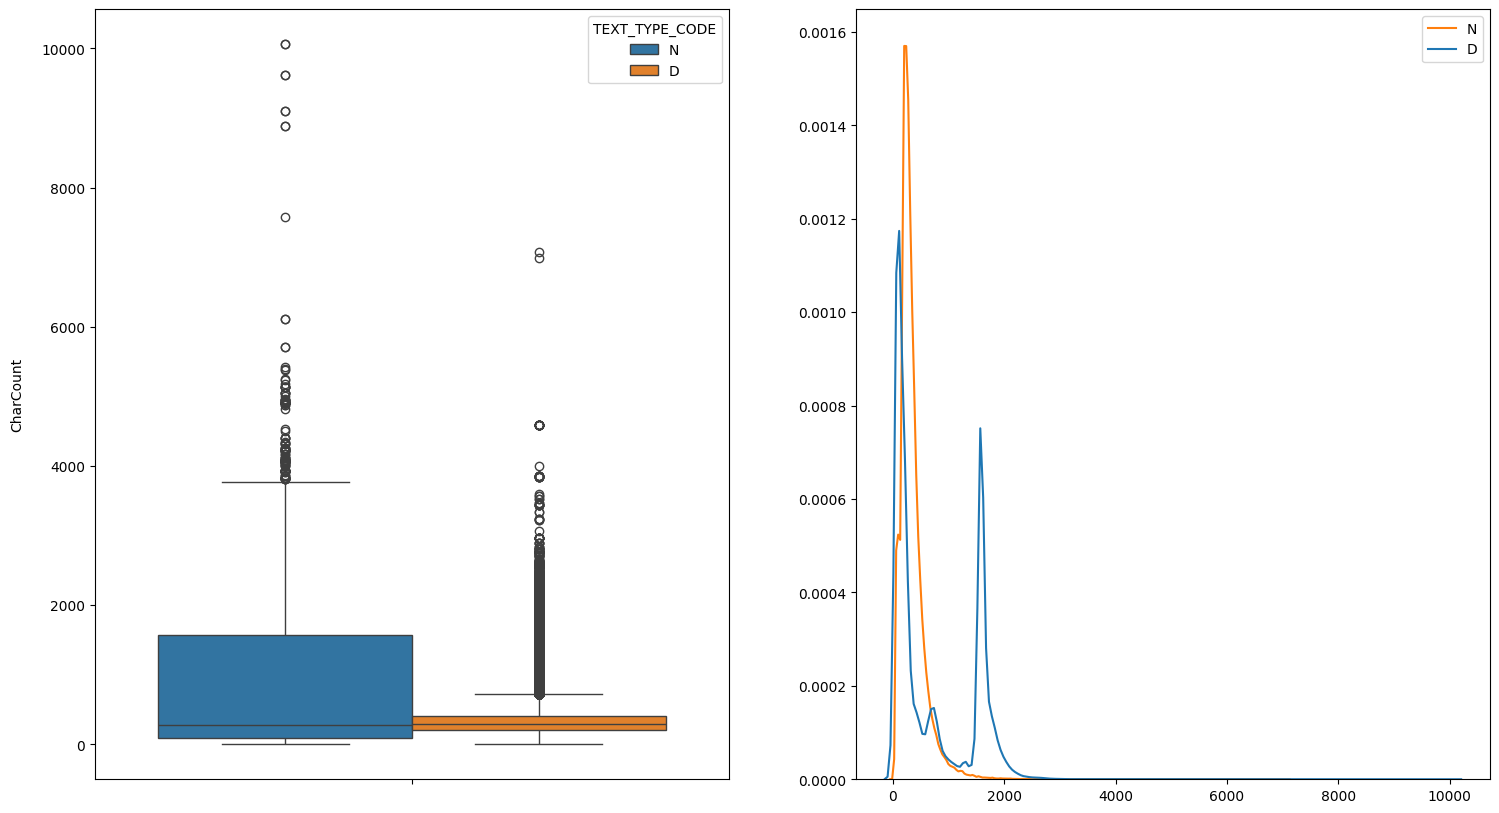

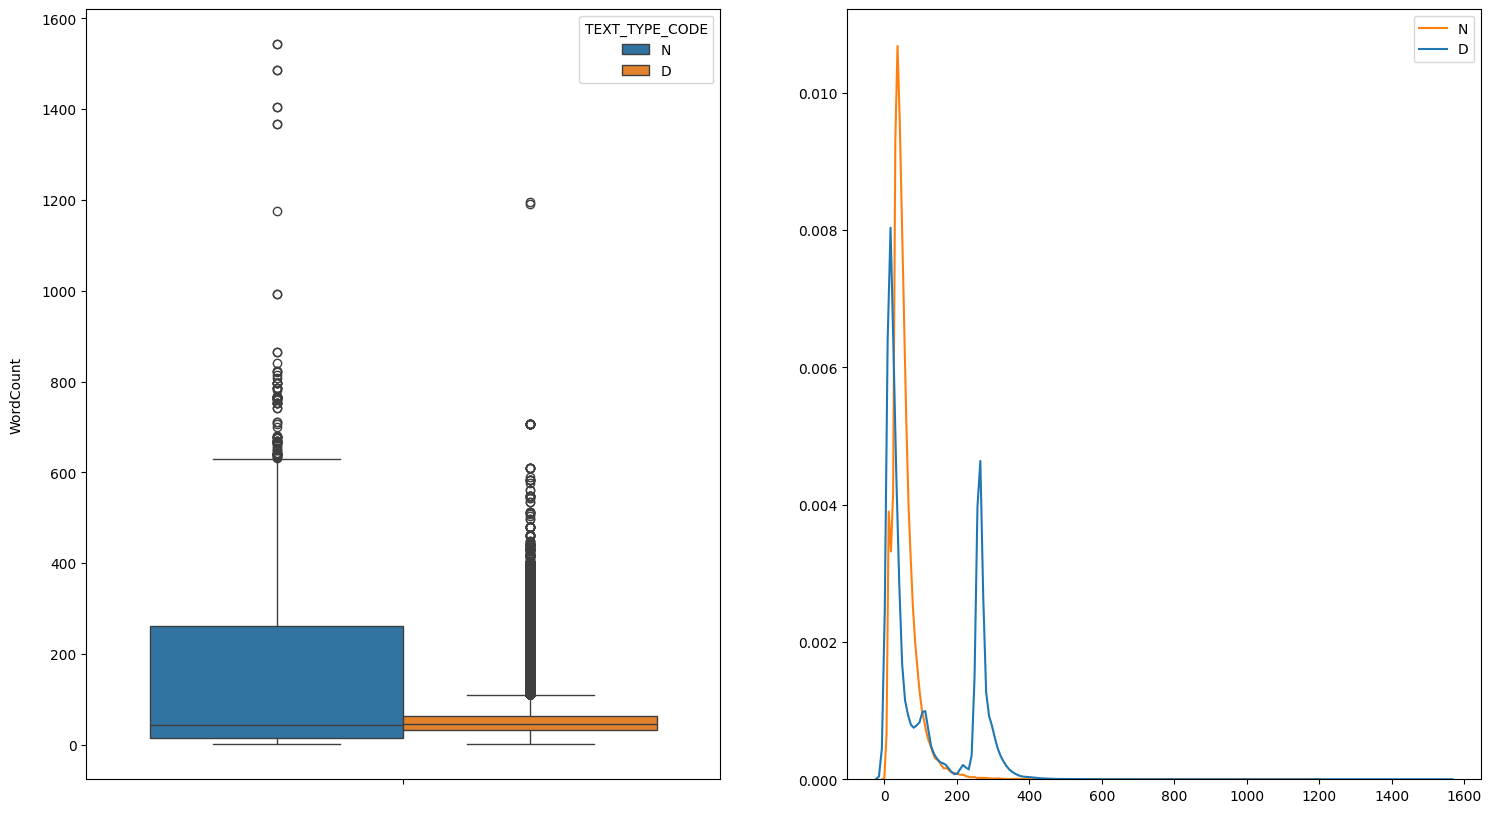

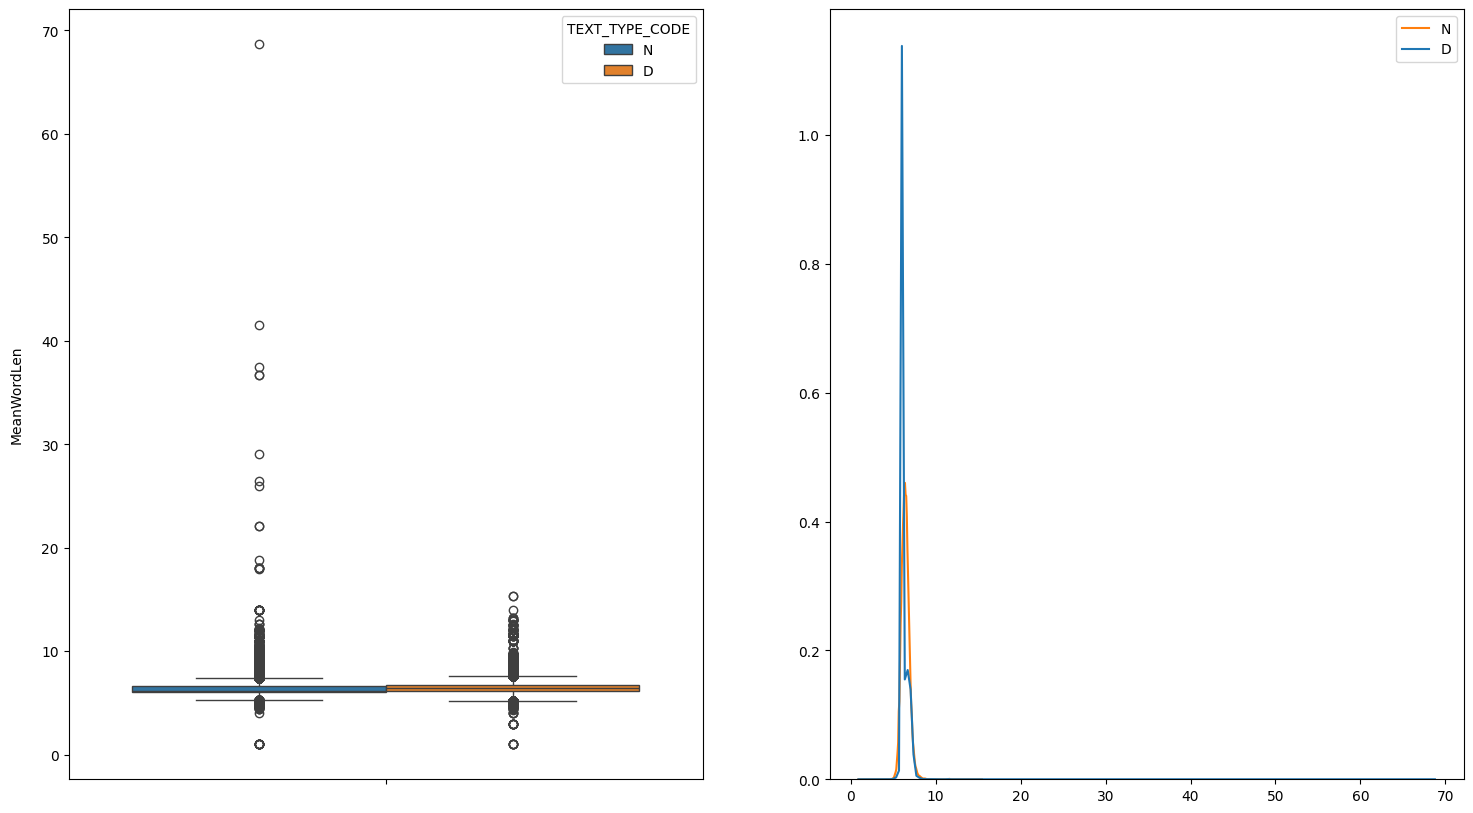

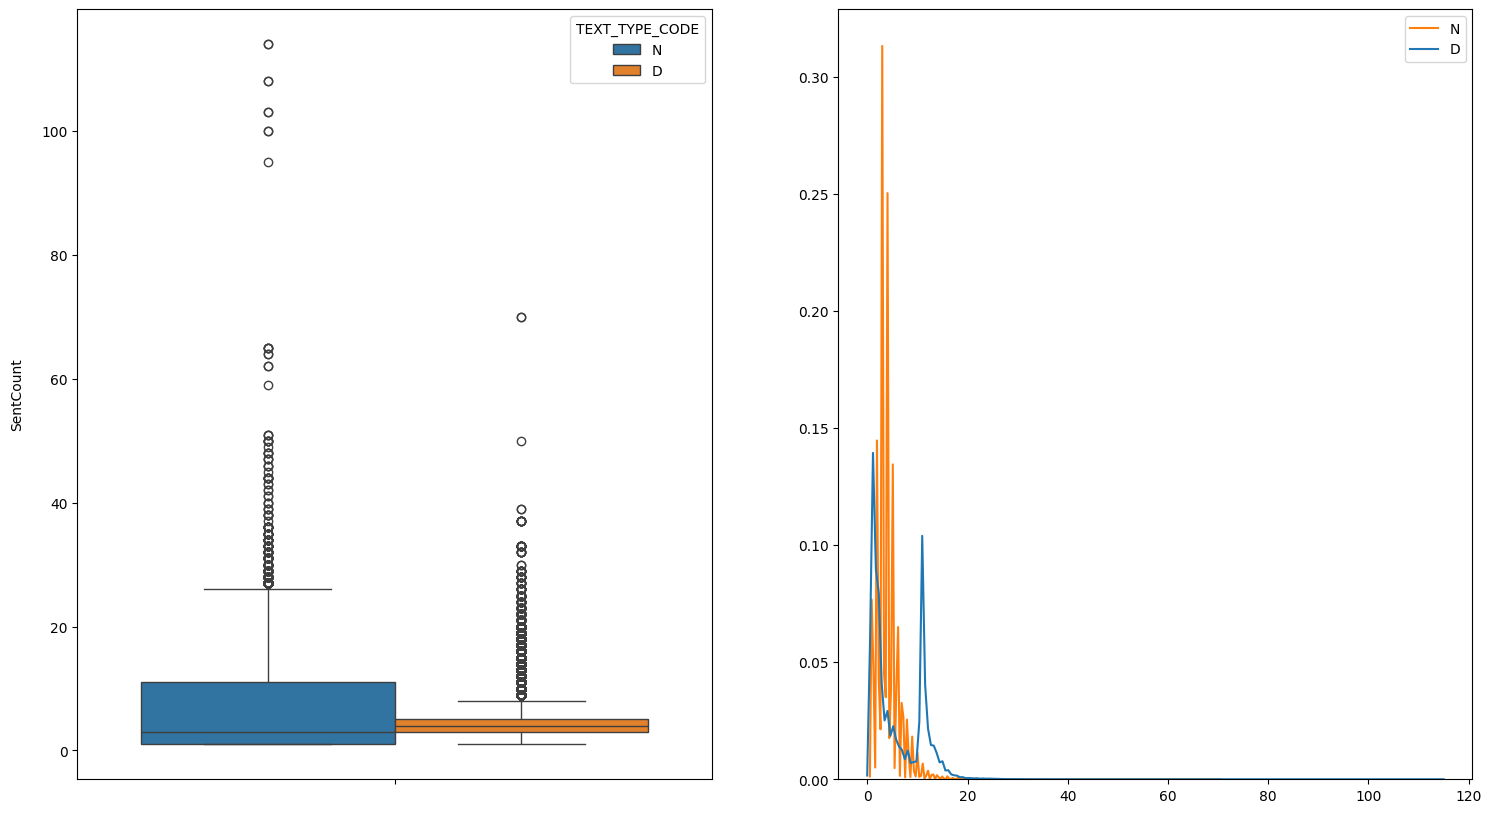

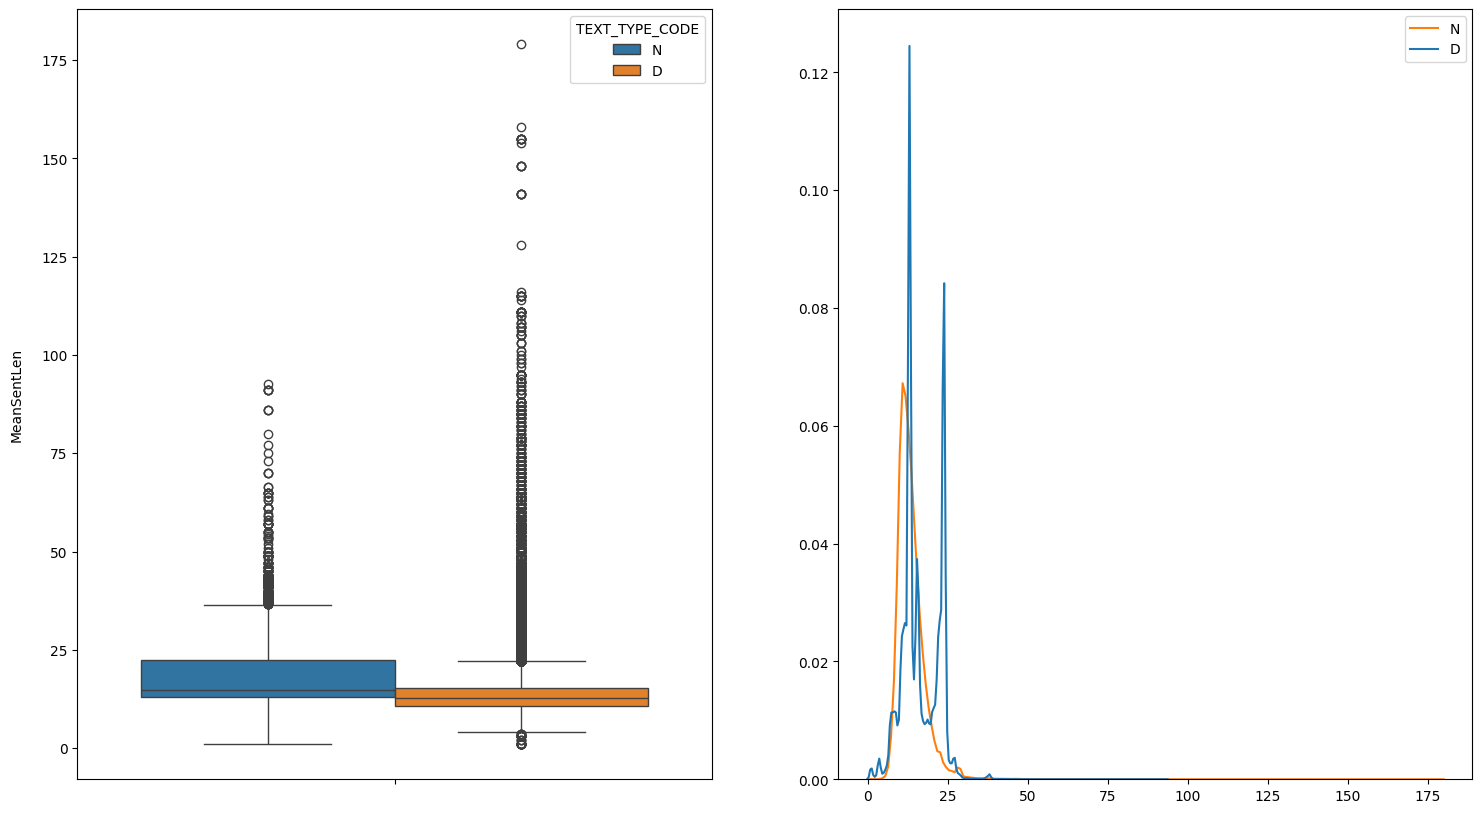

In [142]:
def visualize(col):
    plt.figure(figsize=(18, 10))
    
    plt.subplot(1,2,1)
    sns.boxplot(y=col, hue='TEXT_TYPE_CODE', data=df)
    plt.ylabel(col, labelpad=12.5)
    
    plt.subplot(1,2,2)
    sns.kdeplot(data=df, x=col, hue='TEXT_TYPE_CODE')
    plt.legend(df['TEXT_TYPE_CODE'].unique())
    plt.xlabel('')
    plt.ylabel('')
    
    plt.show()

textfeatures = ['CharCount', 'WordCount', 'MeanWordLen', 'SentCount', 'MeanSentLen']
for feature in textfeatures:
    visualize(feature)

### Term Frequency Analysis
Let's understand now the frequency of the terms and the most common terms. Before that, text will be cleaned.

In [143]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword_list = stopwords.words('english')

def clean(text):
    """Cleans the text using regex (lowercasing, removing digits, etc.)."""
    if pd.isna(text):
        return ''
    else:
        text = text.lower()
        text = re.sub(r'\(.*?\)', '', text)  # removes text inside parentheses
        text = re.sub(r'\d+', '', text)  # removes digits
        text = text.replace("�", " ")  # removes invalid replacement characters
        text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
        text = re.sub(r'\s+', ' ', text)  # remove extra spaces
        text = " ".join([word for word in text.split() if word not in stopword_list])
        return text.strip()

df['TextClean'] = df['FOI_TEXT'].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pietr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\482585586.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TextClean'] = df['FOI_TEXT'].apply(clean)


In [144]:
def corpus(text):
    text_list = text.split()
    return text_list

df['TextList'] = df['TextClean'].apply(corpus)
df.loc[:,['TextClean', 'TextList']].head()

C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\2342458521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TextList'] = df['TextClean'].apply(corpus)


TextClean  \
0  results investigation inconclusive since devic...   
1  reported lead implanted initially suboptimal p...   
2  results investigation inconclusive since devic...   
3  reported followup visit device found backup vv...   
4  results investigation inconclusive since devic...   

                                            TextList  
0  [results, investigation, inconclusive, since, ...  
1  [reported, lead, implanted, initially, subopti...  
2  [results, investigation, inconclusive, since, ...  
3  [reported, followup, visit, device, found, bac...  
4  [results, investigation, inconclusive, since, ...

In [145]:
from tqdm import trange

df_descriptions = df[df['TEXT_TYPE_CODE'] == 'D']

corpus_description = []
for i in trange(df_descriptions.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    try:
        corpus_description += df_descriptions['TextList'][i]
    except KeyError:
        continue
len(corpus_description)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 584285/584285 [00:06<00:00, 85383.47it/s]


7635902

In [146]:
from collections import Counter

mostCommon = Counter(corpus_description).most_common(20)
mostCommon

[('lead', 460576),
 ('reported', 429427),
 ('patient', 354825),
 ('right', 167607),
 ('device', 127984),
 ('ventricular', 120568),
 ('atrial', 118673),
 ('event', 104595),
 ('result', 98188),
 ('complications', 95362),
 ('exhibited', 95192),
 ('replaced', 88513),
 ('explanted', 84457),
 ('adverse', 82127),
 ('high', 78707),
 ('effects', 76342),
 ('additional', 70750),
 ('noted', 70103),
 ('impedance', 67140),
 ('pacing', 63359)]

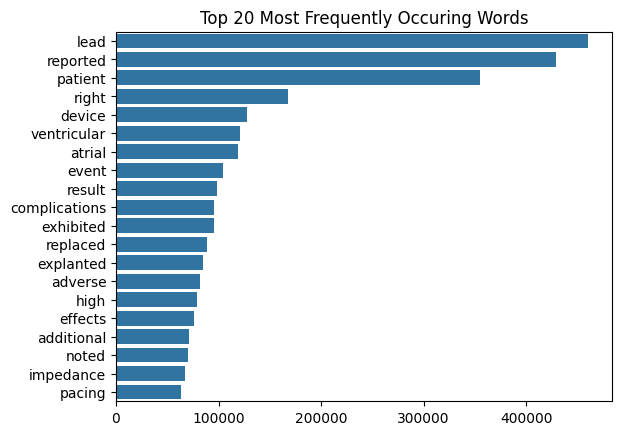

In [147]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 20 Most Frequently Occuring Words')
plt.show()

In [148]:
uni10 = Counter(corpus_description).most_common(10)
uni20 = Counter(corpus_description).most_common(20)
uni30 = Counter(corpus_description).most_common(30)

### N-grams
#### Bi-gram

In [149]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df_descriptions['TextClean'])

In [150]:
from scipy.sparse import csr_matrix

# posing the bigrams in a sparse matrix
bigrams_sparse = csr_matrix(bigrams)

# sum along x axis
count_values = bigrams_sparse.sum(axis=0).A1  # Flatten the array
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse=True))
ngram_freq.columns = ["frequency", "ngram"]

# saving the top 10 frequent bigrams
top_bigrams = ngram_freq.head(30)

In [151]:
# saving bigrams
bigram10 = ngram_freq.head(10)
bigram20 = ngram_freq.head(20)
bigram30 = ngram_freq.head(30)

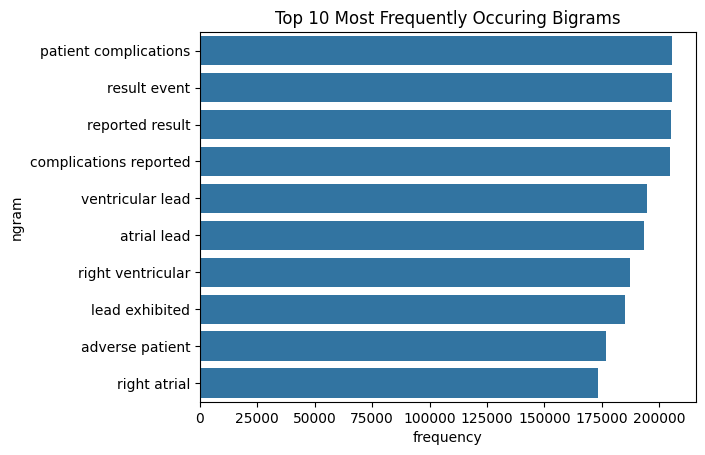

In [152]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

#### Tri-gram

In [153]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df_descriptions['TextClean'])
trigrams_sparse = csr_matrix(trigrams)

count_values = trigrams_sparse.sum(axis=0).A1
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

top_trigrams = ngram_freq.head(30)

In [154]:
trigram10 = ngram_freq.head(10)
trigram20 = ngram_freq.head(20)
trigram30 = ngram_freq.head(30)

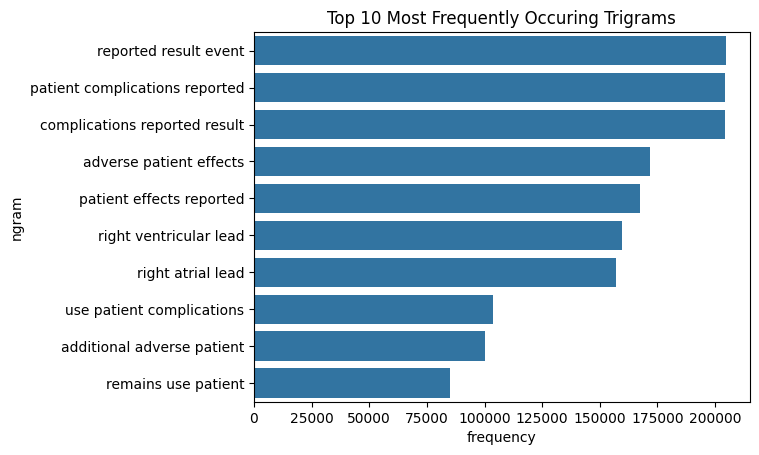

In [155]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

Now we may want to see what are the most frequent n-grams per IMDRF category. We may refer to the first category to take a look.

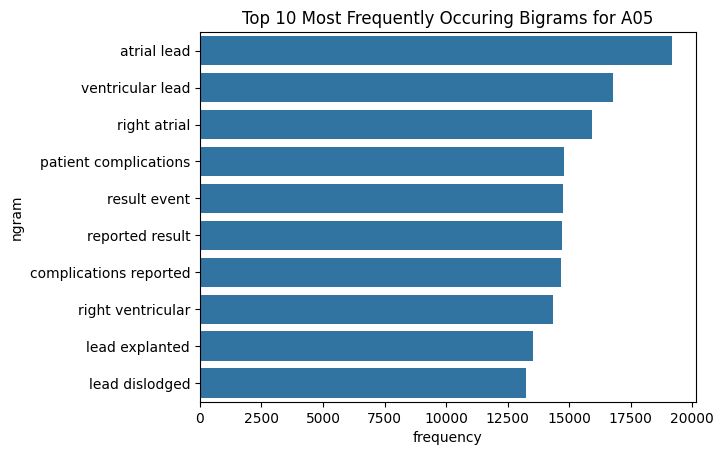

Problems associated with mechanical actions or defects, including moving parts or subassemblies, etc.




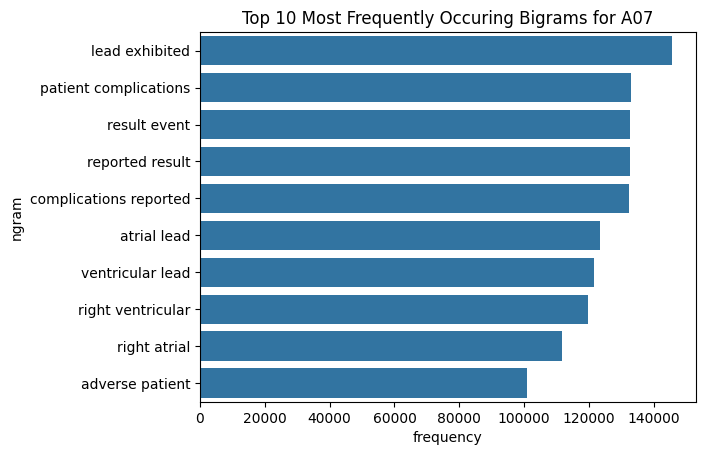

Problem associated with the function of the electrical circuitry of the device.




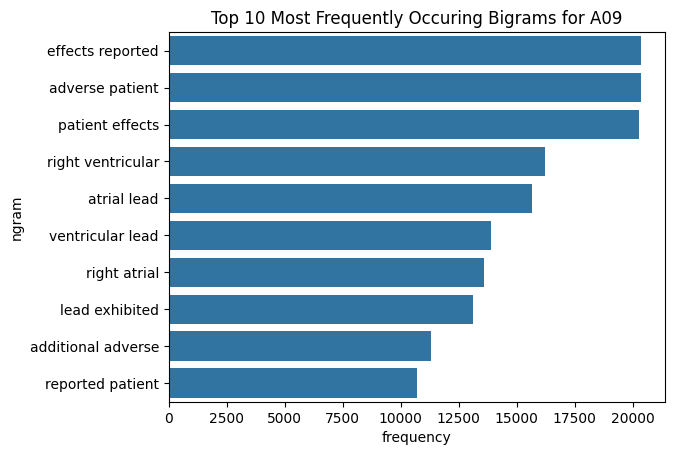

Problem associated with any deviation from the documented specifications of the device that relate to the end result, data, or test results provided by the device.




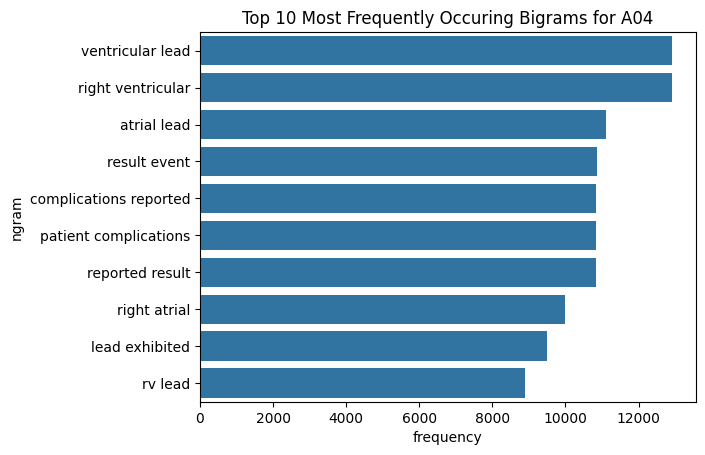

Problem associated with any deviations from the documented specifications of the device that relate to the limited durability of all material used to construct device.




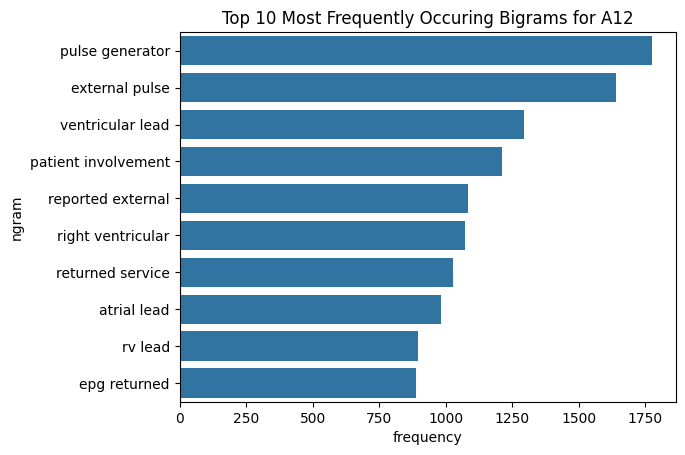

Problem associated with linking of the device and/or the functional units set up to provide means for a transfer of liquid, gas, electricity or data.




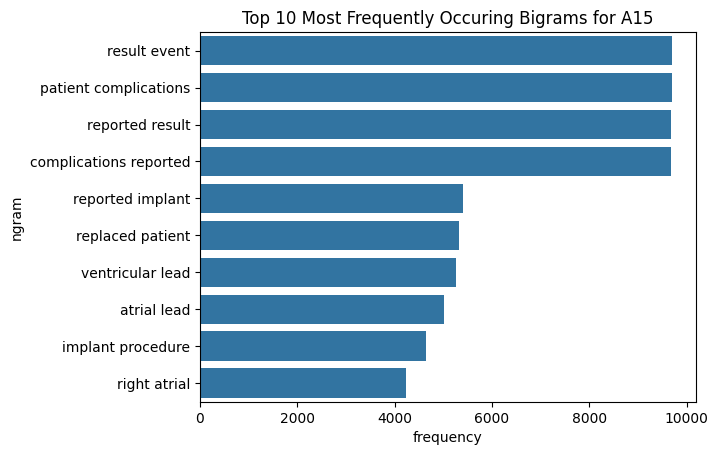

Problem associated with any deviations from the documented specifications of the device that relate to the sequence of events for activation, positioning or separation of device. Note: Deployment is synonymous with activation.




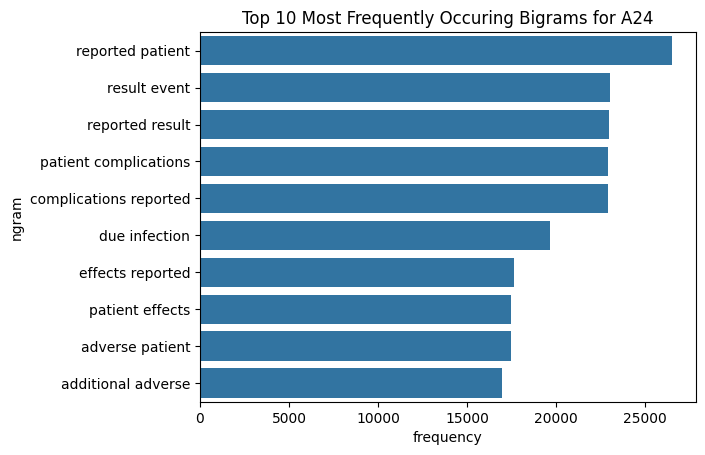

An adverse event (e.g. patient harm) appears to have occurred, but there does not appear to have been a problem with the device or the way it was used.




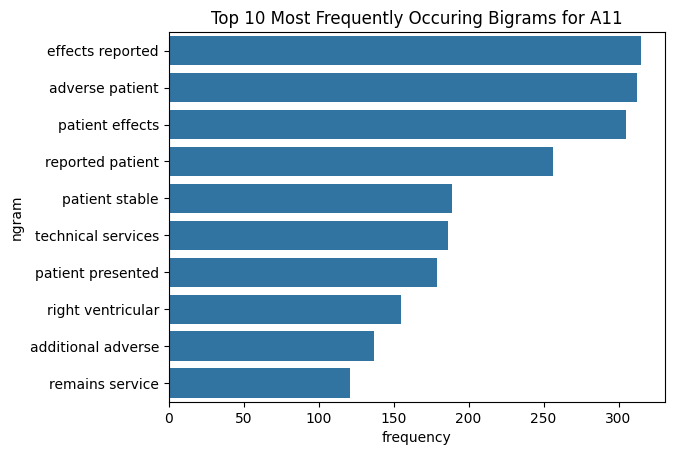

Problem associated with written programs, codes, and/or software system that affects device performance or communication with another device.




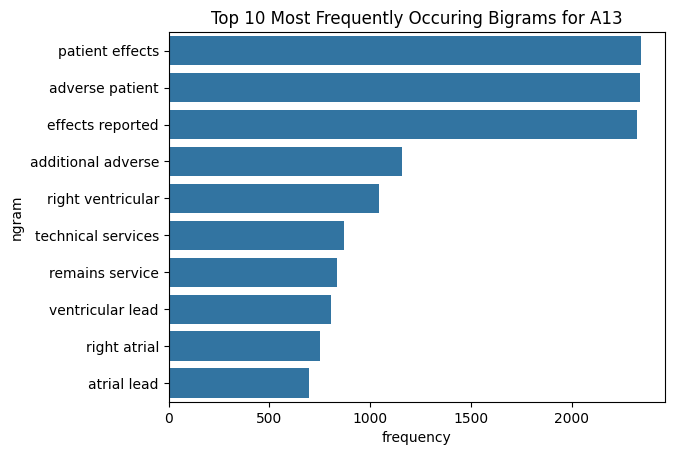

Problem associated with the device sending or receiving signals or data. This includes transmission among internal components of the device to which the device is intended to communicate.




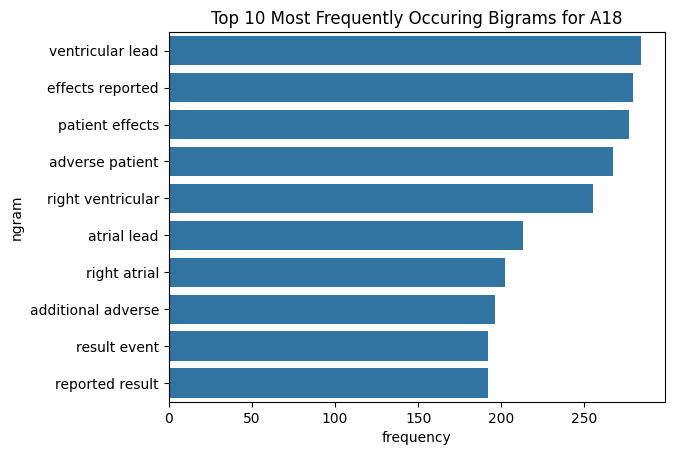

Problem associated with the presence of any unexpected foreign substance found in the device, on its surface or in the package materials, which may affect performance or intended use of the device, or problem that compromise effective decontamination of the device.




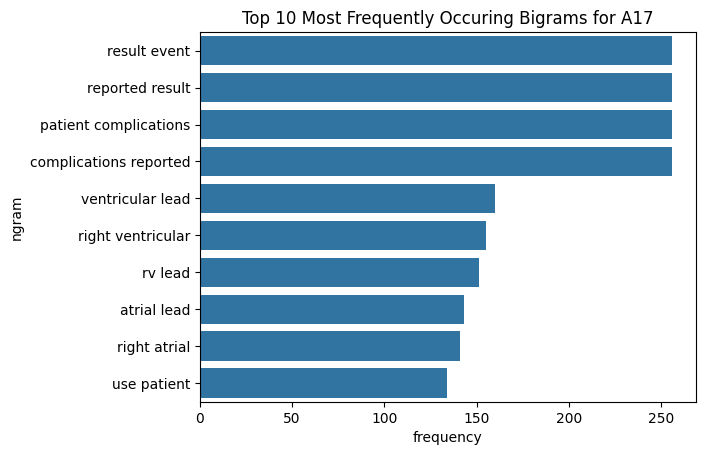

Problem associated with compatibility between device, patients or substances (medication, body fluid, etc.)




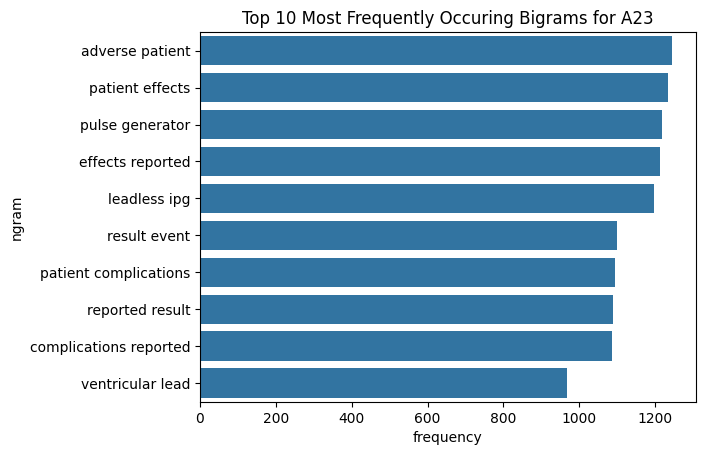

Problem associated with failure to process, service, or operate the device according to the manufacturer's recommendations or recognized best practices.




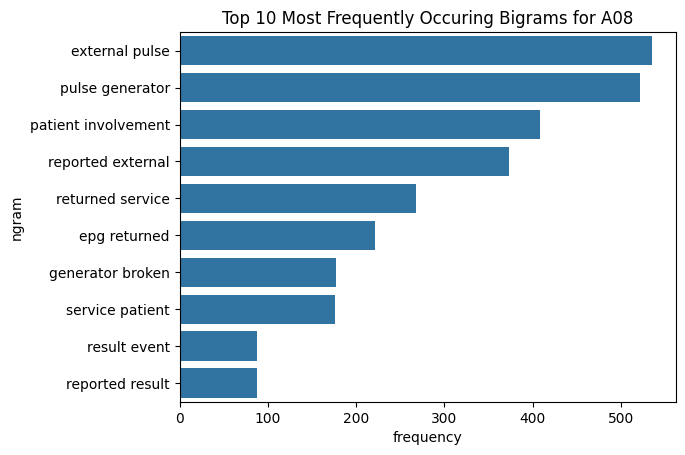

Problem associated with the operation of the device, related to its accuracy, and associated with the calibration of the device.




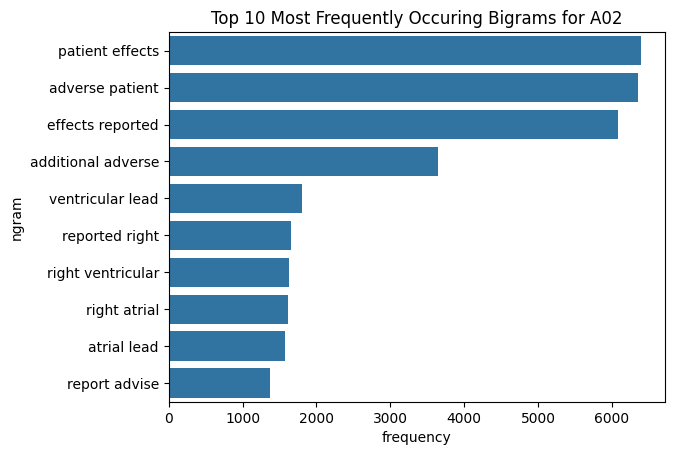

Problem associated with any deviations from the documented specifications of the device that relate to nonconformity during manufacture to the design of an item or to specified manufacturing, packaging or shipping processes (out of box problem).




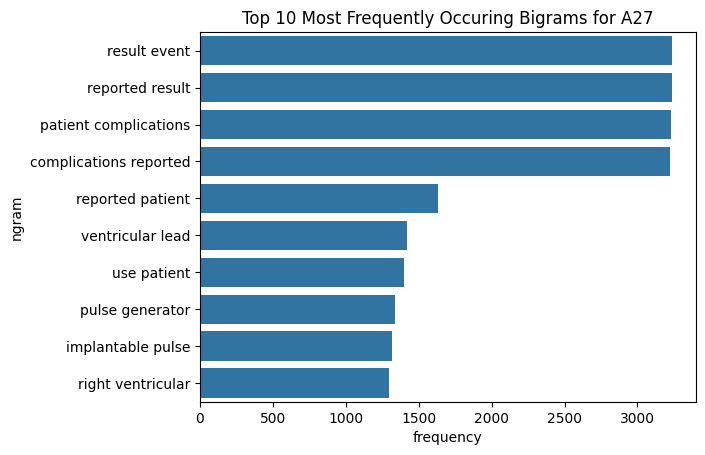

The device problem is not adequately described by any other term. Note: this code must not be used unless there is no other feasible code. The preferred term should be documented when submitting an adverse event report. This information will be used to determine if a new term should be added to the code table.




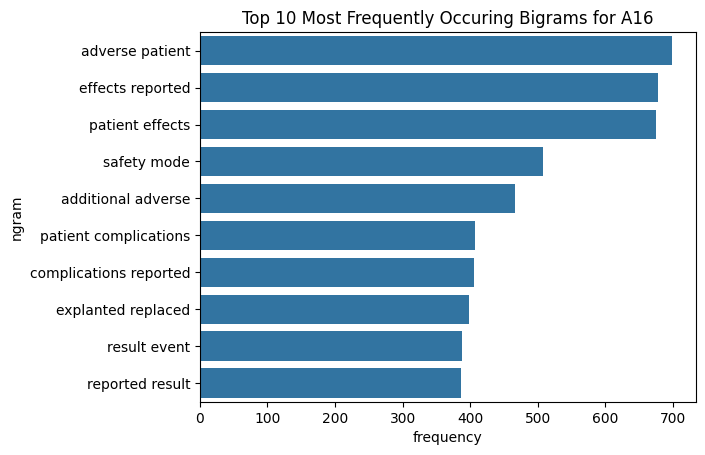

Problem associated with any deviations from the documented specifications of the device that relate to the implemented and inherited design features specific to devices used for reducing risks to patient or caregiver or maintaining risks within specified levels.




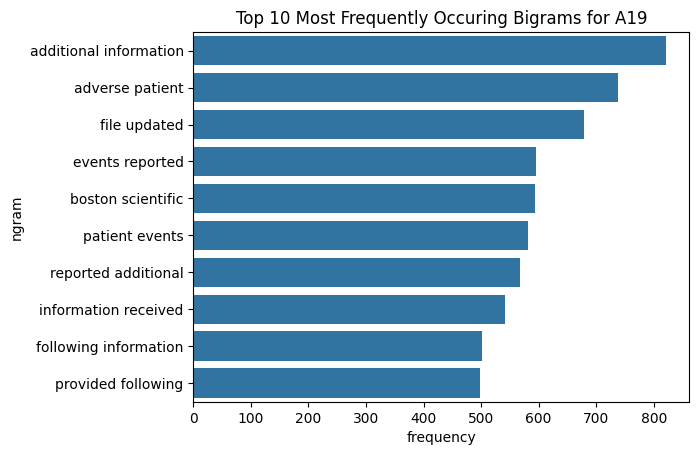

Problem associated with the surrounding conditions in which the device is being used such as temperature, noise, lighting, ventilation, or other external factors such as power supply.




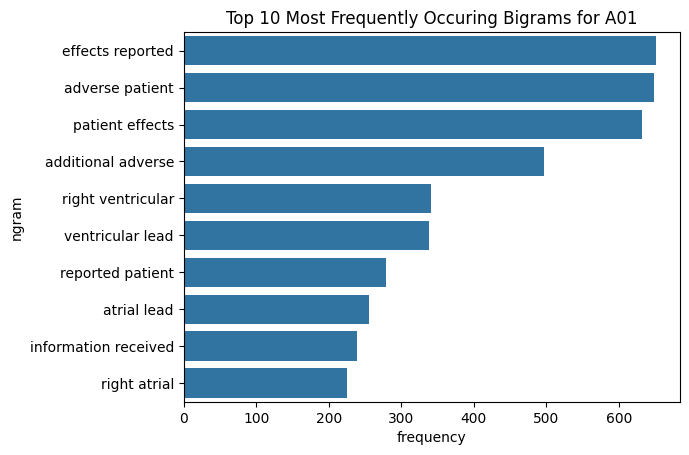

Problem related to the interaction between the patient and the device.




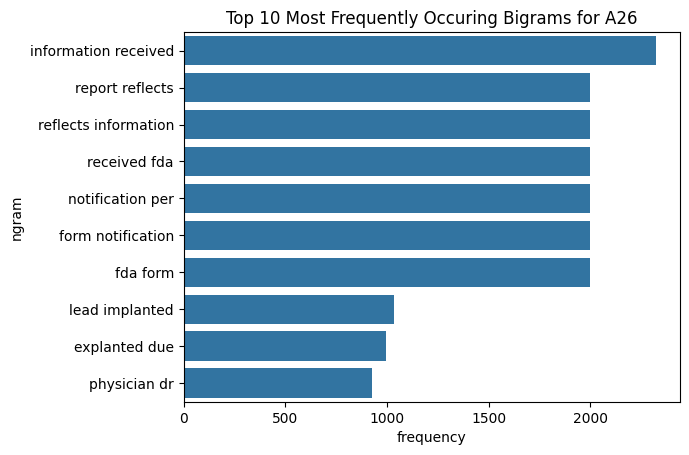

An adverse event appears to have occurred but there is not yet enough information available to classify the device problem.




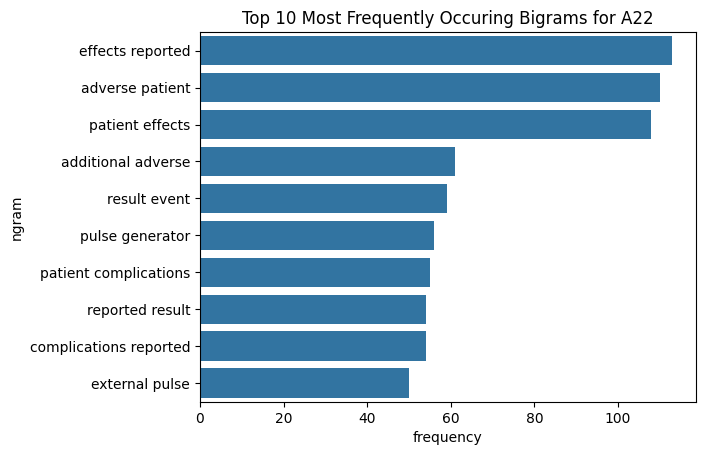

Problem associated with an act or omission of an act that has a different result than that intended by the manufacturer or expected by the operator.




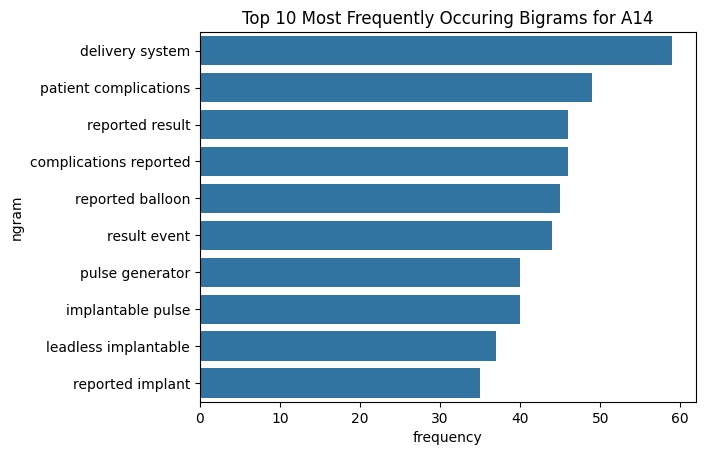

Problem associated with the device failing to deliver or draw liquids or gases as intended (e.g. delivering drugs at incorrect rate, problems with drawing fluid from a system). This includes vacuum collection devices and manual or mechanical pumps.




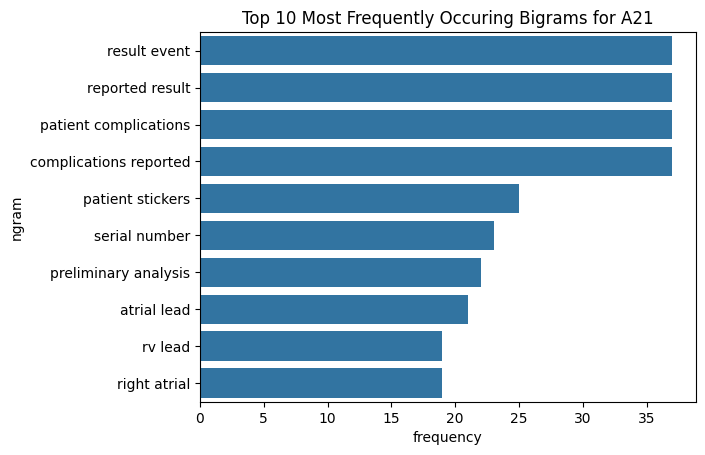

Problem associated with device markings/labelling, instructions for use, training and maintenance documentation or guidelines.




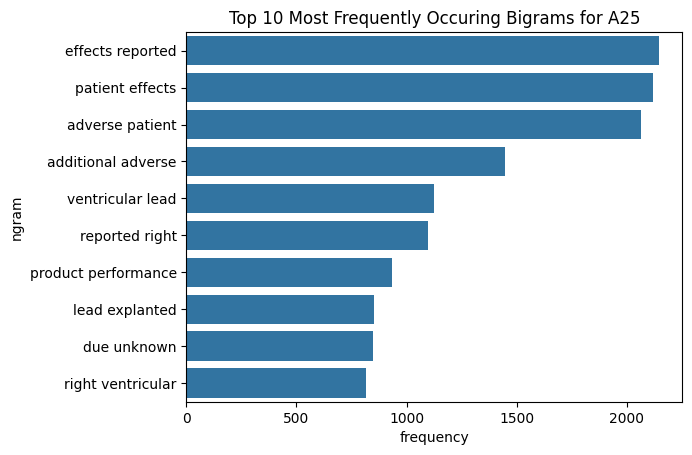

A report has been received but the description provided does not appear to relate to an adverse event. This code allows a report to be recorded for administration purposes, even if it doesn't meet the requirements for adverse event reporting.




In [156]:
# consider the categories of Cat1IMDRF with more than 100 occurrences in the df_descriptions dataframe
most_frquent = df_descriptions[df_descriptions['Cat1IMDRF'].isin(df_descriptions['Cat1IMDRF'].value_counts().loc[lambda x: x > 100].index)]

category_list = most_frquent['Cat1IMDRF'].unique()

# compute the unigram, bigram and trigram frequencies for the most frequent categories
cv = CountVectorizer(ngram_range=(2,2))

for category in category_list:
    bigrams = cv.fit_transform(most_frquent[most_frquent['Cat1IMDRF'] == category]['TextClean'])
    bigrams_sparse = csr_matrix(bigrams)
    count_values = bigrams_sparse.sum(axis=0).A1
    ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
    ngram_freq.columns = ["frequency", "ngram"]
    sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
    plt.title(f'Top 10 Most Frequently Occuring Bigrams for {category}')
    plt.show()

    print(df_imdrf[df_imdrf['IMDRF Code'] == category]['Definition'].values[0])
    print("\n")
    


Let's try to remove the 10 most frequent bigrams overall and compute again the bigrams

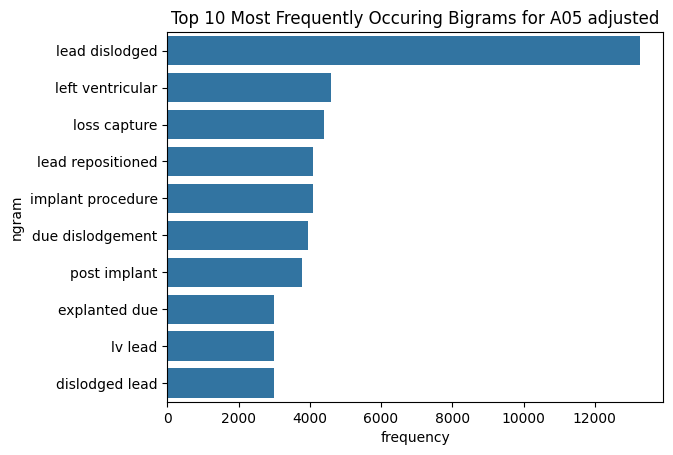

Problems associated with mechanical actions or defects, including moving parts or subassemblies, etc.




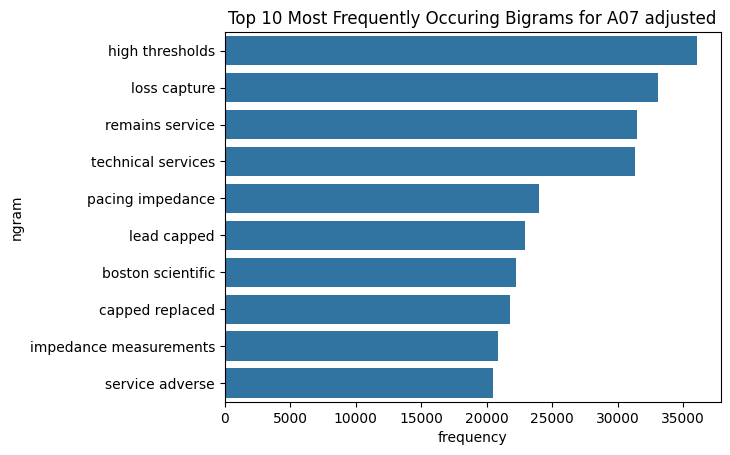

Problem associated with the function of the electrical circuitry of the device.




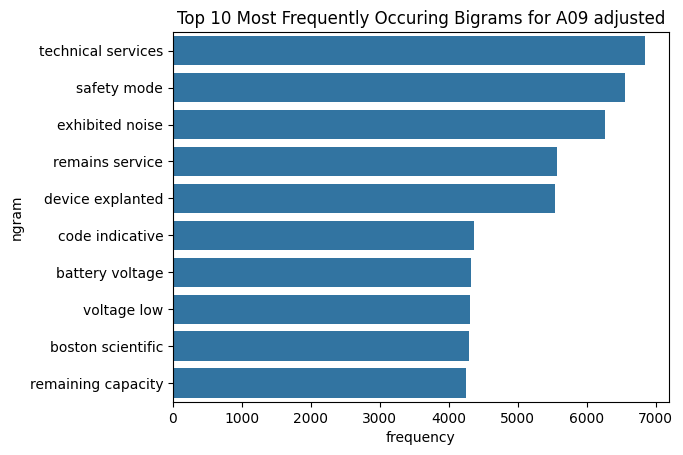

Problem associated with any deviation from the documented specifications of the device that relate to the end result, data, or test results provided by the device.




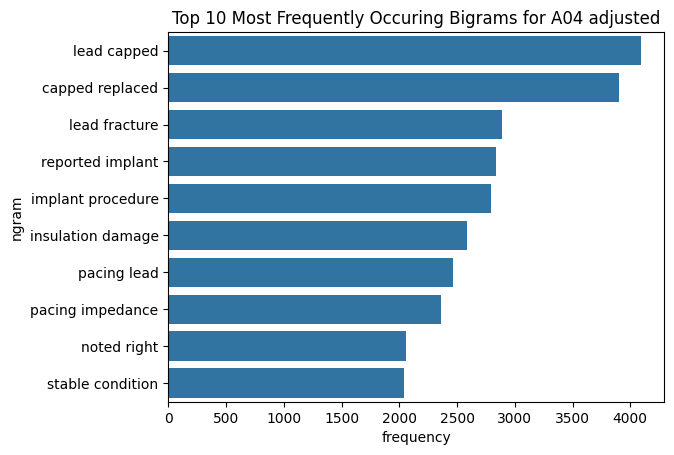

Problem associated with any deviations from the documented specifications of the device that relate to the limited durability of all material used to construct device.




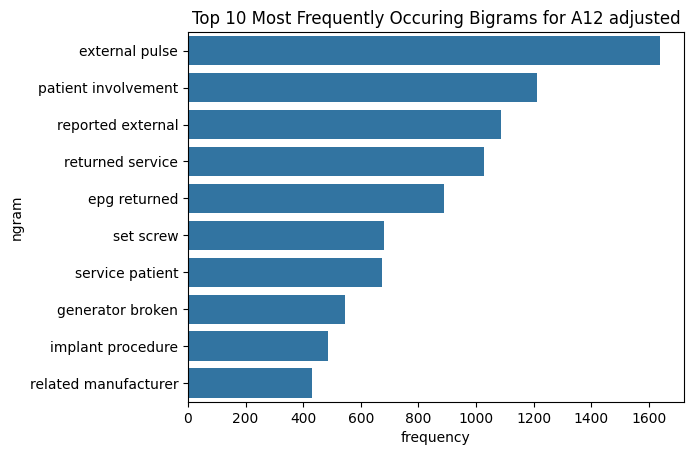

Problem associated with linking of the device and/or the functional units set up to provide means for a transfer of liquid, gas, electricity or data.




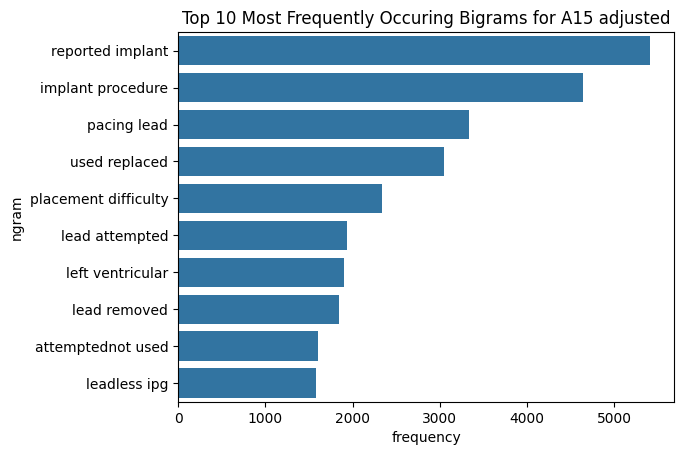

Problem associated with any deviations from the documented specifications of the device that relate to the sequence of events for activation, positioning or separation of device. Note: Deployment is synonymous with activation.




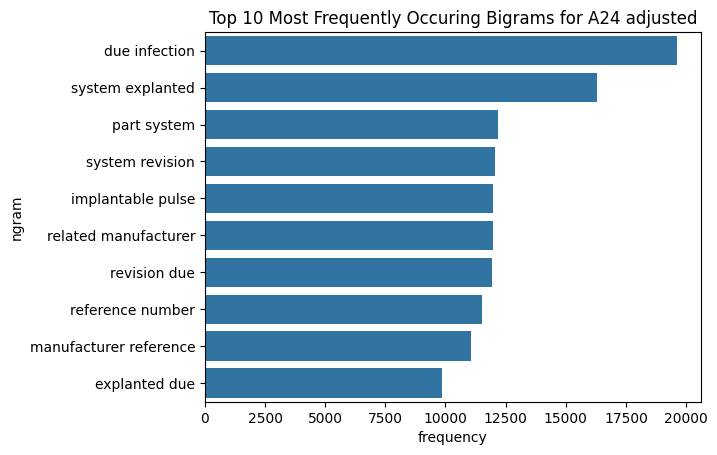

An adverse event (e.g. patient harm) appears to have occurred, but there does not appear to have been a problem with the device or the way it was used.




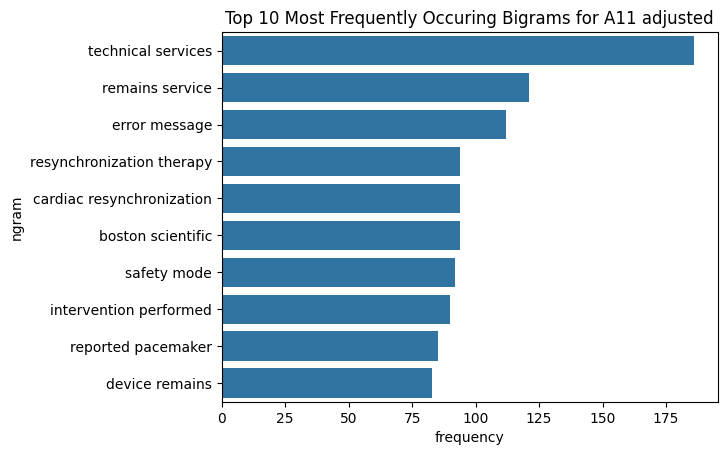

Problem associated with written programs, codes, and/or software system that affects device performance or communication with another device.




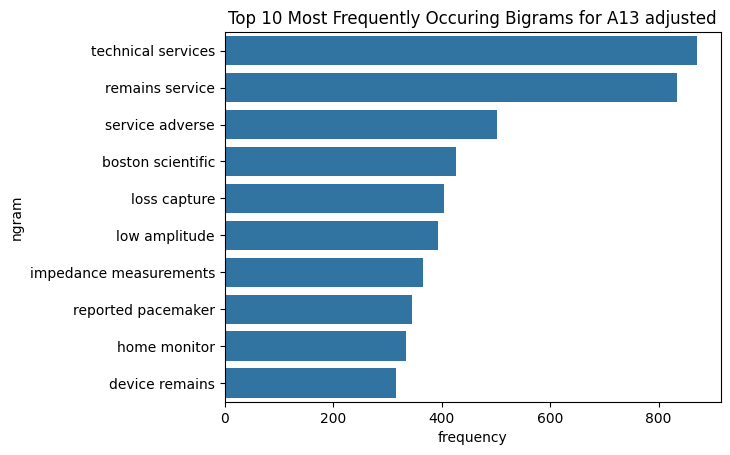

Problem associated with the device sending or receiving signals or data. This includes transmission among internal components of the device to which the device is intended to communicate.




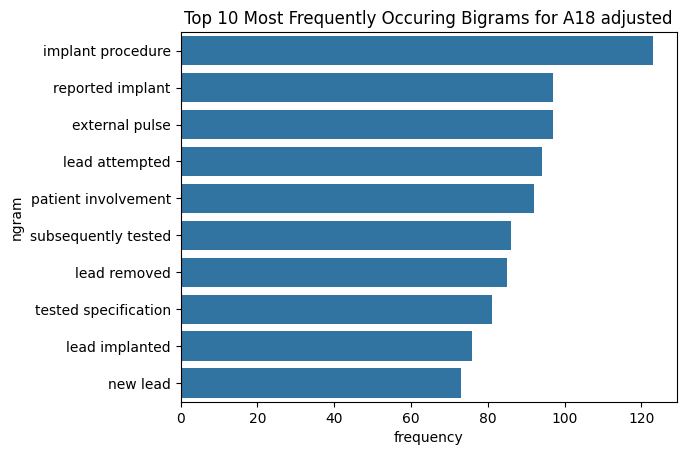

Problem associated with the presence of any unexpected foreign substance found in the device, on its surface or in the package materials, which may affect performance or intended use of the device, or problem that compromise effective decontamination of the device.




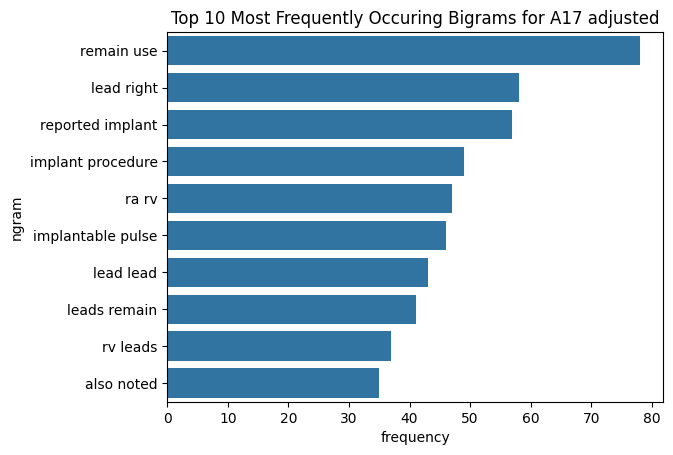

Problem associated with compatibility between device, patients or substances (medication, body fluid, etc.)




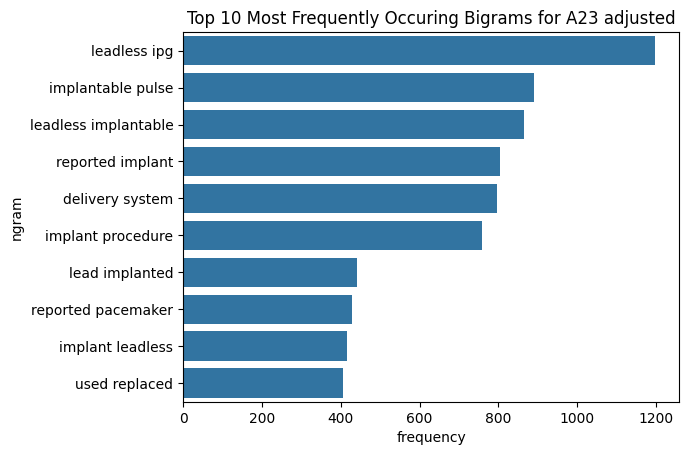

Problem associated with failure to process, service, or operate the device according to the manufacturer's recommendations or recognized best practices.




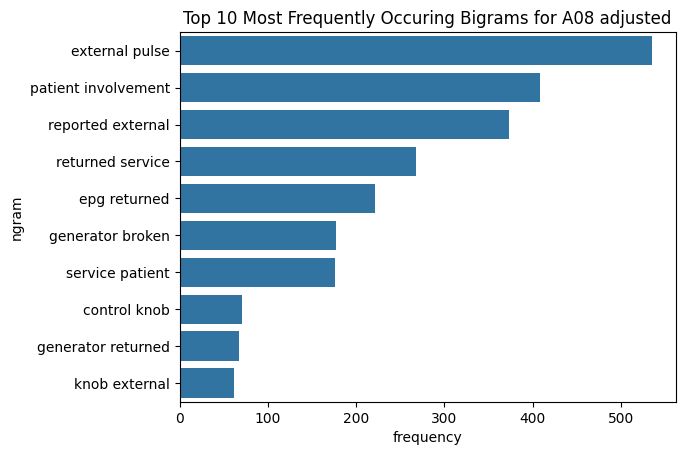

Problem associated with the operation of the device, related to its accuracy, and associated with the calibration of the device.




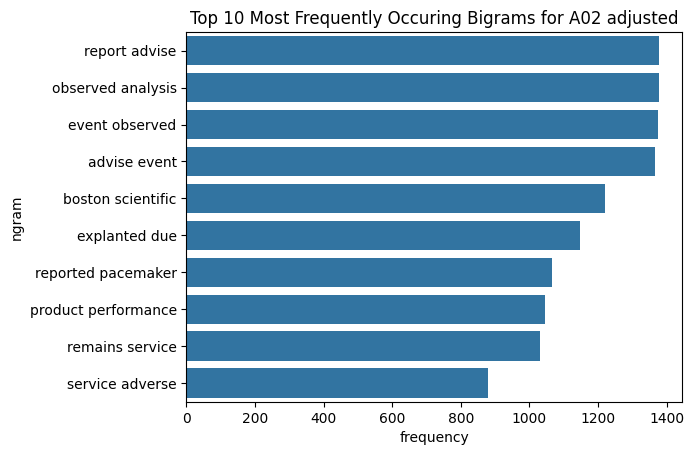

Problem associated with any deviations from the documented specifications of the device that relate to nonconformity during manufacture to the design of an item or to specified manufacturing, packaging or shipping processes (out of box problem).




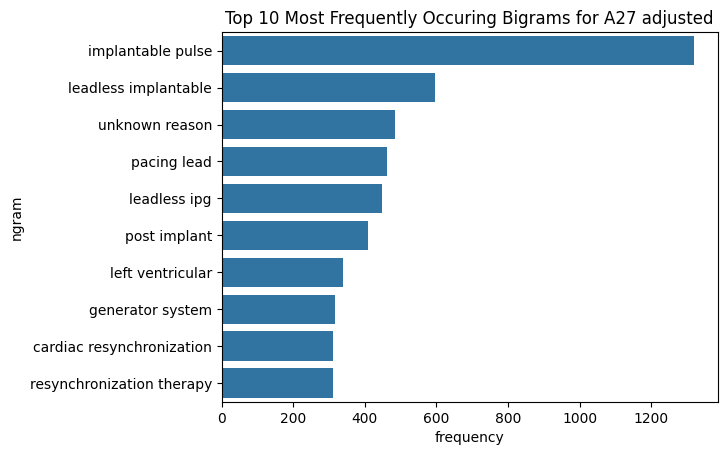

The device problem is not adequately described by any other term. Note: this code must not be used unless there is no other feasible code. The preferred term should be documented when submitting an adverse event report. This information will be used to determine if a new term should be added to the code table.




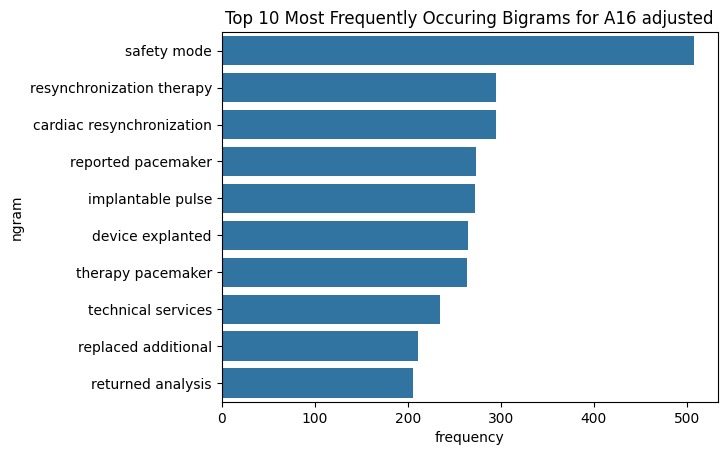

Problem associated with any deviations from the documented specifications of the device that relate to the implemented and inherited design features specific to devices used for reducing risks to patient or caregiver or maintaining risks within specified levels.




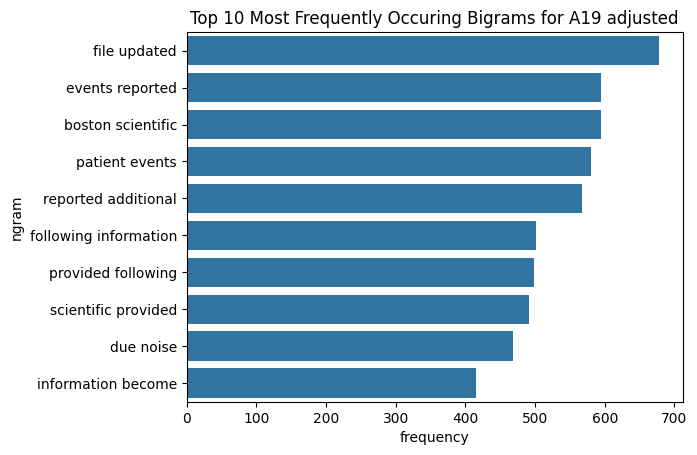

Problem associated with the surrounding conditions in which the device is being used such as temperature, noise, lighting, ventilation, or other external factors such as power supply.




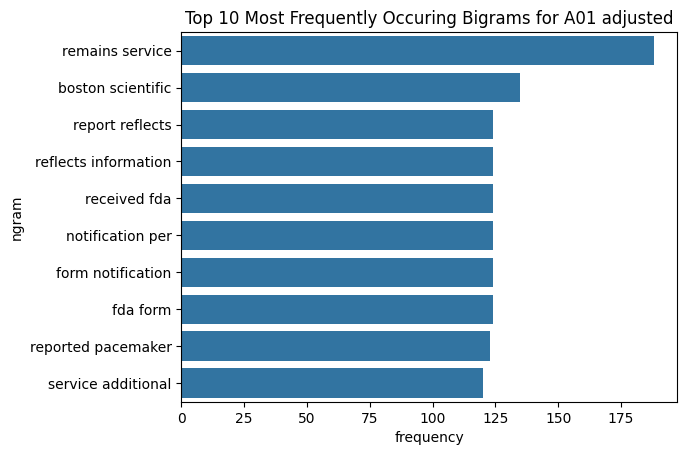

Problem related to the interaction between the patient and the device.




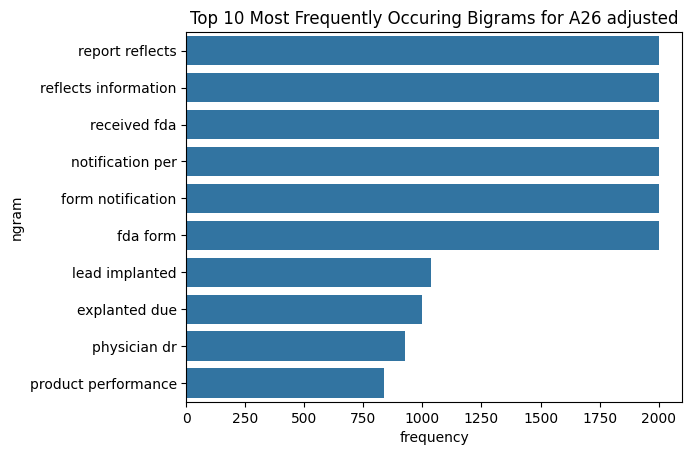

An adverse event appears to have occurred but there is not yet enough information available to classify the device problem.




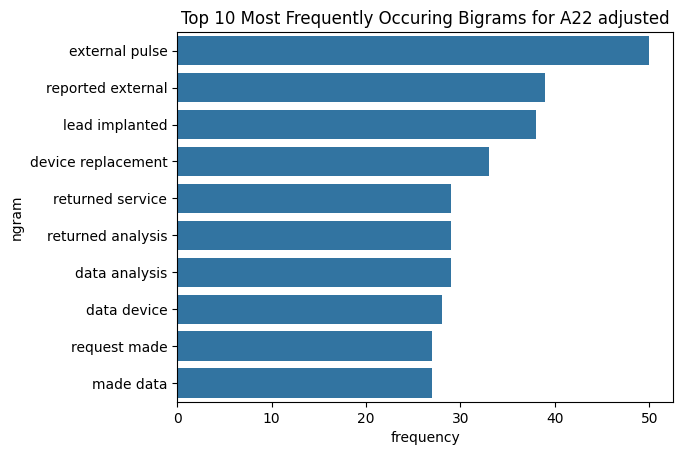

Problem associated with an act or omission of an act that has a different result than that intended by the manufacturer or expected by the operator.




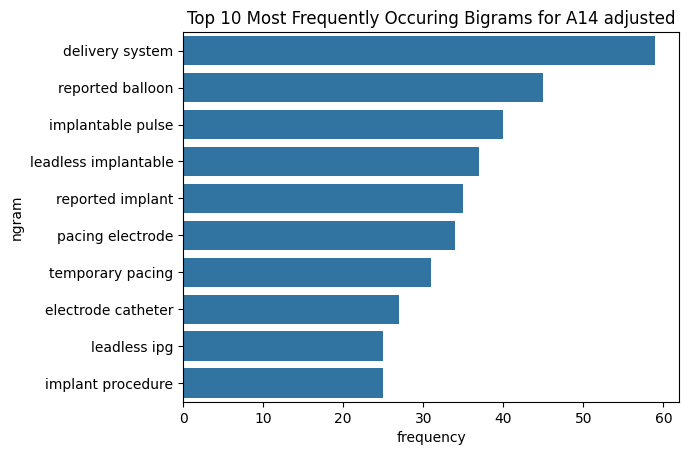

Problem associated with the device failing to deliver or draw liquids or gases as intended (e.g. delivering drugs at incorrect rate, problems with drawing fluid from a system). This includes vacuum collection devices and manual or mechanical pumps.




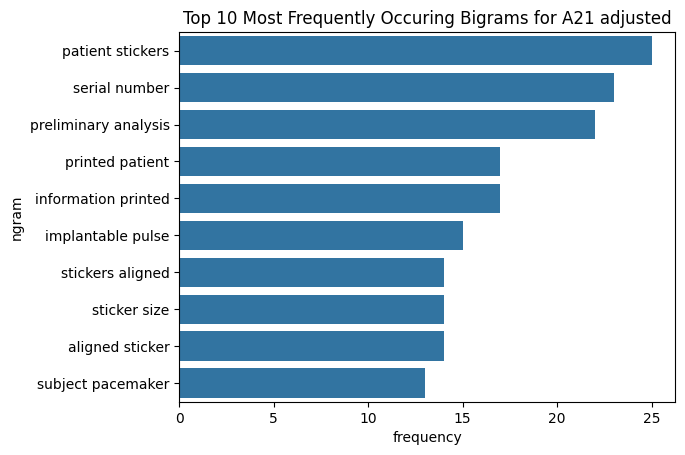

Problem associated with device markings/labelling, instructions for use, training and maintenance documentation or guidelines.




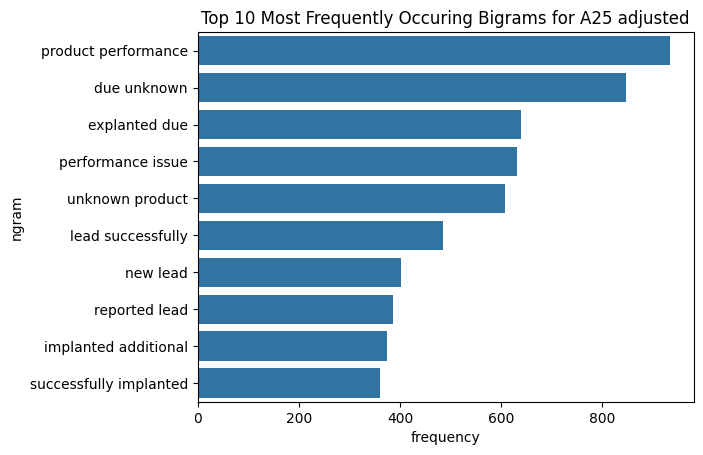

A report has been received but the description provided does not appear to relate to an adverse event. This code allows a report to be recorded for administration purposes, even if it doesn't meet the requirements for adverse event reporting.




In [157]:
for category in category_list:
    bigrams = cv.fit_transform(most_frquent[most_frquent['Cat1IMDRF'] == category]['TextClean'])
    bigrams_sparse = csr_matrix(bigrams)
    count_values = bigrams_sparse.sum(axis=0).A1
    ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
    ngram_freq.columns = ["frequency", "ngram"]

    # discard the bigrams contained in the top 10 bigrams
    ngram_freq = ngram_freq[~ngram_freq['ngram'].isin(top_bigrams['ngram'])]
    sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
    plt.title(f'Top 10 Most Frequently Occuring Bigrams for {category} adjusted')
    plt.show()

    print(df_imdrf[df_imdrf['IMDRF Code'] == category]['Definition'].values[0])
    print("\n")

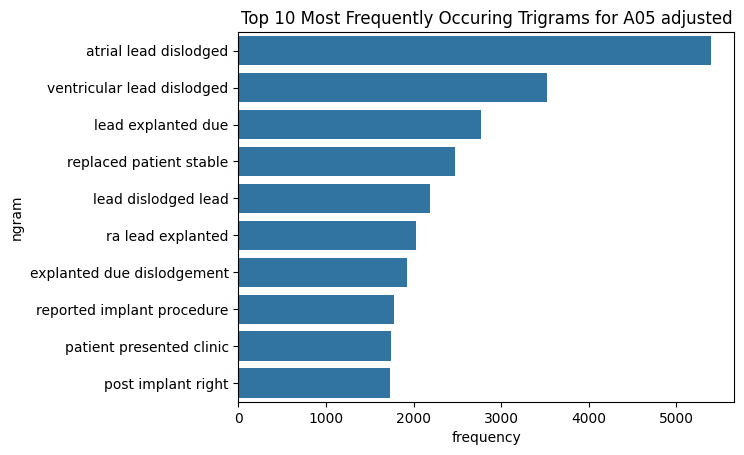

Problems associated with mechanical actions or defects, including moving parts or subassemblies, etc.




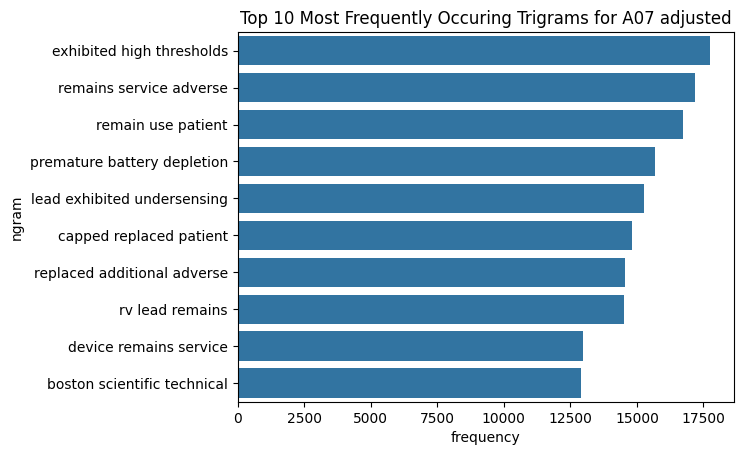

Problem associated with the function of the electrical circuitry of the device.




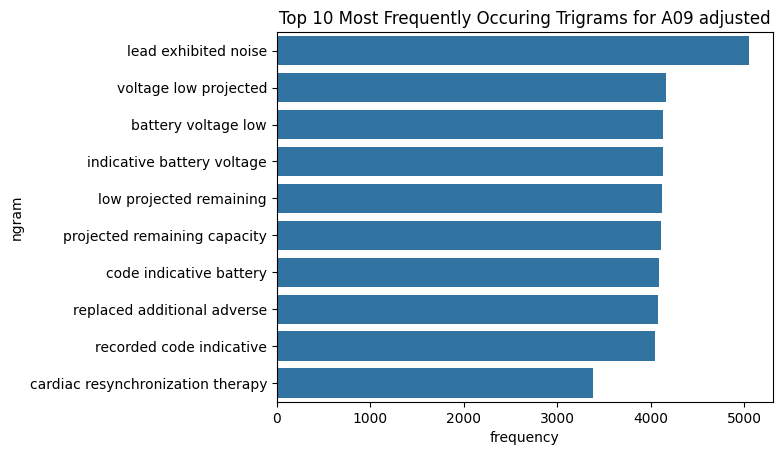

Problem associated with any deviation from the documented specifications of the device that relate to the end result, data, or test results provided by the device.




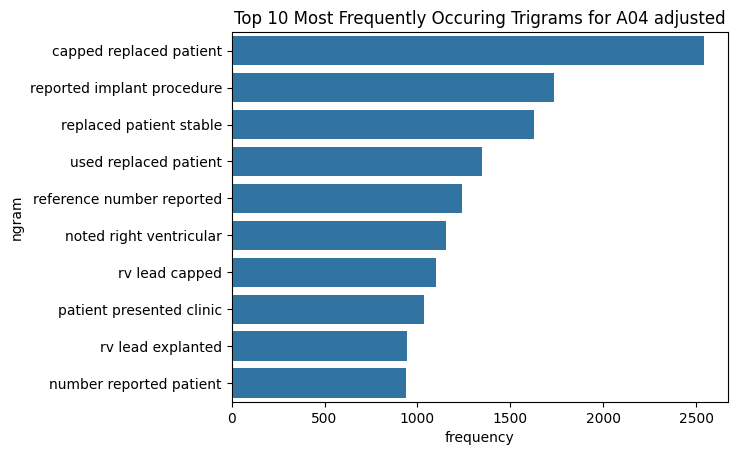

Problem associated with any deviations from the documented specifications of the device that relate to the limited durability of all material used to construct device.




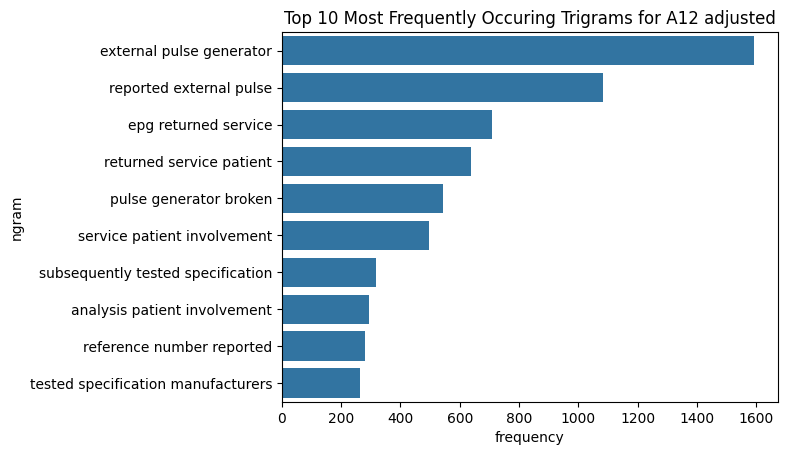

Problem associated with linking of the device and/or the functional units set up to provide means for a transfer of liquid, gas, electricity or data.




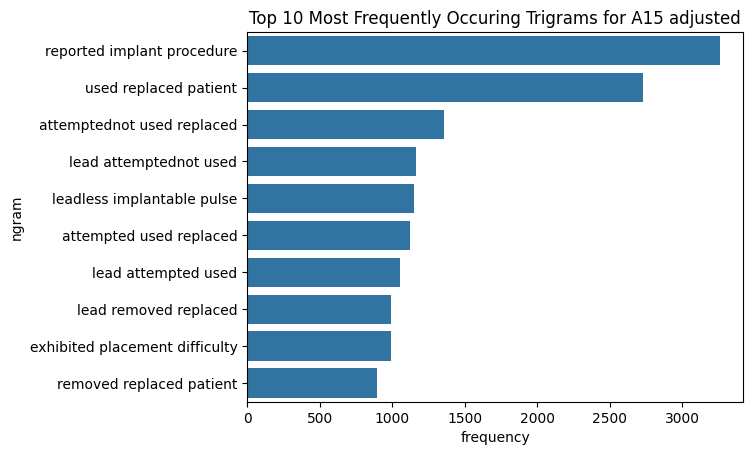

Problem associated with any deviations from the documented specifications of the device that relate to the sequence of events for activation, positioning or separation of device. Note: Deployment is synonymous with activation.




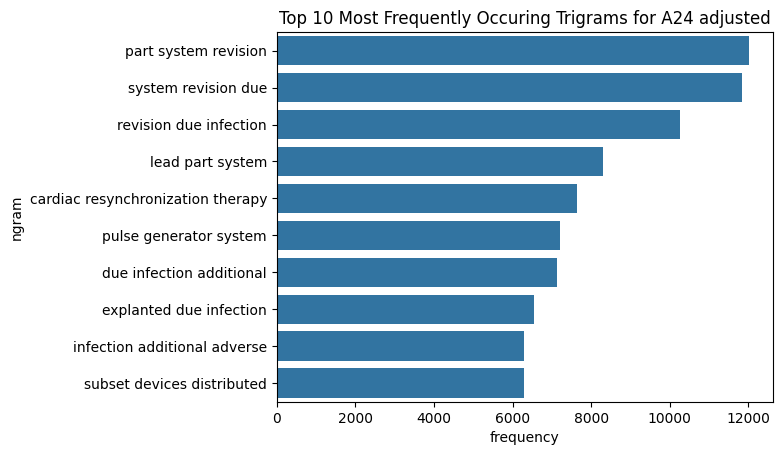

An adverse event (e.g. patient harm) appears to have occurred, but there does not appear to have been a problem with the device or the way it was used.




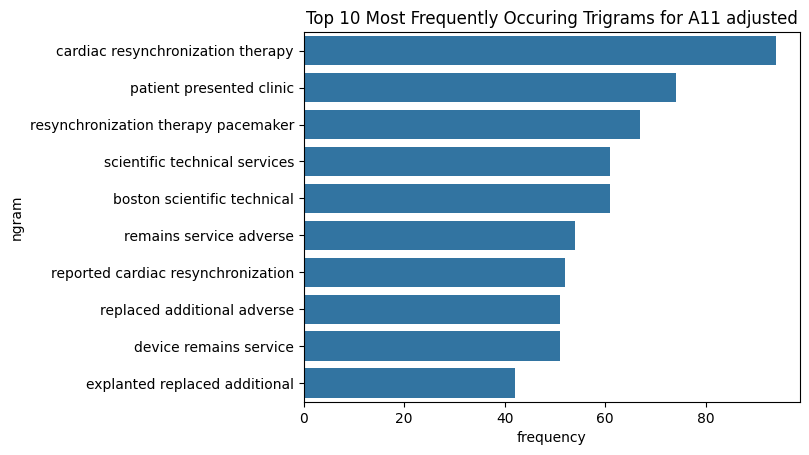

Problem associated with written programs, codes, and/or software system that affects device performance or communication with another device.




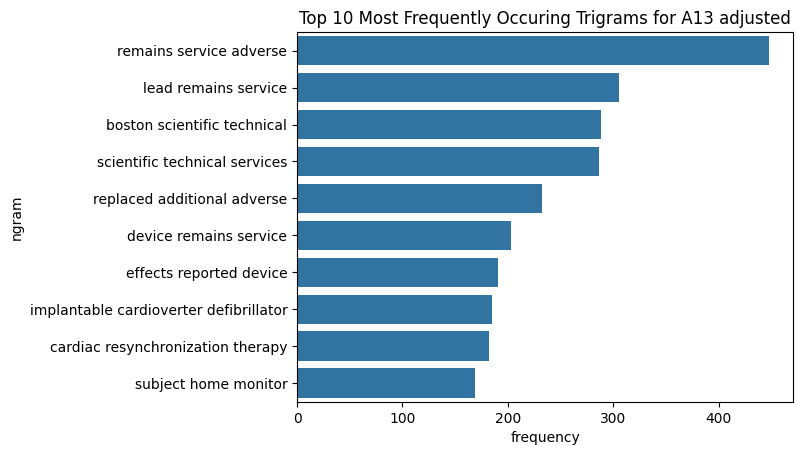

Problem associated with the device sending or receiving signals or data. This includes transmission among internal components of the device to which the device is intended to communicate.




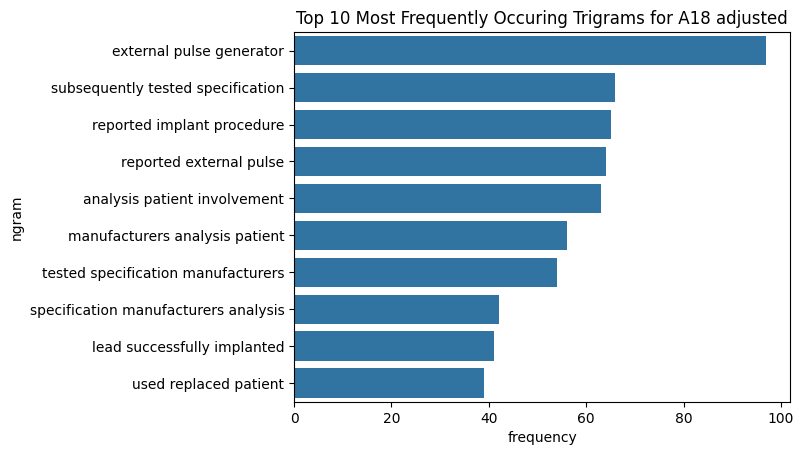

Problem associated with the presence of any unexpected foreign substance found in the device, on its surface or in the package materials, which may affect performance or intended use of the device, or problem that compromise effective decontamination of the device.




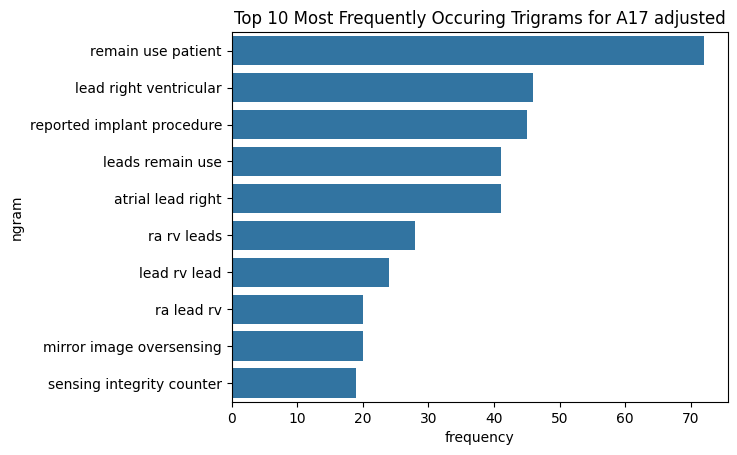

Problem associated with compatibility between device, patients or substances (medication, body fluid, etc.)




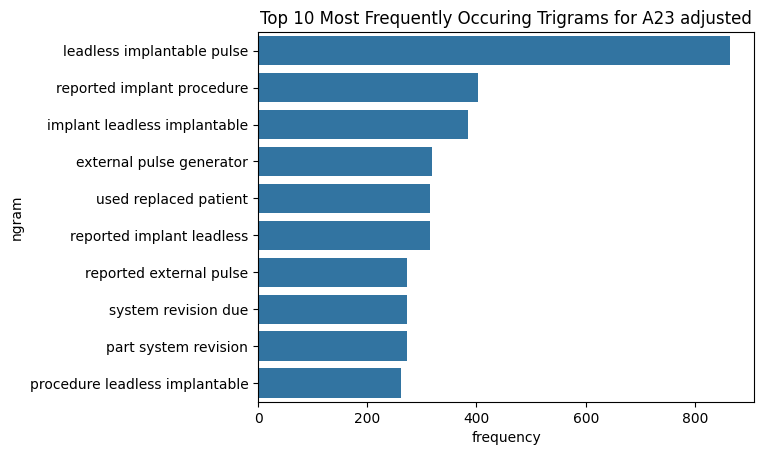

Problem associated with failure to process, service, or operate the device according to the manufacturer's recommendations or recognized best practices.




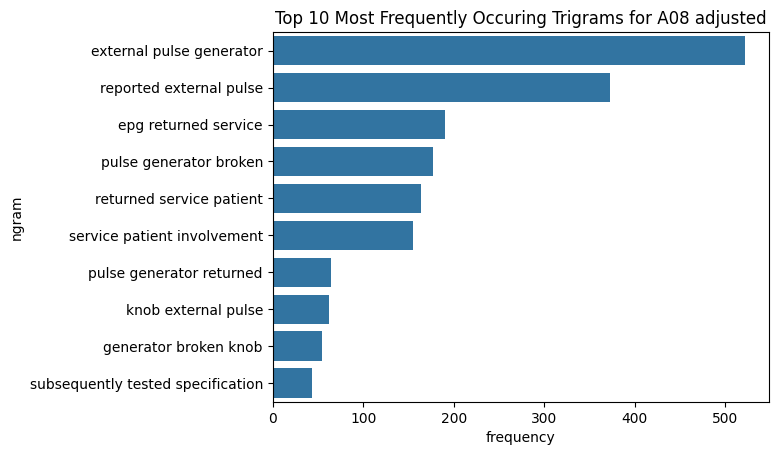

Problem associated with the operation of the device, related to its accuracy, and associated with the calibration of the device.




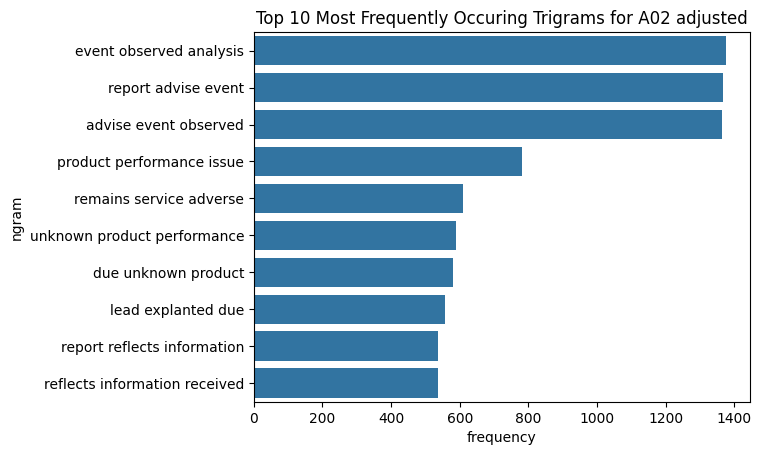

Problem associated with any deviations from the documented specifications of the device that relate to nonconformity during manufacture to the design of an item or to specified manufacturing, packaging or shipping processes (out of box problem).




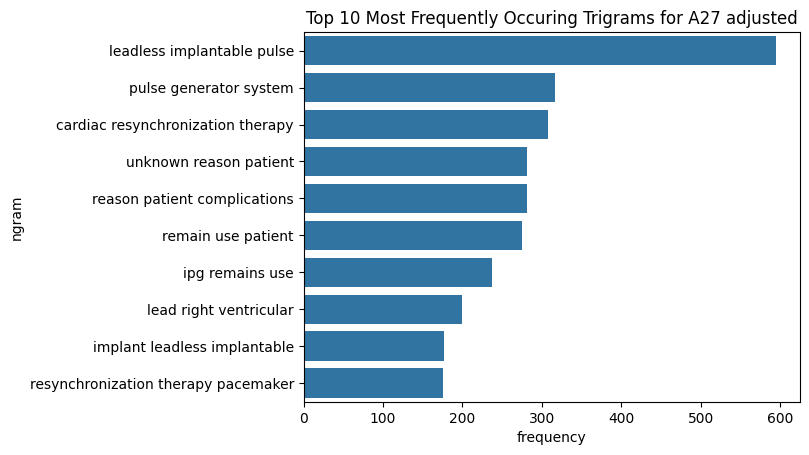

The device problem is not adequately described by any other term. Note: this code must not be used unless there is no other feasible code. The preferred term should be documented when submitting an adverse event report. This information will be used to determine if a new term should be added to the code table.




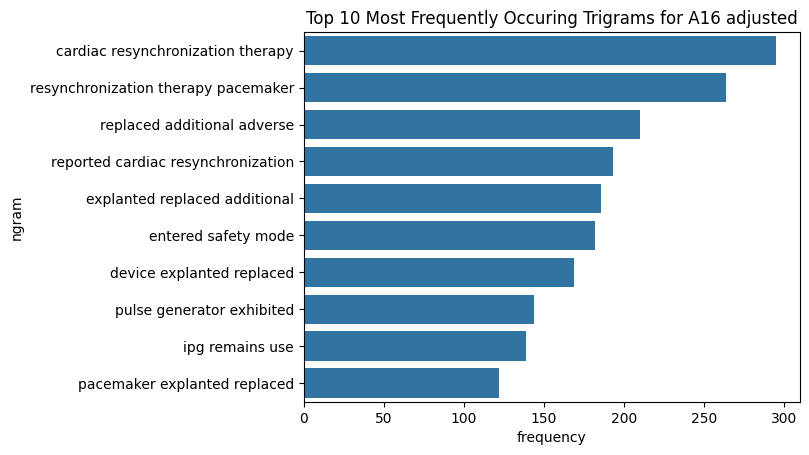

Problem associated with any deviations from the documented specifications of the device that relate to the implemented and inherited design features specific to devices used for reducing risks to patient or caregiver or maintaining risks within specified levels.




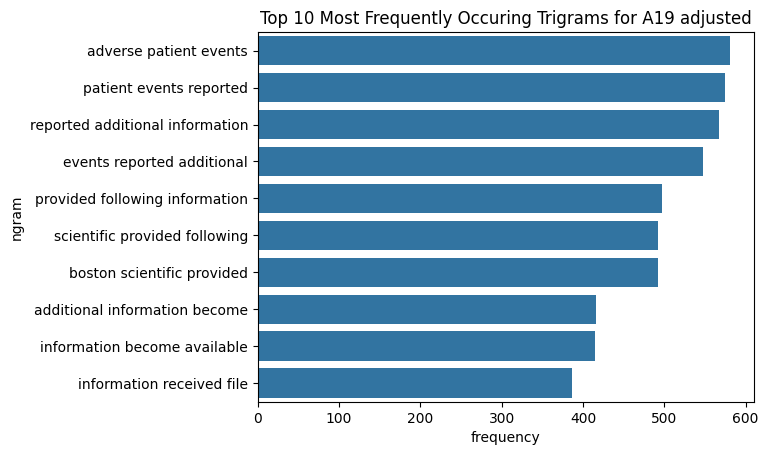

Problem associated with the surrounding conditions in which the device is being used such as temperature, noise, lighting, ventilation, or other external factors such as power supply.




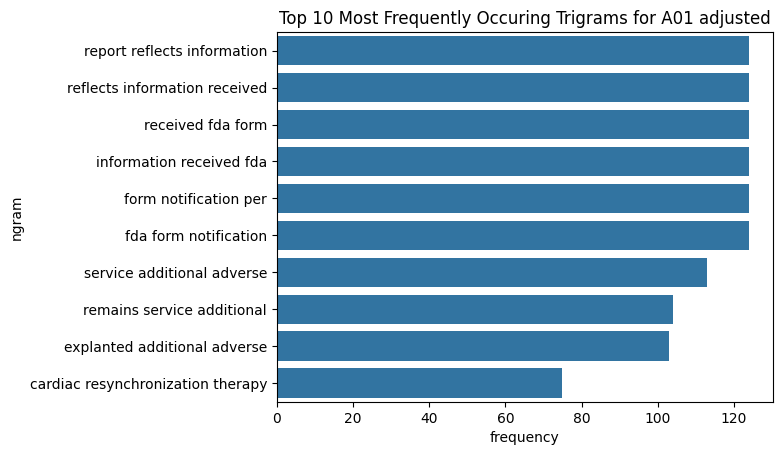

Problem related to the interaction between the patient and the device.




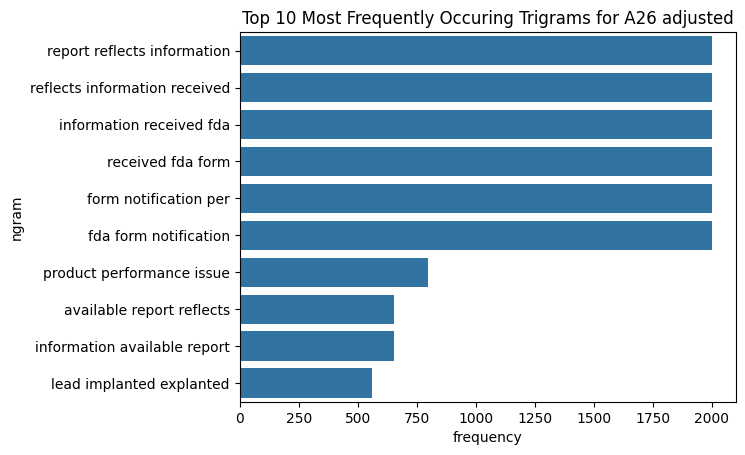

An adverse event appears to have occurred but there is not yet enough information available to classify the device problem.




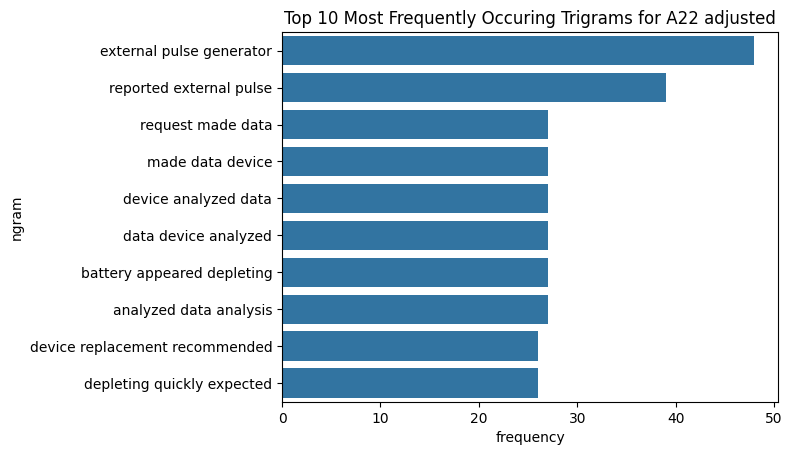

Problem associated with an act or omission of an act that has a different result than that intended by the manufacturer or expected by the operator.




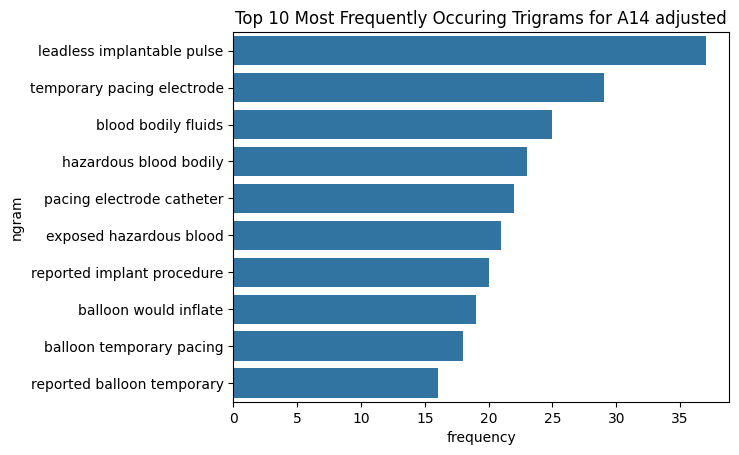

Problem associated with the device failing to deliver or draw liquids or gases as intended (e.g. delivering drugs at incorrect rate, problems with drawing fluid from a system). This includes vacuum collection devices and manual or mechanical pumps.




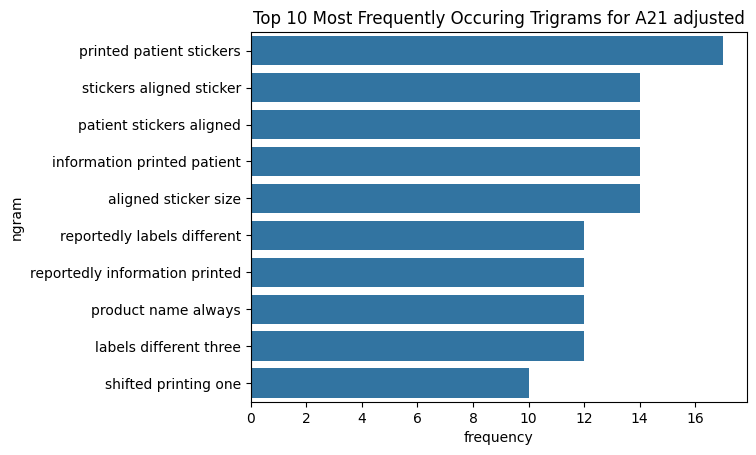

Problem associated with device markings/labelling, instructions for use, training and maintenance documentation or guidelines.




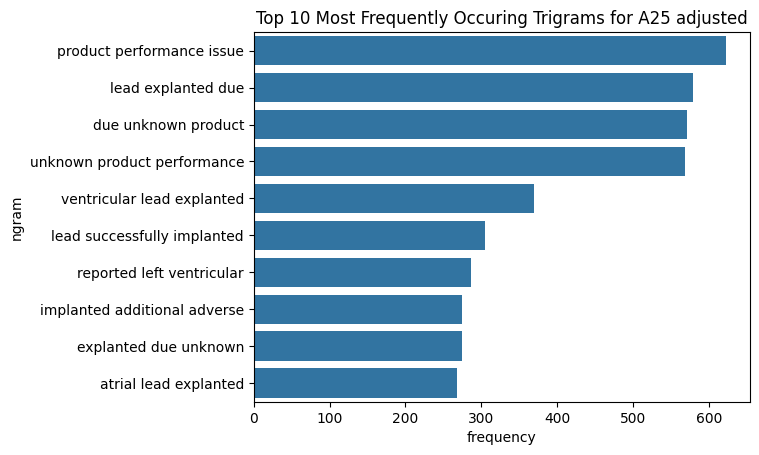

A report has been received but the description provided does not appear to relate to an adverse event. This code allows a report to be recorded for administration purposes, even if it doesn't meet the requirements for adverse event reporting.




In [158]:
for category in category_list:
    # Utilizza CountVectorizer per trigrammi
    cv = CountVectorizer(ngram_range=(3, 3))
    trigrams = cv.fit_transform(most_frquent[most_frquent['Cat1IMDRF'] == category]['TextClean'])
    trigrams_sparse = csr_matrix(trigrams)
    count_values = trigrams_sparse.sum(axis=0).A1
    ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse=True))
    ngram_freq.columns = ["frequency", "ngram"]

    # Scarta i bigrammi contenuti nei primi 10 bigrammi
    ngram_freq = ngram_freq[~ngram_freq['ngram'].isin(top_trigrams['ngram'])]
    sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
    plt.title(f'Top 10 Most Frequently Occuring Trigrams for {category} adjusted')
    plt.show()

    print(df_imdrf[df_imdrf['IMDRF Code'] == category]['Definition'].values[0])
    print("\n")

### Over-reporting

In [159]:
all_columns = set(df.columns)
excluded_cols = ["MDR_REPORT_KEY", "REPORT_NUMBER", "TYPE_OF_REPORT", "DATE_ADDED", "DATE_CHANGED", "DEVICE_SEQUENCE_NUMBER", "MODEL_NUMBER", "CATALOG_NUMBER", "LOT_NUMBER", "UDI-DI", "UDI-PUBLIC", "MDR_TEXT_KEY"]

columns_to_check = list(all_columns - set(excluded_cols))

duplicates = df.duplicated(subset=columns_to_check, keep=False)
print(duplicates.sum())

TypeError: unhashable type: 'list'

In [160]:
df[duplicates][["MODEL_NUMBER", "PROBLEM_CODE"]].head(10)

NameError: name 'duplicates' is not defined

In [161]:
df.drop_duplicates(subset=columns_to_check, inplace=True)

TypeError: unhashable type: 'list'

## WordCloud analysis

In [162]:
# lower the text
df['FOI_TEXT'] = df['FOI_TEXT'].apply(lambda x: str(x).lower())

C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\1337559319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FOI_TEXT'] = df['FOI_TEXT'].apply(lambda x: str(x).lower())


In [163]:
docs_n = list(df[df['TEXT_TYPE_CODE']=='N']['FOI_TEXT'])
docs_d = list(df[df['TEXT_TYPE_CODE']=='D']['FOI_TEXT'])

In [164]:
import string
import re

regex = '[' + string.punctuation + ']'
df['STEM'] = df['FOI_TEXT'].apply(lambda x: re.sub(regex, '', x)) # remove punctuation

C:\Users\pietr\AppData\Local\Temp\ipykernel_12500\3752720661.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STEM'] = df['FOI_TEXT'].apply(lambda x: re.sub(regex, '', x)) # remove punctuation


In [165]:
import nltk.stem 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop = stopwords.words('english')

stemmer = nltk.stem.PorterStemmer()

def stem_text(text):
    if pd.isna(text):  # Check for NaN values
        return ''  # Return an empty string or handle as needed
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop]
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

df['STEM'] = df['STEM'].apply(stem_text)

KeyboardInterrupt: 

In [ ]:
# stemming the text list
import nltk.stem
stemmer = nltk.stem.PorterStemmer()

def stem_text_list(text_list):
    if len(text_list) == 0:
        return text_list
    
    stemmed_list = [stemmer.stem(word) for word in text_list]
    stemmed_list = list(set(stemmed_list))
    return stemmed_list

df['TextList'] = df['TextList'].apply(stem_text_list)

C:\Users\pietr\AppData\Local\Temp\ipykernel_22532\903353232.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TextList'] = df['TextList'].apply(stem_text_list)


In [ ]:
df['StemmedText'] = df['TextList'].apply(lambda x: ' '.join(x))

C:\Users\pietr\AppData\Local\Temp\ipykernel_22532\3709828074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StemmedText'] = df['TextList'].apply(lambda x: ' '.join(x))


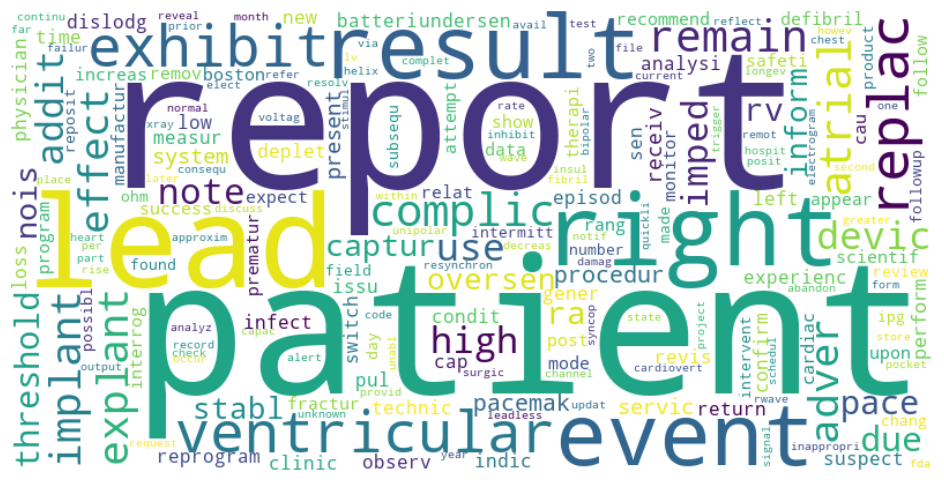

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width=800,
               height=400,
               max_words=200,
               background_color='white',
               collocations=False,
               colormap='viridis')

wc.generate(' '.join(df[df['TEXT_TYPE_CODE']=='D']['StemmedText']))

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from collections import Counter

mo_com = Counter(wc.words_).most_common(10)
mo_com

[('report', 1.0),
 ('patient', 0.9336078929144157),
 ('lead', 0.7851142661378762),
 ('right', 0.5576437350634751),
 ('result', 0.4369097719085871),
 ('event', 0.43031152470577),
 ('ventricular', 0.4003016236611087),
 ('exhibit', 0.39873288671478196),
 ('replac', 0.3899101190880752),
 ('complic', 0.3819415232178579)]

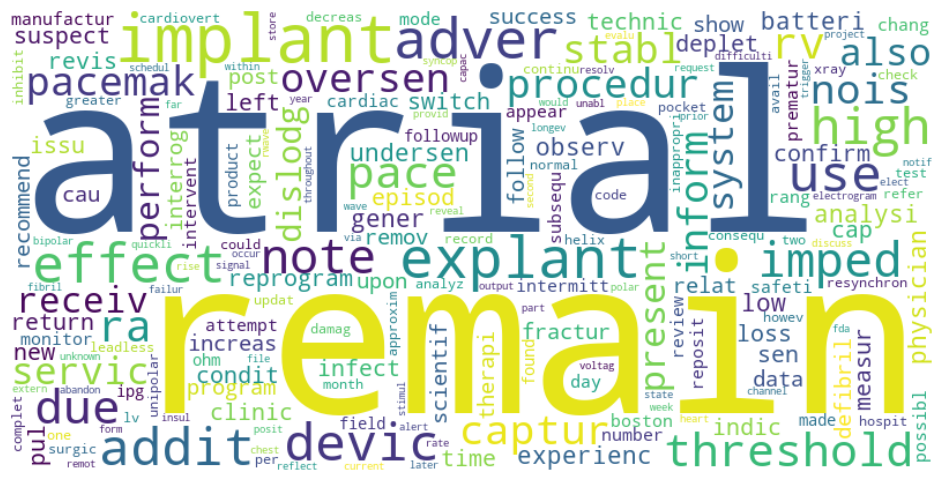

In [ ]:
top_10_words = [word for word, freq in mo_com]

wc = WordCloud(width=800,
                height=400,
                max_words=200,
                background_color='white',
                collocations=False,
                stopwords=top_10_words,
                colormap='viridis')

wc.generate(' '.join(df[df['TEXT_TYPE_CODE']=='D']['StemmedText']))

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

plt.show()

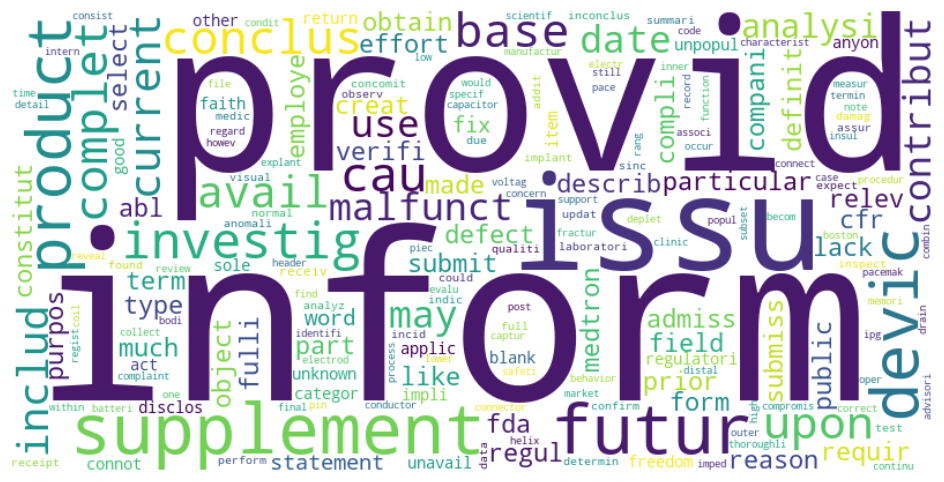

In [ ]:
wc.generate(' '.join(df[df['TEXT_TYPE_CODE']=='N']['StemmedText']))

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
most_common = Counter(wc.words_).most_common(10)
print(most_common)

[('inform', 1.0), ('provid', 0.8379999446015252), ('issu', 0.796367990761239), ('supplement', 0.7666190097735693), ('futur', 0.7486720346368311), ('devic', 0.673773296656702), ('product', 0.5976110473081668), ('investig', 0.5875178713349115), ('cau', 0.5434505153123516), ('conclus', 0.5276214664828573)]


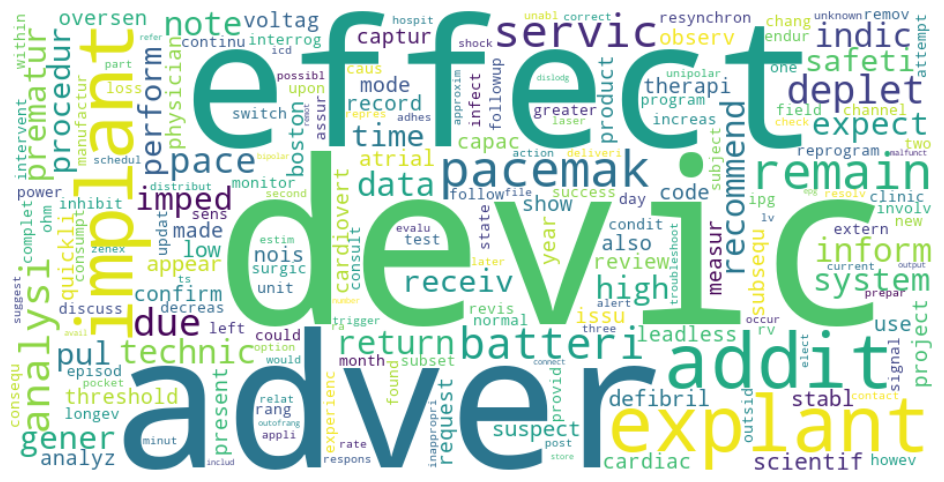

In [ ]:
# Pacemakers
wc.generate(' '.join(df[(df['DEVICE_REPORT_PRODUCT_CODE'].isin(codes_pacemakers)) & (df['TEXT_TYPE_CODE']=='D')]['StemmedText']))

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

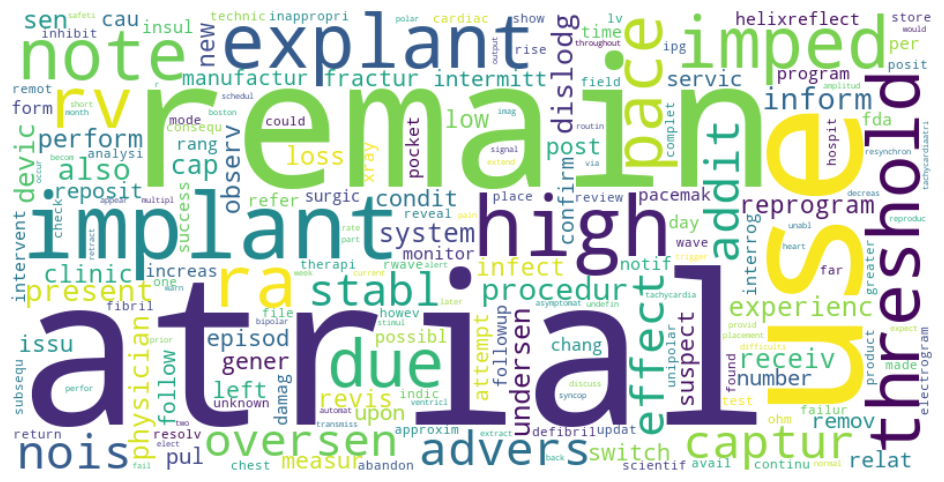

In [ ]:
wc.generate(' '.join(df[(df['DEVICE_REPORT_PRODUCT_CODE'].isin(codes_electrodes)) & (df['TEXT_TYPE_CODE']=='D')]['StemmedText']))

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
print(Counter(wc.words_).most_common(10))

[('atrial', 1.0), ('remain', 0.7188280717692482), ('use', 0.6811210970874837), ('implant', 0.631744589727783), ('high', 0.6216053989163233), ('explant', 0.6170089657484615), ('imped', 0.5538431588851757), ('threshold', 0.5456777305516801), ('ra', 0.5431145431145431), ('note', 0.5237121875777337)]


# Preparing the data for our model

In [ ]:
# drop all the rows with missing values and values with no characters in the FOI_TEXT column
df = df.dropna(subset=['FOI_TEXT', 'PROBLEM_CODE', 'IMDRF'])
df = df[df['FOI_TEXT'].str.contains(r'[a-zA-Z]')]
df = df.reset_index(drop=True)

In [ ]:
df_model = df[df['TEXT_TYPE_CODE'] == 'D'][['FOI_TEXT', 'PROBLEM_CODE', 'IMDRF']]
df_model

FOI_TEXT  PROBLEM_CODE  \
1        IT WAS REPORTED THAT THE LEAD WAS IMPLANTED IN...        2923.0   
3        IT WAS REPORTED THAT DURING FOLLOW-UP VISIT, D...        1440.0   
6        IT WAS REPORTED THAT THE LEAD CAPTURE THRESHOL...        1559.0   
7        IT WAS REPORTED THAT THE LEAD CAPTURE THRESHOL...        3266.0   
8        NEW INFORMATION RECEIVED NOTES THAT LOSS OF SE...        1559.0   
...                                                    ...           ...   
1160455  IT WAS REPORTED THAT THE RIGHT ATRIAL (RA) LEA...        3269.0   
1160463  IT WAS REPORTED THAT THE RIGHT ATRIAL (RA) LEA...        3266.0   
1160464  IT WAS REPORTED THAT THE RIGHT ATRIAL (RA) LEA...        3269.0   
1160466  IT WAS REPORTED THAT THE RIGHT ATRIAL (RA) LEA...        1438.0   
1160468  IT WAS REPORTED THAT THIS CARDIAC RESYNCHRONIZ...        2885.0   

           IMDRF  
1        A051201  
3        A071205  
6        A070908  
7        A070102  
8        A070908  
...          ...  
1160455  A070104  
1160463  A070102  
1160464  A070104  
1160466  A070909  
1160468    A0705  

[584279 rows x 3 columns]

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584279 entries, 1 to 1160468
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   FOI_TEXT      584279 non-null  object 
 1   PROBLEM_CODE  583127 non-null  float64
 2   IMDRF         583126 non-null  object 
dtypes: float64(1), object(2)
memory usage: 17.8+ MB


In [ ]:
df_model.to_csv('df_model.csv', index=False)

In [167]:
# export unigrams bigrams and trigrams
# create a subfolder to store the files
import os
os.makedirs('ngrams', exist_ok=True)

# Convert unigrams lists to DataFrames and export
pd.DataFrame(uni10, columns=['word', 'frequency']).to_csv('ngrams/uni10.csv', index=False)
pd.DataFrame(uni20, columns=['word', 'frequency']).to_csv('ngrams/uni20.csv', index=False)
pd.DataFrame(uni30, columns=['word', 'frequency']).to_csv('ngrams/uni30.csv', index=False)

# export bigrams
bigram10.to_csv('ngrams/bigram10.csv', index=False)
bigram20.to_csv('ngrams/bigram20.csv', index=False)
bigram30.to_csv('ngrams/bigram30.csv', index=False)

# export trigrams
trigram10.to_csv('ngrams/trigram10.csv', index=False)
trigram20.to_csv('ngrams/trigram20.csv', index=False)
trigram30.to_csv('ngrams/trigram30.csv', index=False)
